In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from tqdm import tqdm

In [3]:
flag = False
data_path = '../data/raw'
for filename in tqdm(os.listdir(data_path)):
    if filename.endswith('.csv'):
        if not flag:
            full_df = pd.read_csv(os.path.join(data_path, filename))
            full_df['label'] = filename.replace('.csv', '')
            flag = True
        else:
            curr_df = pd.read_csv(os.path.join(data_path, filename))
            curr_df['label'] = filename.replace('.csv', '')
            full_df = pd.concat([full_df, curr_df])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:22<00:00,  1.06s/it]


In [4]:
full_df.label.value_counts()

unwanted_programs          83359
malware_detect             63700
ransomware_detect          59000
industrial_iot_security    56666
anti-counterfeit           32396
parental_control           14891
spyware_detect             14036
EDR                        11693
MDR                        10543
SASE                        9234
sandbox                     8135
SIEM                        6901
application_control         5238
CASB                        5160
atm_security                4488
honeypot                    3854
system_tweak                3775
SOAR                        3226
NDR                         2456
NGFW                        2283
Name: label, dtype: int64

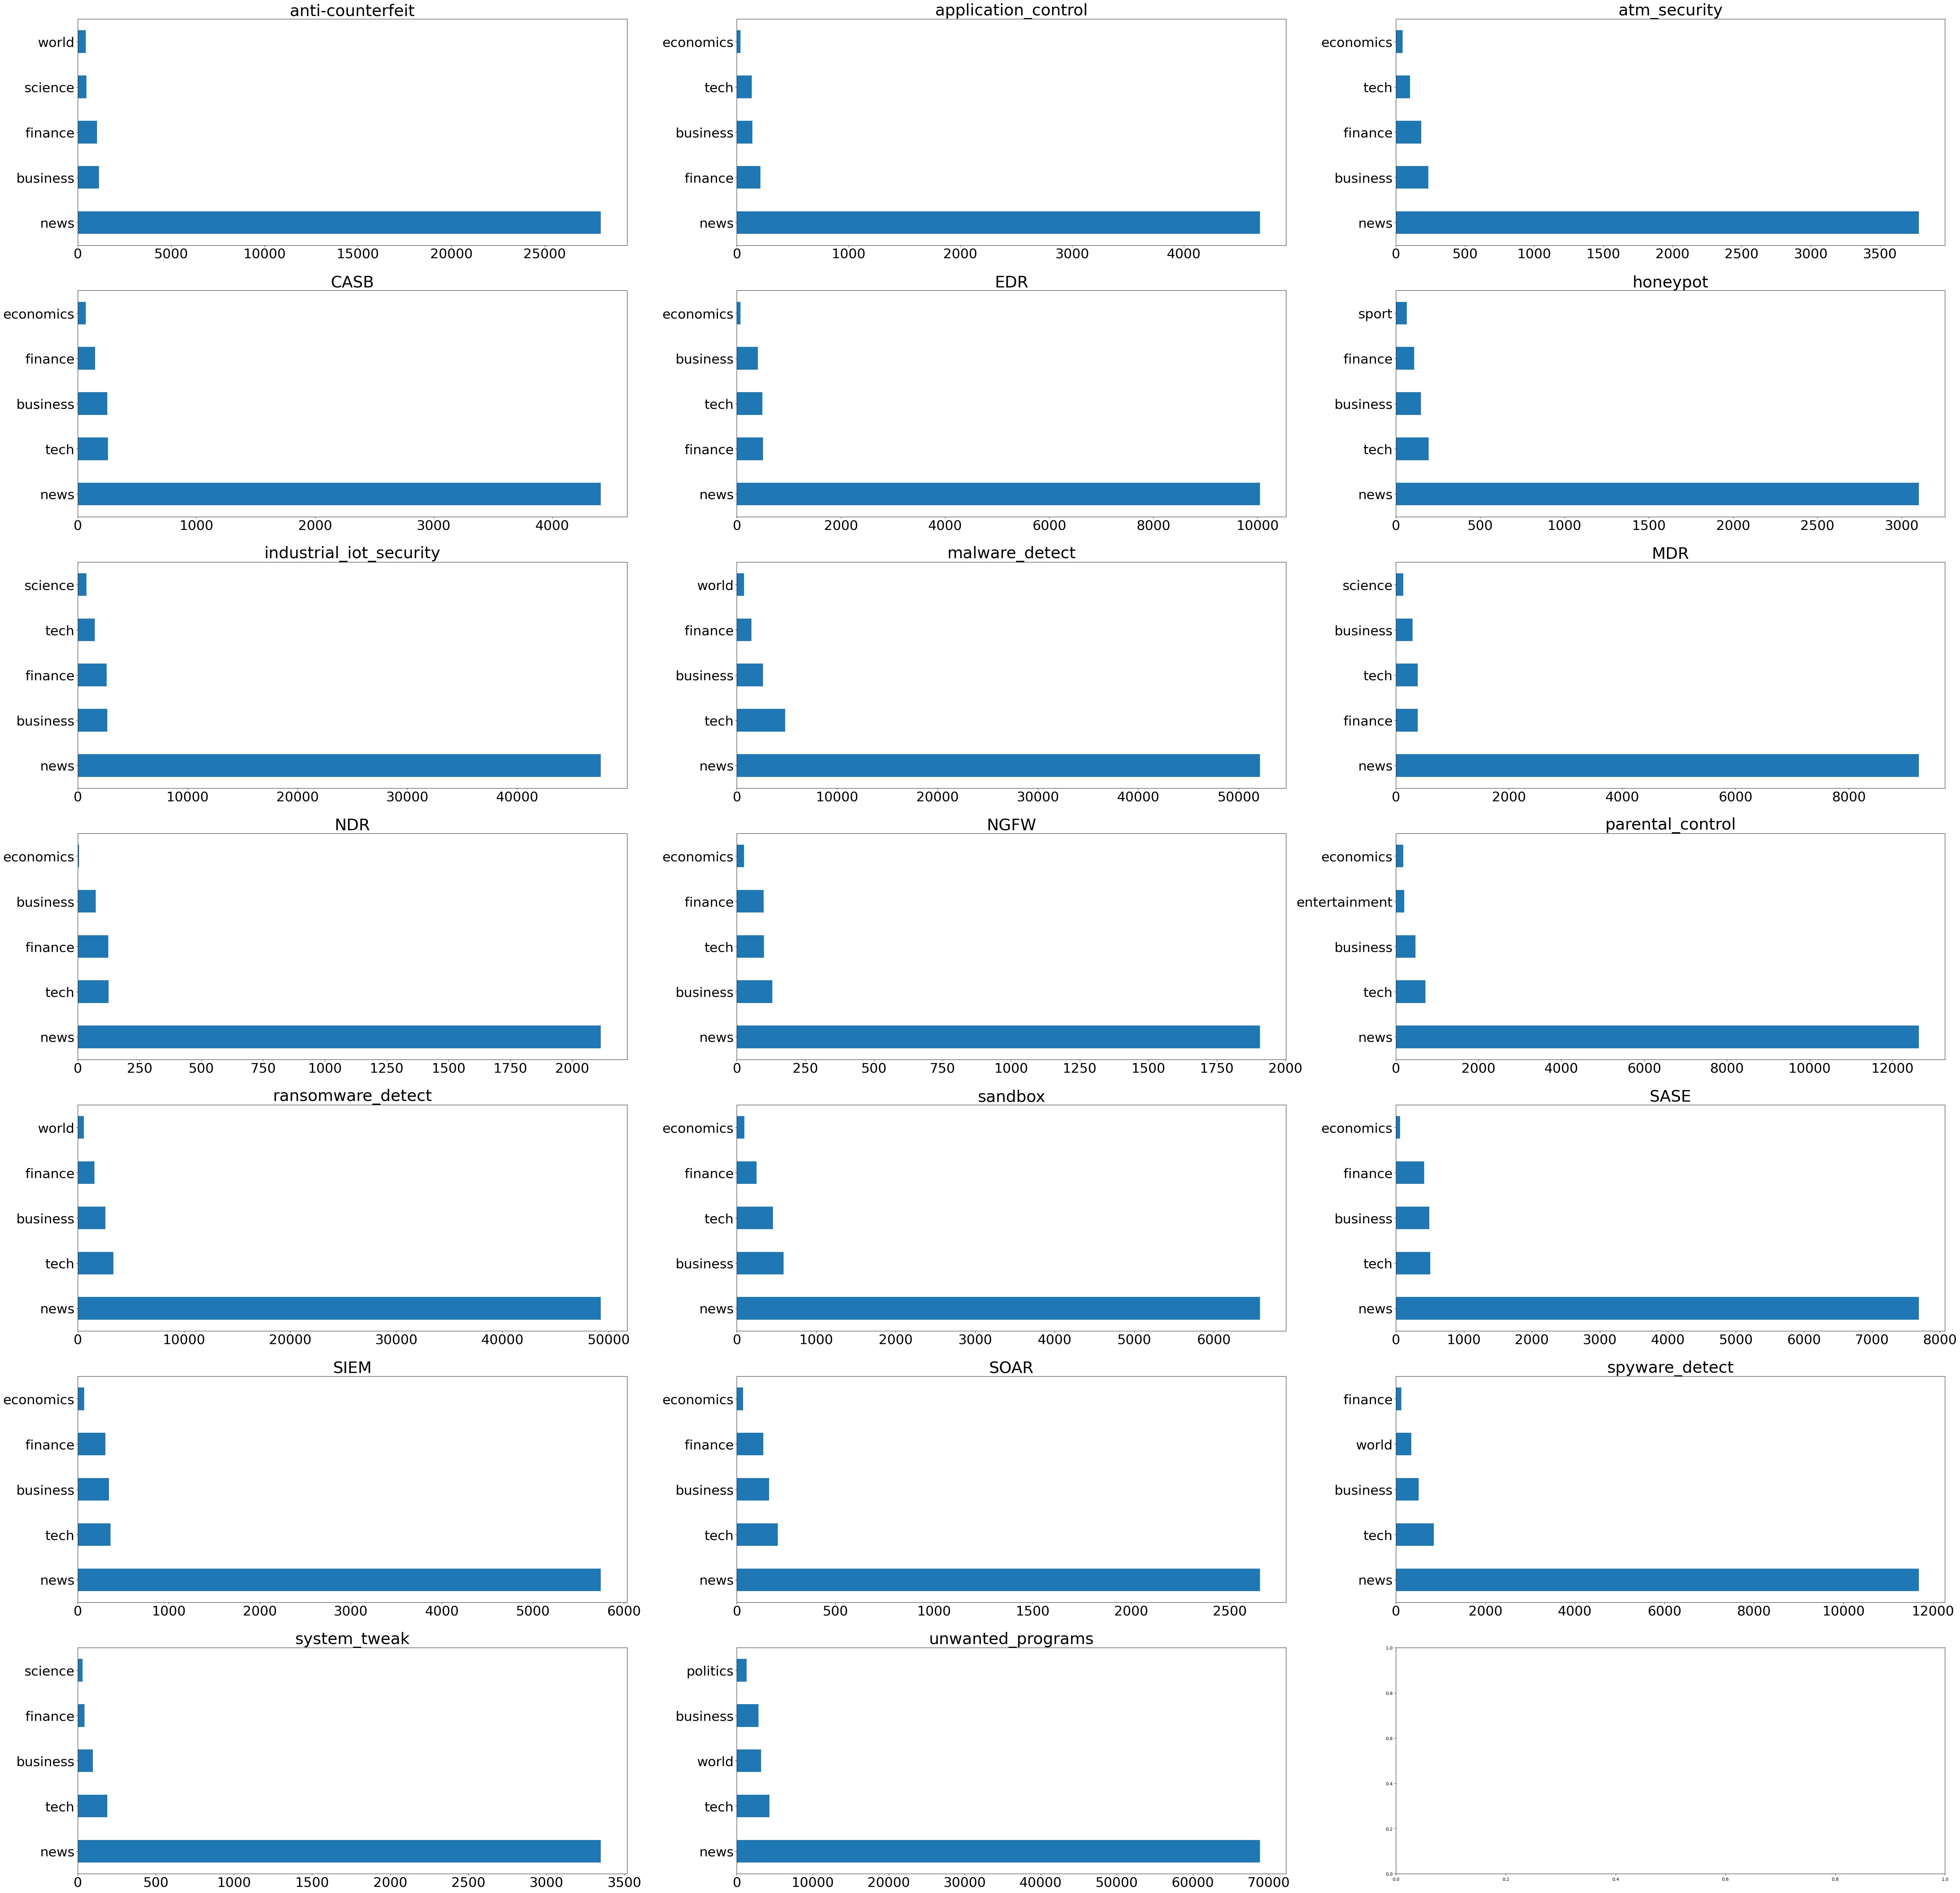

In [5]:
fig, axes = plt.subplots(7, 3, figsize = (75, 75))
for i, label in enumerate(full_df.label.unique()):
    curr_df = full_df.loc[full_df.label == label, :]
    curr_df.topic.value_counts().head().plot(kind='barh', ax = axes[i // 3][i % 3])
    axes[i // 3][i % 3].set_title(label, fontsize=36)
    axes[i // 3][i % 3].tick_params(axis='both', which='major', labelsize=30)

In [126]:
full_df = full_df.reset_index(drop = True)

In [127]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401034 entries, 0 to 401033
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              401034 non-null  object
 1   published_date  401034 non-null  object
 2   title           401033 non-null  object
 3   language        401034 non-null  object
 4   topic           401012 non-null  object
 5   link            401034 non-null  object
 6   country         401034 non-null  object
 7   summary         400007 non-null  object
 8   label           401034 non-null  object
dtypes: object(9)
memory usage: 27.5+ MB


In [9]:
import re
def count_words(text):
    n = len(text.split())
    return n

def n_sentensece(text):
    list_sent = re.compile('[!]|[/?]|[/?!]|[!/?]|[/.]').split(text)
    if len(' '.join(re.compile(r'[А-Яа-я\-]+').findall(list_sent[-1]))) > 0:
        n = len(list_sent)
    else:
        n = len(list_sent) - 1
    if n > 0:
        return n
    else:
        return 1

In [10]:
clean_df['num_words'] = clean_df.summary.map(count_words)
clean_df['num_sentences'] = clean_df.summary.map(n_sentensece)

C:\Users\Nataliia\AppData\Local\Temp\ipykernel_2080\2344581083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['num_words'] = clean_df.summary.map(count_words)
C:\Users\Nataliia\AppData\Local\Temp\ipykernel_2080\2344581083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['num_sentences'] = clean_df.summary.map(n_sentensece)


In [11]:
clean_df.describe()

,num_words,num_sentences
count,400007.000000,400007.000000
mean,896.660611,54.883985
std,937.754319,67.213431
min,1.000000,1.000000
25%,498.000000,26.000000
50%,738.000000,42.000000
75%,1077.000000,66.000000
max,212343.000000,10113.000000


In [12]:
unique_texts = full_df.summary.value_counts()[full_df.summary.value_counts() == 1].index
unique_texts.shape

(198716,)

In [128]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [15]:
le.fit(full_df.loc[unique_text_ind, 'label'])

LabelEncoder()

In [135]:
clean_df = full_df.loc[full_df.summary.notna(), :]
clean_df.drop_duplicates(['summary', 'label'], inplace = True)

C:\Users\Nataliia\AppData\Local\Temp\ipykernel_2080\1541528089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop_duplicates(['summary', 'label'], inplace = True)


In [136]:
clean_df

,id,published_date,title,language,topic,link,country,summary,label
0,8df4cbef454b703efc1fa2182fa19464,2022-11-15 18:35:33,RFID Anti-Counterfeiting Tag market: Market Pl...,en,business,https://www.openpr.com/news/2808352/rfid-anti-...,DE,RFID Anti-Counterfeiting Tag market: Market Pl...,anti-counterfeit
1,55e4319b28151bf88de62331a9d78935,2022-11-11 03:18:53,Global Anti-Counterfeit Packaging Market SWOT ...,en,business,https://www.openpr.com/news/2802747/global-ant...,DE,Global Anti-Counterfeit Packaging Market SWOT ...,anti-counterfeit
2,c68aacc054eeb27cba80e2fcd5874a1a,2022-11-08 07:28:42,Holographic Anti-Counterfeiting Marks Market C...,en,news,https://heraldkeeper.com/market/holographic-an...,unknown,Holographic Anti-Counterfeiting Marks Market C...,anti-counterfeit
3,6ae385eb692157ceeee345815c224cf0,2022-11-29 01:29:13,Anti-counterfeit Pharmaceutical Packaging Mark...,en,news,https://www.taiwannews.com.tw/en/news/4735391,TW,Research Viewpoint on Anti-counterfeit Pharmac...,anti-counterfeit
4,d40e2137da838ddc33cdc66f4e964afa,2022-11-03 14:15:23,Anti-Counterfeit Packaging Market Growth Prosp...,en,news,https://www.openpr.com/news/2791697/anti-count...,DE,Anti-Counterfeit Packaging Market Growth Prosp...,anti-counterfeit
...,...,...,...,...,...,...,...,...,...
401029,834ef5e3fe0fb2d3ceb96c8d17714f9a,2020-04-07 09:45:04,Honor 9X Pro: Better specs can't save this sma...,en,news,https://www.theregister.com/2020/04/07/honor_9...,GB,Hands On Smartphone manufacturers love to use ...,unwanted_programs
401030,e64038ff871f4f175c29f883aba17850,2020-04-29 11:58:01,April 2020: The Best Deals on Apple Products a...,en,news,https://www.iphonehacks.com/2020/04/best-deals...,US,Welcome to iPhoneHacks' Daily Deals post for A...,unwanted_programs
401031,305c3c456c93d3b663aea79b90cd940b,2020-04-03 10:09:21,BOFH: Will the last one out switch off the pri...,en,news,https://www.theregister.com/2020/04/03/bofh_20...,GB,Episode 6 >beedle< >beedle< >boop< >beedle< >b...,unwanted_programs
401032,b93c18d2a492b9797ebe1e020bbe24fc,2020-04-03 14:00:00,"Friday's Best Deals: Children's Books, Circula...",en,news,https://kinjadeals.theinventory.com/fridays-be...,US,"A large heating pad, Comixology Marvel sale, I...",unwanted_programs


In [142]:
%%time
le = LabelEncoder()
clean_df['text_id'] = le.fit_transform(clean_df.summary)
mask = clean_df.duplicated('text_id', keep = False)
curr_df = pd.get_dummies(clean_df.label)
labels = curr_df.columns
clean_df = pd.concat([clean_df, curr_df], axis = 1)
duplicated_df = clean_df.loc[mask, :]
non_duplicated_df = clean_df.loc[~mask, :]
duplicate_target = duplicated_df.groupby('text_id')[labels].sum()
print(duplicate_target.shape)
duplicated_df[labels] = duplicate_target
duplicated_df.drop_duplicates('text_id', inplace = True)
clean_df2 = pd.concat([non_duplicated_df, duplicated_df])

(37477, 80)


<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 1.8 s


In [143]:
clean_df2

,id,published_date,title,language,topic,link,country,summary,label,text_id,...,atm_security,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs
0,8df4cbef454b703efc1fa2182fa19464,2022-11-15 18:35:33,RFID Anti-Counterfeiting Tag market: Market Pl...,en,business,https://www.openpr.com/news/2808352/rfid-anti-...,DE,RFID Anti-Counterfeiting Tag market: Market Pl...,anti-counterfeit,163451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55e4319b28151bf88de62331a9d78935,2022-11-11 03:18:53,Global Anti-Counterfeit Packaging Market SWOT ...,en,business,https://www.openpr.com/news/2802747/global-ant...,DE,Global Anti-Counterfeit Packaging Market SWOT ...,anti-counterfeit,85958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c68aacc054eeb27cba80e2fcd5874a1a,2022-11-08 07:28:42,Holographic Anti-Counterfeiting Marks Market C...,en,news,https://heraldkeeper.com/market/holographic-an...,unknown,Holographic Anti-Counterfeiting Marks Market C...,anti-counterfeit,93303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6ae385eb692157ceeee345815c224cf0,2022-11-29 01:29:13,Anti-counterfeit Pharmaceutical Packaging Mark...,en,news,https://www.taiwannews.com.tw/en/news/4735391,TW,Research Viewpoint on Anti-counterfeit Pharmac...,anti-counterfeit,167379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d40e2137da838ddc33cdc66f4e964afa,2022-11-03 14:15:23,Anti-Counterfeit Packaging Market Growth Prosp...,en,news,https://www.openpr.com/news/2791697/anti-count...,DE,Anti-Counterfeit Packaging Market Growth Prosp...,anti-counterfeit,28006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317387,87b47b16cde4d18a841d14d53e36aba7,2020-08-18 08:00:00,Why is Windows Defender flagging CCleaner as '...,en,news,https://www.komando.com/security-privacy/is-cc...,US,"At Komando.com, we're crazy about free tools y...",system_tweak,34432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317401,9b19949b2928c442368ab5015f1d9a76,2020-08-05 10:00:00,"MacKeeper Has Cleaned Up Its Act, but Should Y...",en,news,https://www.makeuseof.com/tag/should-you-use-m...,CA,Few programs in the Mac world have a reputatio...,system_tweak,79009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317428,724560f5b3a7e55462551ae39cdecccc,2020-07-22 07:04:31,iCare 2.1.0,en,news,https://www.macupdate.com/app/mac/50502/icare,US,"<img src=""https://www.macupdate.com/images/scr...",system_tweak,10738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317439,8dd5d3d3f9326ec3ac8508f68a1b86c2,2020-07-12 10:45:00,Tixati 2.74,en,news,https://www.neowin.net/news/tixati-274,US,﻿ Tixati is a free and easy to use BitTorrent ...,system_tweak,245687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
full_df

,id,published_date,title,language,topic,link,country,summary,label
0,8df4cbef454b703efc1fa2182fa19464,2022-11-15 18:35:33,RFID Anti-Counterfeiting Tag market: Market Pl...,en,business,https://www.openpr.com/news/2808352/rfid-anti-...,DE,RFID Anti-Counterfeiting Tag market: Market Pl...,anti-counterfeit
1,55e4319b28151bf88de62331a9d78935,2022-11-11 03:18:53,Global Anti-Counterfeit Packaging Market SWOT ...,en,business,https://www.openpr.com/news/2802747/global-ant...,DE,Global Anti-Counterfeit Packaging Market SWOT ...,anti-counterfeit
2,c68aacc054eeb27cba80e2fcd5874a1a,2022-11-08 07:28:42,Holographic Anti-Counterfeiting Marks Market C...,en,news,https://heraldkeeper.com/market/holographic-an...,unknown,Holographic Anti-Counterfeiting Marks Market C...,anti-counterfeit
3,6ae385eb692157ceeee345815c224cf0,2022-11-29 01:29:13,Anti-counterfeit Pharmaceutical Packaging Mark...,en,news,https://www.taiwannews.com.tw/en/news/4735391,TW,Research Viewpoint on Anti-counterfeit Pharmac...,anti-counterfeit
4,d40e2137da838ddc33cdc66f4e964afa,2022-11-03 14:15:23,Anti-Counterfeit Packaging Market Growth Prosp...,en,news,https://www.openpr.com/news/2791697/anti-count...,DE,Anti-Counterfeit Packaging Market Growth Prosp...,anti-counterfeit
...,...,...,...,...,...,...,...,...,...
401029,834ef5e3fe0fb2d3ceb96c8d17714f9a,2020-04-07 09:45:04,Honor 9X Pro: Better specs can't save this sma...,en,news,https://www.theregister.com/2020/04/07/honor_9...,GB,Hands On Smartphone manufacturers love to use ...,unwanted_programs
401030,e64038ff871f4f175c29f883aba17850,2020-04-29 11:58:01,April 2020: The Best Deals on Apple Products a...,en,news,https://www.iphonehacks.com/2020/04/best-deals...,US,Welcome to iPhoneHacks' Daily Deals post for A...,unwanted_programs
401031,305c3c456c93d3b663aea79b90cd940b,2020-04-03 10:09:21,BOFH: Will the last one out switch off the pri...,en,news,https://www.theregister.com/2020/04/03/bofh_20...,GB,Episode 6 >beedle< >beedle< >boop< >beedle< >b...,unwanted_programs
401032,b93c18d2a492b9797ebe1e020bbe24fc,2020-04-03 14:00:00,"Friday's Best Deals: Children's Books, Circula...",en,news,https://kinjadeals.theinventory.com/fridays-be...,US,"A large heating pad, Comixology Marvel sale, I...",unwanted_programs


In [116]:
clean_df

,id,published_date,title,language,topic,link,country,summary,label,text_id
0,8df4cbef454b703efc1fa2182fa19464,2022-11-15 18:35:33,RFID Anti-Counterfeiting Tag market: Market Pl...,en,business,https://www.openpr.com/news/2808352/rfid-anti-...,DE,RFID Anti-Counterfeiting Tag market: Market Pl...,anti-counterfeit,163451
1,55e4319b28151bf88de62331a9d78935,2022-11-11 03:18:53,Global Anti-Counterfeit Packaging Market SWOT ...,en,business,https://www.openpr.com/news/2802747/global-ant...,DE,Global Anti-Counterfeit Packaging Market SWOT ...,anti-counterfeit,85958
2,c68aacc054eeb27cba80e2fcd5874a1a,2022-11-08 07:28:42,Holographic Anti-Counterfeiting Marks Market C...,en,news,https://heraldkeeper.com/market/holographic-an...,unknown,Holographic Anti-Counterfeiting Marks Market C...,anti-counterfeit,93303
3,6ae385eb692157ceeee345815c224cf0,2022-11-29 01:29:13,Anti-counterfeit Pharmaceutical Packaging Mark...,en,news,https://www.taiwannews.com.tw/en/news/4735391,TW,Research Viewpoint on Anti-counterfeit Pharmac...,anti-counterfeit,167379
4,d40e2137da838ddc33cdc66f4e964afa,2022-11-03 14:15:23,Anti-Counterfeit Packaging Market Growth Prosp...,en,news,https://www.openpr.com/news/2791697/anti-count...,DE,Anti-Counterfeit Packaging Market Growth Prosp...,anti-counterfeit,28006
...,...,...,...,...,...,...,...,...,...,...
401029,834ef5e3fe0fb2d3ceb96c8d17714f9a,2020-04-07 09:45:04,Honor 9X Pro: Better specs can't save this sma...,en,news,https://www.theregister.com/2020/04/07/honor_9...,GB,Hands On Smartphone manufacturers love to use ...,unwanted_programs,91314
401030,e64038ff871f4f175c29f883aba17850,2020-04-29 11:58:01,April 2020: The Best Deals on Apple Products a...,en,news,https://www.iphonehacks.com/2020/04/best-deals...,US,Welcome to iPhoneHacks' Daily Deals post for A...,unwanted_programs,231412
401031,305c3c456c93d3b663aea79b90cd940b,2020-04-03 10:09:21,BOFH: Will the last one out switch off the pri...,en,news,https://www.theregister.com/2020/04/03/bofh_20...,GB,Episode 6 >beedle< >beedle< >boop< >beedle< >b...,unwanted_programs,74196
401032,b93c18d2a492b9797ebe1e020bbe24fc,2020-04-03 14:00:00,"Friday's Best Deals: Children's Books, Circula...",en,news,https://kinjadeals.theinventory.com/fridays-be...,US,"A large heating pad, Comixology Marvel sale, I...",unwanted_programs,13798


In [117]:
from sklearn.preprocessing import LabelEncoder
duplicated_df

,id,published_date,title,language,topic,link,country,summary,label,CASB,...,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs,text_id
453,f97ff49a8239d62b4fd1c58e3b1de030,2022-11-08 06:01:04,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,finance,https://www.marketscreener.com/quote/stock/WIS...,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,228855
499,61ad13aa4fd15f1dfe8a08b6824c1a54,2022-11-08 06:37:14,WISeKey to showcase â€œINeSâ€� a fully-fledged...,en,news,http://www.itnewsonline.com/GlobeNewswire/WISe...,IN,GlobeNewswire2022-11-08WISeKey to showcase â€œ...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,87333
528,8372939616cd1f6bcb9c07895570e38c,2022-11-08 00:00:00,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,https://www.globenewswire.com/news-release/202...,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,228856
529,9a2dcf7b641f678a4a3f639e574b145c,2022-11-08 06:02:31,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,http://globenewswire.com/,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,228857
535,32554d41468a115d8f1333284a9f6d95,2022-11-08 06:00:00,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,https://www.einnews.com/pr_news/600088525/wise...,UA,/EIN News/ -- WISeKey to showcase 'INeS' a ful...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,7934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401024,b0dc8644999bc3b8fb728c641b8f7253,2020-04-03 06:03:06,Automatic for the People: Pandemic-fueled rush...,en,news,https://www.theregister.com/2020/04/03/eff_aut...,GB,Analysis The Electronic Frontier Foundation on...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,1,27202
401026,1354364b929507f4e00eb8377df48198,2020-04-02 15:29:08,Huawei P40 pricing is in step with previous P-...,en,news,https://www.theregister.com/2020/04/02/huawei_...,GB,There are few surprises around UK pricing and ...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,1,213006
401027,294c7c157d61f4a1c464a46045d5b1cf,2020-04-07 09:00:10,QAD goals: ERP minnow waggles upgrades in bid ...,en,news,https://www.theregister.com/2020/04/07/qad_erp...,GB,Enterprise software is known for its grand glo...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,1,74027
401029,834ef5e3fe0fb2d3ceb96c8d17714f9a,2020-04-07 09:45:04,Honor 9X Pro: Better specs can't save this sma...,en,news,https://www.theregister.com/2020/04/07/honor_9...,GB,Hands On Smartphone manufacturers love to use ...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,1,91314


In [118]:
dd = duplicated_df.groupby('text_id')[labels].sum().reset_index()
dd

,text_id,CASB,EDR,MDR,NDR,NGFW,SASE,SIEM,SOAR,anti-counterfeit,...,atm_security,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs
0,13,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,25,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,31,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37472,245734,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37473,245737,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
37474,245745,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
37475,245746,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
clean_df.merge(dd, on = 'text_id').drop_duplicates('text_id')

,id,published_date,title,language,topic,link,country,summary,label,text_id,...,atm_security,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs
0,f97ff49a8239d62b4fd1c58e3b1de030,2022-11-08 06:01:04,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,finance,https://www.marketscreener.com/quote/stock/WIS...,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,228855,...,0,0,1,0,0,0,0,0,0,0
2,61ad13aa4fd15f1dfe8a08b6824c1a54,2022-11-08 06:37:14,WISeKey to showcase â€œINeSâ€� a fully-fledged...,en,news,http://www.itnewsonline.com/GlobeNewswire/WISe...,IN,GlobeNewswire2022-11-08WISeKey to showcase â€œ...,anti-counterfeit,87333,...,0,0,1,0,0,0,0,0,0,0
4,8372939616cd1f6bcb9c07895570e38c,2022-11-08 00:00:00,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,https://www.globenewswire.com/news-release/202...,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,228856,...,0,0,1,0,0,0,0,0,0,0
6,9a2dcf7b641f678a4a3f639e574b145c,2022-11-08 06:02:31,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,http://globenewswire.com/,US,WISeKey to showcase 'INeS' a fully-fledged PKI...,anti-counterfeit,228857,...,0,0,1,0,0,0,0,0,0,0
8,32554d41468a115d8f1333284a9f6d95,2022-11-08 06:00:00,WISeKey to showcase 'INeS' a fully-fledged PKI...,en,news,https://www.einnews.com/pr_news/600088525/wise...,UA,/EIN News/ -- WISeKey to showcase 'INeS' a ful...,anti-counterfeit,7934,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87197,87b47b16cde4d18a841d14d53e36aba7,2020-08-18 08:00:00,Why is Windows Defender flagging CCleaner as '...,en,news,https://www.komando.com/security-privacy/is-cc...,US,"At Komando.com, we're crazy about free tools y...",system_tweak,34432,...,0,0,0,0,0,0,0,0,1,1
87199,9b19949b2928c442368ab5015f1d9a76,2020-08-05 10:00:00,"MacKeeper Has Cleaned Up Its Act, but Should Y...",en,news,https://www.makeuseof.com/tag/should-you-use-m...,CA,Few programs in the Mac world have a reputatio...,system_tweak,79009,...,0,0,0,0,0,0,0,0,1,1
87201,724560f5b3a7e55462551ae39cdecccc,2020-07-22 07:04:31,iCare 2.1.0,en,news,https://www.macupdate.com/app/mac/50502/icare,US,"<img src=""https://www.macupdate.com/images/scr...",system_tweak,10738,...,0,0,0,0,0,0,0,0,1,1
87203,8dd5d3d3f9326ec3ac8508f68a1b86c2,2020-07-12 10:45:00,Tixati 2.74,en,news,https://www.neowin.net/news/tixati-274,US,﻿ Tixati is a free and easy to use BitTorrent ...,system_tweak,245687,...,0,0,0,0,0,0,0,0,1,1


In [95]:
clean_df.tail(50)

,id,published_date,title,language,topic,link,country,summary,label,text_id,...,atm_security,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs
400786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
400840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [82]:
label_dict

{13: {'CASB': 0,
  'EDR': 0,
  'MDR': 0,
  'NDR': 0,
  'NGFW': 0,
  'SASE': 0,
  'SIEM': 0,
  'SOAR': 0,
  'anti-counterfeit': 0,
  'application_control': 0,
  'atm_security': 0,
  'honeypot': 0,
  'industrial_iot_security': 0,
  'malware_detect': 1,
  'parental_control': 0,
  'ransomware_detect': 1,
  'sandbox': 0,
  'spyware_detect': 0,
  'system_tweak': 0,
  'unwanted_programs': 0},
 15: {'CASB': 0,
  'EDR': 0,
  'MDR': 0,
  'NDR': 0,
  'NGFW': 0,
  'SASE': 0,
  'SIEM': 0,
  'SOAR': 0,
  'anti-counterfeit': 0,
  'application_control': 0,
  'atm_security': 0,
  'honeypot': 0,
  'industrial_iot_security': 0,
  'malware_detect': 1,
  'parental_control': 0,
  'ransomware_detect': 0,
  'sandbox': 0,
  'spyware_detect': 1,
  'system_tweak': 0,
  'unwanted_programs': 1},
 25: {'CASB': 0,
  'EDR': 0,
  'MDR': 0,
  'NDR': 0,
  'NGFW': 0,
  'SASE': 0,
  'SIEM': 0,
  'SOAR': 0,
  'anti-counterfeit': 0,
  'application_control': 0,
  'atm_security': 1,
  'honeypot': 0,
  'industrial_iot_security

In [119]:
from sklearn.preprocessing import OneHotEncoder
clean_df2 = clean_df.copy()
remove_index = []
curr = pd.get_dummies(clean_df2.label)
labels = curr.columns
clean_df2 = pd.concat([clean_df2, pd.get_dummies(clean_df2.label)], axis = 1)
ununique_text = clean_df2.summary.value_counts()[clean_df2.summary.value_counts() > 1].index
for text in tqdm(ununique_text):
    curr_ind = clean_df2.loc[clean_df2.summary == text, :].index
    curr_labels = clean_df2.loc[curr_ind, labels].sum(0)
    remove_index.extend(curr_ind[1:])
    clean_df2.loc[curr_ind[0], labels] = curr_labels
    
    

 47%|███████████████████████████████████▍                                        | 17449/37477 [12:13<14:02, 23.79it/s]


KeyboardInterrupt: 

In [84]:
clean_df2.drop(remove_index, inplace = True)

In [85]:
clean_df2.to_csv('clean_data.csv')

In [86]:
clean_df2.label.value_counts()

unwanted_programs          53377
malware_detect             43743
industrial_iot_security    41638
anti-counterfeit           24041
ransomware_detect          19729
parental_control           10799
EDR                         8515
spyware_detect              5382
sandbox                     5353
application_control         4468
SASE                        4270
MDR                         4254
atm_security                3794
CASB                        3494
honeypot                    3434
SIEM                        3265
system_tweak                2909
SOAR                        1303
NGFW                        1116
NDR                          875
Name: label, dtype: int64

In [87]:
clean_df2.columns

Index(['id', 'published_date', 'title', 'language', 'topic', 'link', 'country',
       'summary', 'label', 'anti-counterfeit', 'application_control',
       'atm_security', 'CASB', 'EDR', 'honeypot', 'industrial_iot_security',
       'malware_detect', 'MDR', 'NDR', 'NGFW', 'parental_control',
       'ransomware_detect', 'sandbox', 'SASE', 'SIEM', 'SOAR',
       'spyware_detect', 'system_tweak', 'unwanted_programs'],
      dtype='object')

In [96]:
text = clean_df2.summary[32396]

In [98]:
clean_df.loc[clean_df.summary == text, :]

,id,published_date,title,language,topic,link,country,summary,label
32396,182e2db6b3c40ec8fec833f848cb2bd9,2022-11-29 09:56:00,Application Control Market Size worth US$ 2.24...,en,news,https://www.openpr.com/news/2825937/applicatio...,DE,Application Control Market Size worth US$ 2.24...,application_control


In [104]:
clean_df2.loc[clean_df2.NDR > 0].NDR

32396    1
32397    1
32398    1
32399    1
32400    1
        ..
37629    1
37630    1
37631    1
37632    1
37633    1
Name: NDR, Length: 4471, dtype: uint8

In [109]:
clean_df2.loc[32396 : 32400, ['summary', 'label'] + list(labels[10:])]

,summary,label,NGFW,parental_control,ransomware_detect,sandbox,SASE,SIEM,SOAR,spyware_detect,system_tweak,unwanted_programs
32396,Application Control Market Size worth US$ 2.24...,application_control,0,0,0,0,0,0,0,0,0,0
32397,Application Control Gateway Market Business ov...,application_control,0,0,0,0,0,0,0,0,0,0
32398,"ABBABB (Zurich, Switzerland) demonstrated its ...",application_control,0,0,0,0,0,0,0,0,0,0
32399,"CatchPulse protects Windows home devices, ente...",application_control,0,0,0,0,0,0,0,0,0,0
32400,"Cloud securitySC StaffNovember 29, 2022FortiGa...",application_control,0,0,0,0,0,0,0,0,0,0


In [90]:
clean_df.label.value_counts()

unwanted_programs          63022
malware_detect             48013
industrial_iot_security    43141
ransomware_detect          39544
anti-counterfeit           24041
parental_control           11197
spyware_detect              9753
EDR                         8779
SASE                        6554
sandbox                     6316
MDR                         5869
SIEM                        5293
application_control         4471
atm_security                3829
CASB                        3530
honeypot                    3478
system_tweak                3198
SOAR                        2446
NGFW                        1622
NDR                         1393
Name: label, dtype: int64

In [ ]:
ununique_text = clean_df2.summary.value_counts()[clean_df2.summary.value_counts() > 1].index
labels_dict = {}
for text in tqdm(ununique_text):
    if text in labels_dict:
        labels_dict[text].append(le.transform

In [115]:
text = clean_df.summary.value_counts()[clean_df.summary.value_counts() > 1].index[0]

In [116]:
clean_df.loc[clean_df.summary == text, :]

,published_date,title,language,topic,link,country,summary,label
id,,,,,,,,
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,application_control
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,CASB
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,EDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,malware_detect
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,MDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,NDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,NGFW
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,sandbox
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,SASE


In [ ]:
full_df.summary.value_counts()[clean_df.summary.value_counts() > 1].index[0]

In [102]:
le.transform(clean_df.label).shape

(295489,)

In [95]:
ununique_text = clean_df.summary.value_counts()[clean_df.summary.value_counts() > 1].index

Index(['Standalone cybersecurity tools are not enough to maintain the security posture of an entire organization. Between malware, phishing attacks, zero-day threats, advanced persistent threats, reconnaissance, and brute force attacks, hackers are looking for any and every avenue into a network. A number of solutions may be needed to protect against all of these threats if organizations don't opt for full security suites. In this article, we'll cover some of the most important tools to have in your security arsenal and some of the best vendors in each category. Top Cybersecurity Software We've narrowed this list down to four categories of software that are essential to modern cybersecurity: Extended detection and response (XDR), next-generation firewalls (NGFW), cloud access security brokers (CASB), and security information and event management (SIEM).  If you're here looking for antivirus software, see our list of the best antivirus software for 2021. Jump to: Best XDR Tools Extended

In [ ]:
text = "Standalone cybersecurity tools are not enough to maintain the security posture of an entire organization. Between malware, phishing attacks, zero-day threats, advanced persistent threats, reconnaissance, and brute force attacks, hackers are looking for any and every avenue into a network. A number of solutions may be needed to protect against all of these threats if organizations don't opt for full security suites. In this article, we'll cover some of the most important tools to have in your security arsenal and some of the best vendors in each category. Top Cybersecurity Software We've narrowed this list down to four categories of software that are essential to modern cybersecurity: Extended detection and response (XDR), next-generation firewalls (NGFW), cloud access security brokers (CASB), and security information and event management (SIEM).  If you're here looking for antivirus software, see our list of the best antivirus software for 2021. Jump to: Best XDR Tools Extended detection and response (XDR) software combines multiple cybersecurity tools, including endpoint detection and response (EDR), threat intelligence, and network traffic analysis. Rather than monitoring endpoints alone, like EDR, XDR takes a multi-layered security approach, covering email, endpoints, cloud environments, and on-premises networks. XDR typically pairs well with secure access service edge (SASE) platforms to include coverage for internet of things (IoT) devices and the network edge. Trend Micro Vision One Trend Micro Vision One breaks down the security silos that exist between endpoints, email, and networks to identify and remediate threats faster. It combines EDR, threat intelligence, and SIEM to improve investigation and detection capabilities. Additionally, the centralized management console allows users to visualize and respond to threats across the environment. Trend Micro's XDR platform also reduces the number of low-confidence alerts, preventing alert fatigue for cybersecurity experts. It can automatically correlate events to determine the reach of a threat and the path through the network it might have taken. Security teams can also use Trend Micro to run a root cause analysis to determine the scope of the attack across the organization. Key differentiator: Users can create custom detection criteria to identify complex, multi-step attacks across the environment. CrowdStrike Falcon CrowdStrike Falcon XDR provides a unified command console for identifying and remediating threats. It quickly identifies cross-platform attack indicators and provides insights and alerts to help the cybersecurity team respond faster. Users can also automate multi-stage, multi-platform response workflows to remediate threats faster without increasing the burden security teams already face. Plus, advanced analytics can automatically detect threats, removing the need to manually fine-tune detection rules. CrowdStrike's integrations allow cybersecurity experts to connect all of their cybersecurity tools to a single management console where they can connect and correlate disparate threat data from across the organization. Key differentiator: Detailed detection information is mapped to the MITRE ATT&CK framework to improve detection speed. Cynet 360 AutoXDR™ Platform The system collects and correlates alerts to give suspicious activity more context and help security experts determine how they should respond. Users can also enable end-to-end automation of detection and response protocols. Cynet also reduces third-party vulnerabilities from SaaS applications by monitoring and correcting configuration errors to eliminate backdoors into the system. Key differentiator: The platform comes with 24/7 MDR for constant monitoring and remediation. For a complete list, check out our recommendations for the Top XDR Security Solutions. Best NGFWs Next-generation firewalls (NGFWs) extend traditional firewall protection from the network layer out to the application layer to prevent breaches and add threat intelligence from outside the network. They still validate traffic via packet filtering and VPN support, but they can also use whitelists or a signature-based IPS to determine whether applications are safe or not. Palo Alto Networks Palo Alto Networks has proven to be a powerhouse in multiple areas of security, including EDR and CASB. Its NGFW offerings topped the list of both the Gartner Magic Quadrant and Forrester Wave and came out on top in our analysis too. Palo Alto's NGFWs offer the ability to create comprehensive, precise security policies for authorized access across all network traffic. Policies can be assigned to applications, application functions, users, and types of content. The goal is to manage applications, users, and content by classifying and determining the business use case and assigning policies to protect access to relevant applications and block threats. Palo Alto is one of the more expensive options in the NGFW market. However, it's a good choice for companies who need advanced features and protection and have the budget for it. Key differentiator: Precise security policies can monitor and assign policies to all network traffic. Also read: Fortinet vs Palo Alto Networks: Top NGFWs Compared Fortinet Fortinet FortiGate NGFWs are a strong solution at a reasonable price. They're also some of the most popular. Fortinet ranked among other top contenders, Plato Alto Networks and Check Point, in Gartner's Magic Quadrant and has proven its performance in extensive independent testing. Purpose-built security processor units (SPUs) deliver scalable performance and low latency. The NGFWs receive regular threat intelligence updates from FortiGuard Labs to ensure they can stand up against new and evolving attacks. Fortinet FortiGuard may not have some of the more advanced features of its competitors, but at its price point, it should be on your shortlist of NGFW vendors. Key differentiator: Best-in-class for its price point. Also read: Fortinet FortiGate vs Forcepoint: Compare Top NGFW Solutions Cisco Part of what makes Cisco's Firepower NGFW offerings so valuable is that they integrate with Cisco's robust suite of other products, such as its CASB and Intrusion and Prevention offerings, not to mention its extensive networking offerings. As a whole, the Cisco suite is a powerful zero trust security solution. Firepower NGFWs provide advanced malware protection, security intelligence, sandboxing, DDoS mitigation, and a next-generation intrusion prevention system. As with Cisco's other solutions, it is highly scalable to meet the needs of growing organizations. Cisco also offers Firepower NGFWv, a virtualized version of the firewall solution. If you already use other Cisco security and networking solutions, Firepower is one of the best options for you. Key differentiator: Part of a powerful suite that implements a zero-trust security approach. Get the full list of our recommendations for the Best Next-Generation Firewall (NGFW) Vendors. Best CASBs Cloud access security brokers (CASBs) are security policy enforcement tools that sit between cloud consumers and providers to protect businesses from third-party vulnerabilities. Organizations can use CASB to enforce their own security policies and regulatory requirements on a cloud environment, even one they don't control. It also provides visibility into cloud services and security. Netskope Netskope CASB takes a data-centric approach to deliver comprehensive 360-degree visibility and threat protection to manage cloud access. It's proven effective in detection, response, management, support, and value for its money. This CASB solution can target and control user activity across all cloud services and websites. It is also reliable for maintaining regulatory compliance. Many users praise Netskope's comprehensive and quick-to-respond support. Netskope CASB is not cheap, but it's also not as expensive as some of its competitors. Overall, it delivers value to match the price tag. Key differentiator: Offers great support and value. Skyhigh Security Skyhigh Security, formerly McAfee MVISION, is another data-centric CASB platform that uses nearly a billion sensors around the world and advanced analytics to deliver best-in-class threat intelligence. It combines automation and artificial intelligence to ensure reliable cloud security of sensitive data and intellectual property. The CASB product is part of Skyhigh's broader SASE offering. It offers excellent malware and antivirus protection, as well as phishing detection. However, the phishing feature requires a browser plug-in. Its comprehensive threat intelligence also bolsters robust reporting capabilities. One of its major advantages is that it can fit virtually any deployment model. It can be used in solely cloud-based environments, on-premises, or hybrid-cloud systems. Key differentiator: Best-in-class threat intelligence and deployment in virtually all environments. Bitglass Bitglass, owned by Forcepoint, is an agentless CASB solution that combines forward and reverse proxies with APIs to identify threats. It offers real-time threat protection and searchable cloud encryption to protect data at rest. It's also effective for maintaining compliance, making it a popular choice in the financial and healthcare sectors. One of its strongest features is the Zero-Day Shadow IT Discovery. This feature automatically analyzes applications on the fly to detect potential threats as they arise. Bitglass can support both mobile and unmanaged devices. One of the few issues reported by users is some difficulties during deployment. Key differentiator: The ability to detect and block zero-day threats. Best SIEM Solutions Security information and event management (SIEM) solutions help organizations monitor their networks for threats and vulnerabilities by providing a single management console. Businesses get real-time analysis, better visibility into the network, and contextual alerts, so they can track threats through their environment. However, SIEM requires cybersecurity experts to monitor and manage it, so it may not be the best option for small businesses without in-house security teams. Securonix Securonix is a cloud-based, highly customizable SIEM platform. Its multi-tiered, best-in-class analytical capabilities make it a powerful tool for threat hunting and detection. It also comes with built-in frameworks for maintaining compliance. Securonix offers MITRE-based detection to analyze malicious behavior and build comprehensive threat intelligence. Customized correlation rules can be created to cross-reference threat intelligence to identify patterns that indicate suspicious behavior. Unlike many security vendors, Securonix offers a transparent straightforward pricing model based on an organization's number of employees. Key differentiator: Best-in-class analytics and threat intelligence. IBM QRadar IBM QRadar is built for large enterprise organizations to offer company-wide threat detection and response capabilities. It comes with a variety of pre-built frameworks to expedite setup and can be deployed as an appliance, in virtual and cloud environments, or in hybrid systems. QRadar offers valuable integrations with other IBM security solutions to bolster its capabilities, such as User Behavior Analytics (UBA), Incident Forensics and Advisor with Watson to provide automated root cause research. Possibly the biggest downside to IBM QRadar is not in the product itself, but that IBM does not offer its own EDR product. However, it does support third-party EDR solutions. Key differentiator: Integration with a number of other valuable IBM security tools. LogRhythm LogRhythm NextGen tops the list of SIEM platforms as far as comprehensive features go. It doesn't come with user and entity behavior analytics (UEBA) and network monitoring out-of-the-box but they can be added at an additional cost. Some of its most valuable features include UEBA, network detection and response (NDR) and security orchestration, automation and response (SOAR). The platform is often praised for its detection, response, compliance and log management capabilities. LogRhythm can be deployed in cloud, on-premises and in hybrid-cloud systems. Key differentiator: Includes virtually all features needed for a best-in-class SIEM platform. See all of our recommendations for the Best SIEM Tools & Software. Benefits of Cybersecurity Software Each type of software on this list offers multiple benefits as part of comprehensive cybersecurity defenses. XDR Benefits XDR adds to the capabilities of EDR by extending protection from endpoints to email, cloud, and on-premises networks. Because of this, it lowers the operational costs of cybersecurity because security professionals aren't having to integrate and examine multiple tools to get a full picture of a threat. Additionally, XDR allows security teams to identify threats faster, so the threats have a smaller window to collect data and cause problems. It also improves the productivity of security teams because they have a single management console for the organization's entire environment. Additionally, the reports provide actionable insights on threats and security operations to secure the network against vulnerabilities. NGFW Benefits NGFWs are the third generation of firewalls. This new era introduced multiple new features alongside traditional firewall capabilities. Some of the most beneficial include: Intrusion prevention systems (IPS): This allows NGFWs to inspect, alert, and actively remove malware and intruders.Deep packet inspection (DPI): DPI offers targeted inspection and can locate, categorize, block or reroute packets that contain problematic code or data payloads.Layer 7 application control: NGFWs can protect data in layer 7 of the OSI model, which presents data in a form that user-facing applications can use. This is commonly where distributed denial-of-service (DDoS) attacks take place, making it a critical layer to protect. CASB Benefits CASB products are cloud-based or on-premises software solutions that enforce security policies, regulatory compliance, and governance requirements when accessing cloud services. These tools are able to manage single sign-on, log data, authentication and authorization, device profiling and encryption, and tokenization. CASB solutions can also block access to cloud services if they detect attempts to access resources from unauthorized users or applications. They also alert teams of malware and other possible attacks when they are detected. SIEM Benefits SIEM products serve two primary purposes. The first is to collect, store, analyze, investigate and report on logs and other data. The second is to alert security staff to the most important threats. Insights pulled from this analysis help with the early detection of attacks, facilitate i',
       'With more employees accessing network resources remotely, the increase in companies deploying hybrid cloud architectures, and the overall escalation of security threats, firewall technology is critical to the integrity, security and the very lifeblood of any enterprise.  Traditional firewalls are security devices which inspect traffic at the point of network ingress/egress, as well as provide Virtual Private Network (VPN) and encryption capabilities. Firewalls watch traffic by state, port and protocol, and control the flow of the traffic passing through. In a traditional firewall, advanced security features are typically provided by external appliances and services that live outside the firewall platform.[ Also see What to consider when deploying a next generation firewall. | Get regularly scheduled insights by signing up for Network World newsletters. ]What are next-generation firewallsNext-generation firewalls (NGFW) offer the same capabilities of a traditional firewall with added features such as Deep Packet Inspection (DPI), Integrated Intrusion Protection (IIP), Web Filtering, Antivirus, Antispam, Anti-Malware, SSL and SSH traffic inspection, all with an eye towards the detection and isolation of threats in real-time. These added features are integrated into the NGFW platform and are typically managed from a single console.  Since all of these features are provided by the same vendor, next-gen firewalls are easier to maintain and are more convenient when vendor support is needed.While basic firewall functionality is foundational to all products in the NGFW market, the firewall is no longer just an appliance that sits in your data center. The adoption of cloud has required that a firewall must provide features beyond the physical device, such as virtualized appliances, firewall as a service (FWaaS) and containerized versions. Next-generation firewall vendors have SASE on their roadmapsSecure Access Service Edge (SASE) is an emerging service model that incorporates WAN optimization and other security services such as Secure Web Gateway (SWG) and Zero Trust Network Access (ZTNA) through a cloud-based implementation that provides uninterrupted access for users anywhere and anytime. Forward-looking NGFW vendors have begun to incorporate these feature sets in their product lines. While widespread SASE implementation is considered a ways off, NGFW vendors have it on their product  roadmap. The top four vendors in this multibillion-dollar market are (in no particular order): Palo Alto Networks, Fortinet, Cisco, and Check Point Software Technologies. They represent roughly 64% of implementations according to IDC. Juniper Networks, SonicWall and Sophos fill out a good portion of the remaining market.Here is an analysis of the top NGFW vendors, including their strong points and weaknesses, based on reports from industry analyst groups such as Gartner and IDC.1. Palo Alto Networks: Pro: Broad product line, consolidated management. Con: PriceyPalo Alto Networks provides a wide selection of NGFW features packaged as hardware based (PA-Series), Virtual (VM-Series), FWaaS (Prisma Access) and containerized (CN-Series) options.All of their products are managed through the same Panorama software, and they offer additional subscription-based features to manage Internet of Things (IoT) security, enterprise Data Loss Prevention (DLP), Software as a Service (SaaS) security, advanced URL filtering, threat prevention and DNS security. The company's WildFire Malware Analysis Engine can sandbox detected threats. Palo Alto Networks provides a consolidated, single-vendor solution for multiple security needs through a 'single pane of glass'.These products do come at a cost, making them one of the highest-priced offerings in the marketplace. In addition, their SD-WAN product requires a separate license, while others include this in their basic offerings. Also of note, Palo Alto Networks doesn't offer a cloud-based firewall manager in Panorama, and instead requires a plug-in to be installed on the clients.2. Fortinet: Pro: Strong homegrown product line, integrated management. Con: Global PoPs lackingFortinet's NGFW product line, FortiGate, is available in hardware, as a virtual appliance and as a FWaaS (FortiSASE) option. They offer centralized management platforms in their FortiManager and FortiGate Cloud products. Their products offer capabilities such as a Secure Email Gateway (SEG), Web Application and API Protection (WAAP), Network Access Control (NAC), Identity and Access Management (IAM), a Security Operations Center (SOC) as a service, SASE and Zero Trust Network Access (ZTNA) products.Fortinet offers integration between your network operations center (NOC) and SOC operations in their Fabric Management Center. Like the Palo Alto WildFire system, Fortinet offers Endpoint Detection and Response (EDR), which detects threats that exist in your environment and sandboxes them for analysis, while keeping them from spreading. Fortinet is also pushing the FortiGate product line to be used in place of branch office routers. This would enable the management of Fortinet switches and wireless access points in remote office networks through the same FortiManager management interface. Fortinet lacks a dedicated container firewall and requires basic management features through a distributed plug-in. They also tend to lag behind other vendors in rolling out cloud Points of Presence (PoPs) and the geographic diversity of their PoPs.3. Cisco: Pro: Extensive product offerings. Con: Maybe too extensiveCisco offers intrusion prevention, advanced malware protection, cloud-based sandboxing, URL filtering, endpoint protection, web gateway protection, SEG security, network traffic analysis, network access control and a cloud access security broker (CASB) which helps protect other companies' cloud-hosted services through their Cisco Secure Firewall, Cisco Secure Workload, and the Meraki MX series products.They offer centralized management through the Umbrella Secure Internet Gateway for FWaaS, the Cisco Firewall Management Center for on premises appliances and Cisco Defense Orchestrator for cloud-based solutions, in addition to a multi-cloud management and control product.Their SecureX extended detection and response (XDR) platform provides XDR at no additional cost to detect, hunt and remediate threats. Additionally, Cisco supports the Snort open-source intrusion detection system/intrusion prevention system (IDS/IPS) which provides an enhanced signature set.Cisco provides multiple firewall product lines for different use cases instead of taking a single platform approach. Also, their Umbrella product does not offer an integrated SASE and requires multiple different subscriptions to additional products such as Cloudlock (Cisco's stand-alone CASB) and an SD-WAN through their Meraki products.4. Check Point Software Technologies: Pro: Focused security solutions. Con: No integrated SD-WANCheck Point focuses on preventing and blocking attacks. They offer hardware appliances (Quantum), as well as virtual appliances and cloud security products under the CloudGuard brand. They also have a FWaaS product (Harmony) as part of their Secure Access Service Edge (SASE) solution.Check Point offers on-premises (Quantum Security Management) and cloud-hosted (Infinity Portal) centralized management and monitoring portals, as well as their Infinity SOC product, which comprises their security orchestration, automation, and response (SOAR) offering, and CloudGuard, their cloud security counterpart.Check Point doesn't offer an SD-WAN solution, but instead works with partners to provide solutions to this rapidly growing market and their container product lacks application control.5. Juniper: Pro: Advanced threat detection. Con: Slow to adopt FWaaS and SASEJuniper offers its SRX Series Services Gateways in hardware appliances, virtual appliances (vSRX) and containers (cSRX). vSRX can be hosted on the customer's own hypervisor, AWS, Azure, Google Cloud, IBM Cloud and Oracle Cloud. Juniper also offers Security Information and Event Management (SIEM), Distributed Denial of Service (DDoS) mitigation and threat intelligence, advanced threat detection capabilities, and IoT security.It also has partnerships for industrial control systems (ICS) and supervisory control and data acquisition (SCADA) environments that pull information from the company's threat prevention service and a third-party source to adapt their firewalls to new threats as they emerge.Juniper has been late to the party when it comes to FWaaS or SASE.  Their business focus is more on networks and their security products reflect it, leading Gartner to consider them a niche player in the NGFW space.6. SonicWall: Pro: Quality products. Con: Lacks FWaaS, containersSonicWall has three hardware appliance lines (TZ, NSa and NSsp series) along with a virtual appliance firewall (NSv series). The NSv products can be hosted on the customer's own hypervisor or can be found in the Amazon and Azure marketplaces. SonicWall also provides integrated EDR, SEG, ZTNA, CASB capabilities and SD-WAN workflow to simplify branch onboarding in their SonicWall Cloud Edge product.The SonicWall Cloud App Security product handles CASB functionality for SaaS applications, focusing on Microsoft 365 and Google Workspace, Box and Dropbox. They provide centralized management for their SonicWall Switch, SonicWall Access Point and SonicWall Next-Gen Endpoints through their Network Security Manager. SonicWall lacks a containerized firewall, FWaaS and identity-based product offerings in their lineup.7. Sophos: Pro: Managed threat response. Con: No FWaaS or containerSophos offers their Sophos Firewall hardware (XGS Series and SD-RED), a cloud security posture management (CSPM) product (Cloud Optix), endpoint and server protection (Intercept X) and products for EDR and ZTNA.  Through their Managed Threat Response product, Sophos provides the capabilities of a SOC as a managed service all through a centralized management portal (Sophos Central).Sophos doesn't offer FWaaS or a containerized firewall. The CSPM product doesn't take full advantage of Infrastructure as a Service (IaaS) tags, making implementation of firewall policy rules more difficult.Next-generation firewall purchases require thorough product evaluationsNetwork security is critical in today's world of bad actor attacks and ransomware attacks, so it is vital for network executives to do a thorough evaluation of any NGFW product before you bring it into your infrastructure. The work you do upfront will pay off in a good night's sleep going forward. Join the Network World communities on Facebook and LinkedIn to comment on topics that are top of mind. Copyright © 2022 IDG Communications, Inc.',
       'by Analytics Insight May 12, 2021 Analytics Insight has listed the top 100 cybersecurity start-ups of 2021 based on their solutions and performance As the intervention of technology in our daily life has drastically spiked over the past few years, it has also shined a light on the need for cybersecurity products, services, and professionals. The increase in the necessity for cybersecurity solutions has paved the way for emerging start-ups. The situation has further intensified owing to the Covid-19 lockdown period and spiking remote working patterns. According to a joint study by CBInsights and PwC, cybersecurity start-ups received over US$10.7 billion in funding in 2020. On the other hand, cyberattacks are becoming a major source of loss for companies working from over the internet. New start-ups and established vendors are attracting a record level of investment as all organizations look to thwart increasing complex, costly and unpredictable cyberattacks. A Cybersecurity Ventures report suggests that the overall cybercrime costs are expected to reach US$10.5 trillion annually by 2025. Although attack methodologies keep evolving with emerging technologies like artificial intelligence, machine learning, cloud computing, etc, cybersecurity start-ups also embrace them to find an exit door. Analytics Insight has listed the top 100 cybersecurity start-ups of 2021 based on their product range and performance. Top 100 cybersecurity startups in 2021 10 Dot  Headquarter: Johannesberg, South Africa Founded: 2015 Website: https://www.10dot.com/ Sector: Information Technology 10Dot is a cyber-security management platform that focuses on creating and building technology that is adept in securing a network. The products by 10Dot act as gatekeepers that monitor network security elements like anti-virus, web proxy, audits, UTMs along the management of firewall rules and policies. The company's invention of Lockbox is a hardened virtual instance that comes with segmented security. AppSecure Headquarter(s): Bangalore, Karnataka Founded: 2015 Sector: Business Website: https://www.appsecure.security/contact AppSecure is a specialized cybersecurity company that provides end-to-end security solutions to keep consumer's businesses safe and secure. AppSecure uses real-world hacking techniques to understand customers' security posture, finding security vulnerability, and assisting their teams in fixing them. The company's top hackers from Facebook, Uber, Twitter, etc check the compliance perspective of consumers like attackers and provide the futuristic solution that addresses the concern. Axis Security Headquarter: San Mateo, California  Founded: 2019 Website: https://www.axissecurity.com/ Sector: Healthcare, Information Technology Axis Security, a cyber-security start-up, specializes in enabling organizations in swift delivery of tightly managed global access to employees, partners, and other stakeholders through zero-built cloud security platforms. Axis security believes in advanced applications of technology that secure access only to necessary resources. The company has successfully raised $32 million in Series B funding in a totality of $49 million over three rounds. It has also introduced the Axis Security Partner Program (ASPP) designed for VARs system integrators, MSSPs, OEM partners, and distributors. Augmenta Cyber Security Headquarter: Gaborone, South East, Botswana Founded: 2017 Website: https://augcyba.co.za/ Sector: Information Technology, Software, SEM, Data Visualisation Augmenta cybersecurity deems cybersecurity as an integral part of any business organization, irrespective of its size. It assesses cyber threats by giving reports on how gullible a business is to attack. Augmenta is value-driven that assists customers in cybersecurity solutions. The company's services are namely, risk assessments, DDOS solutions, vendor risk management, and data loss prevention. Augmenta stands out by delivering solutions readily and deals with threats and attacks in real-time. Axionus  Headquarter: New york Founded: 2017 Website: https://www.axonius.com/  Sector: Blockchain, Information Technology Axionus deals with the protection of assets from cyber threats and attacks. The company aims to provide their customers with a comprehensive and upgraded asset inventory, solutions to security gaps, and automate manual work often executed by the human workforce. The company believes that these services allow the employee of a business organization to invest themselves more in value-added work and effective strategizing than having to deal with works that can also be handled by technology. The company has observed that the task of managing assets is often discarded as tedious. Ironically, asset management happens to be one of the crucial management for any business organization. For this reason, primarily, the company addresses asset management as the 'Toyota Camry' of an organization. The company has secured some prestigious accolades for its incredible service on asset management such as the CNBC upstart 100, Forbes Cloud 100 Rising Star to name a few. Balbix Headquarter: San Francisco Bay Area, United States. Founded: 2015 Website: https://www.balbix.com/  Sector: Computer, Network Security Balbix, the cybersecurity startup, a converged platform that is known to enable organizations is automating their cybersecurity posture to taper the breach risks. The company aims to provide a comprehensive real-time perspective of breach risk along with significant insights and integrations. Doing so will enable organizations to assess their current cybersecurity posture so that actions are taken in real-time because criminals won't wait. The company's futuristic services and products strive to build a world where enterprise and business organizations become cyber-resilient. BlackCloak  Headquarter: East Coast, Southern US Founded: 2018 Website: https://blackcloak.io/ Sector: Cyber Security, Information Technology BlackCloak is a well-known cybersecurity start-up that offers concierge cybersecurity. BlackCloak observes that cyber threats can also affect the personal lives of the employees of an organization. However, this issue remains to be underrated and under-discussed. BlackCloak helps to bridge this gap by not only protecting an organization as a whole but also protecting the individual lives of the employees functioning within it because in recent years, cybercriminals have extended their crimes to the lives of the executives by breaching into their personal devices. The company's cutting-edge concierge cybersecurity platform conjuncts software and services to detect and prevent cyberattacks beyond the office premises. Blackberry  Headquarter: Waterloo, Canada Founded: 2016 Website: https://www.blackberry.com/us/en Sector: Information Technology, Software Blackberry, the reputed manufacturer and dealer of smartphones, has turned itself into a cybersecurity company. The company believes that security should not only be smart but it should also be intelligent. Blackberry, as a cybersecurity company, is known to leverage artificial intelligence and machine learning to etch out the most effective solutions to cyber threats. It pins down Unified Endpoint Security (UES) which is deeply rooted in AI and ML that enhanced visibility to an organization to gauge the prospective cyber threats and attacks. Blu Bracket Headquarter: San Francisco Bay Area, Silicon Valley, West Coast Founded: 2019 Website: https://www.blubracket.com/ Sector: Software BluBracket is well known as the leader in securing code for enterprises and companies. The company represents the industry's first comprehensive security solutions for codes. According to BluBracket, code happens to be the most valuable and distributed and yet modern AI-driven tools and software fail to generate insight or control today's enterprise demands. The company is run by a team of AI-skilled members that keenly understand the requisites of enterprises and thus, understanding the critical need for code security. The company has raised US$6.5 million seed round that was lead by Unusual Ventures. Bitglass Headquarter: Campbell, California, U.S.  Founded: 2013 Website: https://www.bitglass.com/bitglass-about Sector: Information Technology, SaaS, Mobile, Software Recognized as one of the best cyber-security start-ups, Bitglass specializes in delivering data and threat protection on interaction. Its services are aimed at all kinds of devices. CASB, a product of the company, is designed for a remote working ecosystem that has become the norm today. CASB is a total cloud security platform that provides on-device secure web gateways and zero-trust network access to security. The objective is to secure endpoint access across all devices in a network. Cado Security  Headquarter: London, England, United Kingdom Founded: 2020 Website: https://www.cadosecurity.com/ Sector: Information Technology ( IT) Cado Security is a cloud-native digital forensics platform that operates for enterprises to make investigations and handle cyber incidents i.e. criminal activities, at cloud speed. It happens to be the first cloud-native and forensics and response platform. Recently, it has received $1.5 million in seed funding. The company strives to obliterate complexities from cloud that enables organizations to investigate and respond to cyber threats and attacks more effectively. The company also encourages organizations and businesses to adapt to a modern cloud environment. Carbon Black Headquarter: Greater Boston Area, East Coast, New England Founded: 2002 Website: http://www.carbonblack.com/ Sector: Homeland Security, physical security, cybersecurity Carbon black is a cybersecurity start-up that specializes in providing a cloud-native endpoint and a workload protection platform that facilitates the prevention of cyberattacks. The company understands that modern cybersecurity demands behavioral analytics and cloud agility. This in turn allows an organization deep visibility into the modern attack landscape. The product, VMware Carbon Black Cloud is an analytics-driven product that analyses over one trillion security events daily. This product is trained to detect the abnormal behavioral pattern of criminals that makes defense easy. Cato Network Headquarter: Middle East Founded: 2015 Website: http://www.catonetworks.com/  Sector: Information Technology, Software Cato masters the convergence of networking and security in cloud. CATO highly aligns itself with Secure Access Service Edge (SASE) by Gartner to deliver an advanced and modern security architecture that obliterates high costs, risks, and complexities. Cato ensures that organizations can securely connect to any user from across the globe. Cato strives to craft an efficient and highly protective security posture without any effort from the IT teams. All the products by Cato are affordable and come with low-latency connectivity for offices. The products often outshine VPNs and MPLSs. Cerby  Headquarter: San Francisco Bay Area, West Coast Founded: 2020 Website: https://www.cerby.com/   Sector: Software Cerby is defined as a stealth security company that offers help to secure teams and harness Shadow IT. The products and services of the company are constructed keeping IT users in mind. Cerby ensures that the clients and customers receive a glitch-free end-user experience and deal with the problem of Shadow IT by enabling the end-users to use applications of their own choice, securely. The company is backed with the funding of top investors of the last round led by Bowry Capital. The company has raised a fund of $3.5 million seed. Checkr Headquarter: San Fransisco, California Founded: 2014 Website: https://checkr.com/  Sector: Information Technology Checkr, the cyber-security startup, deals with AI-powered technologies to aid companies in conducting proper background checks. These background checks can lessen the chances of cyber threats and attacks and can help organizations to make real-time decisions. The fact that agencies and enterprises are constantly evolving makes them prone to both prosperity and danger. Checkr acknowledges this dichotomy to hiring and background check process efficient and effective so that organizations and businesses can run with more efficient candidates. Coalition  Headquarter: San Francisco Bay Area, West Coast, Western US Founded: 2017 Website: https://www.coalitioninc.com/  Sector: Information Technology, Insurance Coalition is understood as the cyber insurance and cybersecurity company, helping businesses to curb cyber risks. According to Coalition, business organizations and companies are adopting technology, increasingly. This increase in adoption is also making the organizations prone to attacks. The company not only strives to reduce cybersecurity risks but also eradicate them by combining cybersecurity software and services. The company aggressively encourages cyber resiliency to keep prospective attacks and threats at bay. Coalition, hitherto, has gained over 10,000 customers and has successfully insures over $12 billion of their risks. Confluera Headquarter: Palo Alto, California, U.S. Founded: 2018 Sector: Information Technology and Services Website: https://www.confluera.com/ Confluera provides a real-time cyber-security infrastructure to stop and remediate cyber-threats with patented ‘Continuous Attack Graph' across any length of time. It leverages machine comprehended threat detection with accurately tracked fraudulent activities to prevent any cyber-attacks without hampering any previous work. The main priority of Confluera is to provide relaxation to human security personnel with their work infrastructure. It easily deploys a unique solution with which companies efficiently detect and respond to real-time data breaches. CrowdStrike Headquarter: Sunnyvale, California, U.S. Founded: 2011 Sector: Information Technology and Services, Network Security Website: https://www.crowdstrike.com/ CrowdStrikeis the technology augmented with deep security expertise in the field of cyber-security by offering the only true remote remediation service. With the integration of 24*7 cloud-native Falcon platform with the customer's devices, CrowdStrike provides better protection, performance, and value on eliminating on-premise infrastructure and consolidating the End-points agents to enhance in a simple manner. The company combines AI-based machine learning, behavioral analytics, and proactive threat hunting which are powered by cybersecurity's biggest cloud analytics platform, Threat Graph. Cryptoloc Technology Group Headquarter(s): Brisbane, Queensland, Australia Founded: 2010 Sector: Information Technology and Services, Government services Website: https://www.cryptoloc.com/ Cryptoloc Technology Group is a Brisbane-based cyber-security firm that was named by Forbes as one of 'The 20 Best Cyber-security Start-ups to Watch in 2020'. It has successfully achieved a patent right in one of the world's most secure encryption technologies which is a combination of three different encryption algorithms into one multilayer process deployed across five products— YDF, Vault, QA, S2C, and SecureShare. Cryptoloc provides the safest platform for several companies and customers to interact securely and store, send, sign, share as well as receive large-scale files. The patented technology ensures privacy where only the user can access the files with very specific persons. CRFT Headquarter(s): San Francisco, California, United States Founded: 2019 Sector: Business Website: https://crft.app/ CRFT is a no-code automation platform that enables teams of all sizes to ease the burden of repetitive and time-consuming tasks without custom code development or lengthy consulting engagement. The company uses cloud-native to take care of reliability monitoring, logging, and performance at scale. CRFT avails the ultimate connector to unlock missing capabilities of customer's stack with seamless integration into popular security tools, cloud service, and enterprise applications. The company easily defines the complex automation scenarios that make the biggest impact on the consumer's team productivity. CTM360 Headquarter: Manama, The Kingdom of Bahrain Founded: 2014 Sector: Information Technology and Services Website: https://www.ctm360.com/ CTM360 is the fully managed data risk protection platform specializing in offensive defense which is a mentality to detect and solve cyber blind areas like deep and dark web outside the perimeter of any organization's network. It provides a dependable and logical cyber-security framework to solve any challenge thrown at the company by the cyber-threats 24*7*365. It specializes in threat hunting and neutralizing cyber-space, threat intelligence, anti-phishing, brand protection, and many more for its clients. Cyberint Headquarter: Petah Tikva, Israel Founded: 2010 Sector: Financial service, Retail & E-commerce, Media and Gaming, and Digital Enterprises Website: https://cyberint.com/ Cyberint is a popular cyber-security start-up with managed services like threat intelligence monitoring, virtual humint operations, strategic cyber-operations, attack simulation, and cyber-security program assessment. The start-up believes in top-notch long-term and trusted partnerships to create cyber-resilience for a specific organization. With Targeted Managed Detection and Response solution, Cyberintallows its customers to safeguard brand, digital assets, and clients from the constant fear of cyber-attacks which have the potential of being unnoticed by the normal security system. Cybeats Technologies Headquarter(s): Toronto, Canada Founded: 2016 Sector: IT and Services Website: https://www.cybeats.com/ Cybeats is one of the leading cyber-security start-ups which delivers an integrated security platform to safeguard expensive connected devices. It follows a unique pattern to eliminate device downtime caused by cyber-attacks and offers manufacturers to develop and maintain protection in a cost-efficient approach efficiently. Cybeats discovers security vulnerabilities and abnormal behavior so that its security is incorporated into connected real-time trusted devices. It follows an inside-to-outside device-centric approach to cyber-security which complements traditional IT network perimeter security. Cyberbit Headquarter: Ra'nana, Israel Founded: 2015 Sector: Corporate, Academic and Government service Website: https://www.cyberbit.com/ Cyberbit is the first cyber-security start-up to develop a 'Zero to Hero' cyber-skilling platform that ensures the professionals gain appropriate knowledge, skills, and experience. The Cyberbit Skills Development platform involves personalized learning paths aligned to a particular topic with a mix of cyber labs, commercial tool training such as Splunk, Palo Alto Networks, Checkpoint, Carbon Black, live-fire cyber range exercises aligned to NICE Framework, MITRE ATTACK, NIST. It contains the world's largest catalog of on-demand simulated attacks like Ransomware, DDoS, SQL, Worms, and so on. Cybereason Headquarter: Boston, U.S. Founded: 2012 Sector: Academic and Service Website: https://www.cybereason.com/ Cybereason is a known cyber-security start-up due to its cyber defender action with future-ready attack protection from the End-point to the enterprises everywhere through an operation-centric approach. It has the wisdom to uncover and correlate multiple cyber-threats in various devices. It strives to earn trust and brand recognition by preparing organisations to outthink, outpace with unquestionable precisions. CyberX Headquarter: Waltham, U.S. Founded: 2012 Sector: Banking and Financial service, Chemical and Pharmaceuticals, Enterprise IoT, Healthcare and Life Sciences, Manufacturing, Mining, Oil and Gas, Retail, Transportation and Logistics and Water Website: https://cyberx-labs.com/# CyberX is the only IoT/OT cyber-security platform created by blue-team cyber-experts with professional defending critical infrastructures. It continues to deliver constant tracking and managements like asset management, risk, and vulnerable management, threat detection and response, SOC integration also centralized management. It shows the full network map of all company assets to display a transparent picture of all devices and their interior communication. CyberX ensures to add more capabilities and services, streamline workflows and governance across IT, IoT as well as ICS threat modeling, threat intelligence, and malware sandbox. Cyble Headquarter: Alpharetta, Georgia, U.S. Founded: 2019 Sector: IT and Services Website: https://cyble.io/ Cyble is an AI-powered cyber-threat intelligence start-up whose niche lies in gathering darkweb, deepweb and open-source intelligence. The primary vision is to democratize digital risk protection through dark web monitoring, cyber-crime intelligence, attack surface management, public-infrastructure monitoring, code leakage detection, brand reputation monitoring, fraud intelligence and incident response. The secondary vision is to build a scalable, robust and hi-tech integration with human intelligence by the security researcher network. It seeks for digital threats in email accounts and social media platforms 24*7*365 with extensive data sets. Cycode Headquarter: Tel Aviv Founded: 2019 Sector: IT and Services Website: https://cycode.com/ Cycode is the first source code control, detection, and response start-up in the industry which addresses the security gap and tends to set the industry standard in source code protection. It utilizes the patent-pending Source Path Intelligence Engine to generate a fast and seamless delivery of visibility into an organization's source code inventory. It helps to connect the source code management system and code repositories, cataloging source code inventory and the source code paths among users, devices, and repositories without affecting the developer's productivity. Cymulate Headquarter: RishonLeZion, Israel Founded: 2016 Sector: IT and Service Website: https://cymulate.com/ Cymulate is a breach and attack simulation start-up that protects the organization from cyber-attacks and zero-day vulnerabilities by examining the landscape with in-depth visibility. The security team is focused on security and military intelligence practices. Here the organizations receive the technical and executive reports within a few minutes with continuous security validations for better improvement. Dark Trace Headquarter: Cambridge, UK Founded: 2013 Sector: Manufacturing and Supply, Education, Energy and Utilities, Government and Defense, Transportation, Legal and HR, Media, and Entertainment, Non-profit services Website: https://www.darktrace.com/ Darktrace is the first company to apply Artificial Intelligence to the challenge of cyber-security where it transformed the ability to defend the crucial assets against cyber-threats. The company launched the first-ever Autonomous Response technology, DarktraceAntigena which allowed the immune system to react to real-time cyber-attacks by protecting the digital environment and industrial control systems with firewalls and SIEMs or SOARs. Data Theorem Headquarter: Palo Alto, U.S. Founded: 2013 Sector: IT and Services, Banking services Website: https://www.datatheorem.com/ Data Theorem is one of the leading providers of the modern application for cyber-security with a mission to analyze and protect any application at any time and any place. It follows its own Data Theorem Analyser Engine to scan APIs for searching defective areas with privacy gaps. It has built the top open-source SDK known as TrustKit. The products help in building secured applications to maximize data security with brand protection. The main focus is on mobile secure, API secure, web secure and cloud secure. DataFleets Headquarter: Palo Alto, U.S. Founded: 2018 Sector: Computer software Website: https://www.datafleets.com/ DataFleets is a cyber-security start-up that assists organizations in overcoming the constant struggle between data privacy and cyber-threats. It provides services with a ‘data fleet' which allows data scientists and developers to create analytics, ML Models with highly sensitive data. It is a trusted platform with transformations in engineering, entity resolution, SQL, and ML. It is also composed of Python which has TensorFlow, Keras, and Spark as efficient tools. Dathena Science Headquarter: New York, U.S. Founded: 2016 Sector: Financial, Healthcare and Military defense Website: https://www.dathena.io/ Dathena is the universal layer of cyber-security which powers data protection with an agile and flexible solution against cyber-threats. It uses AI-based power to deliver petabyte based solutions accurately and efficiently. It tends to bring a new paradigm in the world of ever-growing data to identify, classify and control sensitive data by reducing potential risks to enhance the framework of the organization. Dathena  Headquarter(s): United States Founded: 2016 Sector: Computer Software Website: https://www.dathena.io/ Dathena offers AI-powered data security and privacy solutions to organizations. Through petabyte-scale solutions that provide faster, efficient, and accurate security measures, Dathena strengthens the data protection frameworks of companies. Dathena has employed the world's top data scientists and information risk experts to enable a secure digital infrastructure. Dathena's AI technology provides comprehensible data insights that are based on clear logical rules and meet AI explainability regulatory requirements. The company also ensures that the outcomes are ethical and unbiased. Dathena's AI platform is cost-effective, data-driven, and trustable. Oracle, Nvidia, HP, Microsoft, and Dell are some of their technology partners. DefenseStorm Headquarter(s): United States Founded: 2014 Sector: Computer and Network Security Website: https://www.defensestorm.com/ DefenseStorm provides unique cybersecurity solutions and cyber compliance to banking and financial institutions. The company provides real-time cybersecurity through a one of its kind co-managed, cloud-based, and compliance-automated solution. DefenseStorm ensures that these institutions have an efficient and informed security team and are compliant with various company policies, industrial regulations, including FFIEC-CAT and NCUA's ACET. Canvas Credit Union, Citizens National Bank of Texas, Live Oak Bank, and Seattle Bank are some of its potential customers. DefenseStorm is committed to making financial institutions like banks and credit unions threat-ready team-smart, and Board-accountable in a very short period. Dragos Headquarter(s): United States Founded: 2013 Sector: Computer and Network Security, Industrial Cybersecurity Website: https://www.dragos.com/ Dragos is an Industrial Cybersecurity expert and the experts trusted by the US Government, ally nations, and global firms founded it. Dragos has investigated and responded to several ICS cyberattacks, one of which was in 2015, when Dragos investigated the cyberattack on the Ukraine power grid. Dragos is committed to protecting the world's most critical infrastructures and has a successful track record of protecting 6 out of the 10 largest Oil and Gas companies in the US and EMEA. Dragos is recognized and hailed as the most experienced ICS/OT cybersecurity team in the industry. Crowdstrike, McAfee, Deloitte, and Emerson are some of the company's strong partners. Egress Headquarter(s): United Kingdom Founded: 2007 Sector: Computer Software Website: https://www.egress.com/ Egress Software Technologies has developed the world's only Human Layer Security platform to stop human-activated data breaches and improve the internal sharing of confidential data between the employees. Egress uses patented contextual machine learning and is funded by FTV Capital and AlbionVC. Egress works towards solving the threat from the inside of an organization, especially by people when they end up opening misdirected e-mails. Data might be at risk if companies have careless employees and malicious exfiltration. Egress provides human Layer Security by preventing human errors and detecting malicious and reckless behavior. Enso Security Headquarter(s): California Founded: 2020 Sector: Computer and Network Security Website: https://www.enso.security/ Enso Security enables security teams to build application security programs with better visibility and scalability. Its investors include YL Ventures and JumpCapital. Enso's Application Security Posture Management platform ensures better coordination and collaboration between the tools, people, and processes of application development. Their application security program is automated and data-driven, allowing customers to reduce the risks in development. It also enables companies to measure the effectiveness of application security teams, security tools, developers, and contractors. Enso simplifies the process of detecting security risks from the application portfolio and promises seamless integration of different tools like GreyLogs, GitLab, Jenkins, Splunk, Amazon ELB, etc. eSentire Headquarter(s): Ontario Founded: 2001 Sector: Computer and Network Security Website: https://www.esentire.com/ eSentire promises to stop breaches and contain threats within 20 minutes by leveraging their Managed Detection and Response (MDR) and Atlas XDR Cloud Technology. The company provides customized security solutions with its MDR platform that offers 360-degree visibility, 24/7 rapid response, end-to-end detection, and complete threat containment. Recently eSentire collaborated with leading tech provider UiPath to bring end-to-end hyper automation to cybersecurity. eSentire has efficient Security Operation Centres that work round the clock to detect threats before it becomes an issue. Ethyca Headquarter(s): New York Founded: 2018 Sector: Computer Software Website: https://ethyca.com/ Ethyca works with a unique approach towards user data privacy through technology solutions that can yield maximum efficiency. Ethyca is committed to a transparent, democratic, and ethical privacy management system that automates the important compliance tasks and eliminates risks. Its features include real-time data mapping, automated subject requests, consent management, subject erasure handling, and more. It develops automated data privacy tools and infrastructures that enable developers to build compliance solutions to the global privacy regulations. In a mission to increase trust in data-driven businesses, Ethyca does not forget the importance of user data privacy. Evervault Headquarter(s): Dublin Founded: 2018 Sector: Internet, Information Technology, Developer Tools, Security Website: https://evervault.com/ Evervault works towards attaining a goal of zero data breaches by removing the crypto lag and encrypting the web and the data. Evervault is a tech company that develops encryption engines and makes it easier to encrypt and process sensitive data. The company ensures that hackers and even Evervault itself other than the company cannot access the encrypted data. It creates a safe environment for data flow and promises a low latency service with automatic scaling. By not touching the plaintext data, Evervault provides lesser compliance risk and better security features. Exploit Hunters India Headquarter: Bhopal, India Founded: 2016 Website: https://www.linkedin.com/redir/redirect?url=https%3A%2F%2Fexploithunters%2Ecom&urlhash=qs6y&trk=about_website Sector: Information Technology Exploit Hunters India, formerly known as Aristi Labs is a cybersecurity startup that specializes in offering security solutions to protect data and intellectual property in business organizations. Securign, best defined as the core product of the company, provides security information. The product also works as a event management platform (SIEM) to aid businesses to detect threats and attacks. Galvanize  Headquarter: Vancouver, British Colombia, Canada Founded: 2019 Website: https://www.wegalvanize.com/rebrand/ Sector: Information Technology, Enterprise Software, Banking, Healthcare Galvanize, former ACL services, has amalgamated with Rsam to become Galvanise which is now a software company that is privately owned. The company specializes in building security, compliance, audit software, and risk management. The company is known for its giant step taken towards the GRC industry. the galvanization of ACL's analyst-recognized security management and Rsam's dynamic flexibility and universal IT system integration, deliver incredibly integrated governance solutions. These solutions are the ones that generate meaningful insights from data that trigger innovative strategies that transform organizations and enterprises for good. Fraud Cracker Headquarter(s): South Africa Founded: Not specified Sector: Multiple sectors Website: https://www.fraudcracker.com/ Fraud Cracker offers to identify and prevent business fraud through digital solutions. They do this by creating a specialized website for the particular customer, hosted independently by Fraud Cracker and branded with the customer's company name. The service enables employees to report fraud and mention any fraudulent activity by being anonymous on this website. Fraud cracker acts as an intermediary for the smooth conversation between the company authorities and employees. It uses anonymous chat technology and secret employee incentives to flag frauds and corruption happening in a company. Fraud Cracker allows a system where the reporter o the fraud is not victimized and this affordable solution aids companies in legal compliance. HackerOne Headquarter(s): United States Founded: 2012 Sector: Computer and Network Security Website: https://www.hackerone.com/ Intending to make the internet a safe space, HackerOne is a group of hackers and security professionals working with hacker-powered security. They enable companies to secure their attack surfaces and ensure compliance. With the HackerOne platform, organizations can find and fix the security vulnerabilities before an attack and continuously check the app developments and secure applications. The company works with different organizations spanning various industries like financial services, retail and eCommerce, Government sectors, and more. Lufthansa, Uber, Spotify, Goldman Sachs, WordPress, Twitter, HBO, and the US Department of Defence are some of HackerOne's customers. Haltdos Headquarter(s): Noida, Uttar Pradesh Founded: 2015 Sector: Business Website: https://www.haltdos.com Haldos is an IT cybersecurity company that provides web application firewall and DDoS protection to online businesses. An offspring of AKS Information Technology Service Pvt. Ltd, Haldos is the world's first integrated WAF & DDoS mitigation solution that detects, mitigates, and monitors network application on a continuous basis to protect from DDoS attacks. The company envisions to simplify security so businesses can focus on changing the world. Havoc Shield Headquarter(s): United States Founded: 2019 Sector: Computer and Network Security, Information and Technology Website: https://havocshield.com/ Havoc shield provides best-in-class business cybersecurity solutions and remote cybersecurity policies. Some of their security features are rapid threat test, threat watch, companywide dashboards, InfoSec policy generator, compliance trail, lookalike domain scan, and live incident help. Havoc shield offers assistance in discussing unique enterprise-grade SLAs to enable companies to comply with contractual obligations if any. The company also offers unique and customized cybersecurity solutions and compliance according to the issues faced. Herjavec Group Headquarter(s): Ontario Founded: 2003 Sector: Computer and Network Security, Information Technology Website: https://www.herjavecgroup.com/ Herjavec Group provides different cybersecurity services to enterprise organizations and supports the world's most complex infrastructures. Their services include security assessment and testing, advisory survivors, managed services, PCI compliance, technology architecture and implementation, incident response, and more. Herjavec Group is a best-certified partner with several leading technology providers like McAfee, Crowdstrike, Palo Alto Networks, etc. The company provides complete security and network acceleration services and has a global presence across the US, UK, and Canada. Illumio Headquarter(s): United States Founded: 2013 Sector: Computer Software, Cloud Security Website: https://www.illumio.com/ Illumio provides a security-segmentation platform that prevents security breaches over data center endpoints, cloud, virtual machines, and containers. The company identified the need for ensuring segmentation from the endpoints to the data centers, after the potential rise of hybrid and active data centers. The Illumio Core offers complete visibility into the complex application environment through a map and enables users to create East-West segmentation policies. Illumio edge prevents lateral movements of ransomware across the endpoints. Illumio promises easier, faster, and safer segmentation that can be controlled round the clock. Salesforce, Yamaha, Cathay Pacific, and BMC are some of their customers. Immuta  Headquarter(s): Boston, United States Founded: 2014 Sector: Computer Software Website: https://www.immuta.com/ Immuta allows businesses from diverse industries to harness the capabilities of data without losing data privacy and security. By enabling DataOps teams and Data Engineers to automate data governance, the startup offers maximum security, secure data access, and privacy protection for the cloud-based analytics infrastructures. Their core capabilities include sensitive data discovery, active data catalog, data access control, dynamic data masking, and auditing and reporting, Immuta provides a scalable implementation of security strategies in the cloud, on-premise, and hybrid infrastructures with easy-to-integrate architectures. Immuta successfully works with different data analytics platformsaidsIntending to such as Databricks, Microsoft Azure, Presto, and more. Isovalent Headquarter(s): California Founded: 2017 Sector: Computer and Network Security Website: https://isovalent.com/ Isovalent builds eBPF, delivers advanced Kubernetes and cloud-based networking and security capabilities. The company offers enterprise-class eBPF-powered networking, security, and observability. It includes Cilium Open Source and Cilum Enterprise, which provides scalable and secure connectivity, security compliance and forensics, Application team troubleshooting and policy workflows. Their customers include Capital One, Adobe, Datadog, and Wildlife Studios. Isovalent ensures that enterprises that use distributed infrastructures like Kubernetes are able to secure and monitor their networks. JupiterOne  Headquarter(s): North Carolina Founded: 2018 Sector: Computer Software Website: https://jupiterone.com/ JupiterOne is the first software cloud-native security and compliance platform. It is built on a graph data model that simplifies security, automates it, and centralized visibility. JupiterOne secures digital operations by integrating data from different sources and ingesting it across the digital infrastructure. The platform offers maximum flexibility and extensibility and embraces data-driven security. The platform easily integrates with the existing technologies and enterprise infrastructures and has customizable solutions. AWS, JumpCloud, SentinelOne, and Carbon Black are some of its partners and many leaders like Reddit and Databricks trust the company. Keyless Headquarter(s): London Founded: 2019 Sector: Information Technology and Services Website: https://www.keyless.io/ Keyless is a deep-tech cybersecurity company that provides a zero-knowledge biometric authentication solution. The company aims to achieve a digital space that can be easily accessed without having to compromise sensitive information and personal details. The solution enables companies to authenticate their users by leveraging distributed nodes in a blink. Keyless uses a unique cryptographic approach to deal with the security concerns of storing and using biometric data. This allows these companies to secure biometric data in an encrypted method on different servers. This method gradually reduces the compliance costs and ensures a trustable environment between the company, its employees, and users. KnowBe4 Headquarter(s): Florida Founded: 2010 Sector: Computer and Network Security Website: https://www.knowbe4.com/ KnowBe4 is recognized as the world's first and largest New-school security awareness training and simulated phishing platform. A user-friendly, intuitive platform effectively aids in managing the problem of social engineering. KnowBe4 platform can be deployed faster by businesses of all sizes and is easy to use. KnowBe4 was named as a leader in The Forrester Wave report, and ranked as a top platform for security awareness training in the quarter, for the 5th time straight by G2 Grid Report. The Automated Security Awareness Program allows companies to build fully mature and customized programs. The company believes that the human side of cybersecurity is always neglected and thus it values a strong human firewall and also stands in support of the Universal Declaration of Human Rights. Kratikal Headquarter(s): Noida, Uttar Pradesh Founded: 2013 Sector: Computer & Network Security Website: https://www.kratikal.com/ Kratikal is a leading cybersecurity firm that provides cutting-edge security solutions such as cyber-attack simulation and awareness tools, email authentication and anti-spoofing solution; anti-phishing, fraud monitoring & take-down solution; phishing incident response, Risk detection & threat analysis, and code risk review. The company is currently delivering cybersecurity solutions to 120+ global clients belonging to different sectors ranging from E-commerce, Fintech, BFSI, NBFC, Telecom, Consumer Internet, Cloud Service Platforms, Manufacturing, and Healthcare among others. Ledger Headquarter(s): Paris, France Founded: 2014 Sector: Computer & Network Security Website: https://www.ledger.com/ Ledger is a leader in security and infrastructure solutions for cryptocurrencies and blockchain applications. The company aims at securing the new disruptive class of crypto assets: Financial assets like cryptocurrencies or Initial Coin Offerings (ICOs), Data assets like sensors, Internet of Things (IoT) devices or a machine to machine, and Digital identities like second-factor authentication or passwordless login. Lightspin Headquarter(s): Tel Aviv, IL Founded: 2020 Sector: Computer & Network Security Website: https://www.lightspin.io/ Lightspin's cloud security framework safeguards cloud and Kubernetes applications during the development cycle, while also making cloud security easier for security and DevOps teams. Lightspin empowers cloud and security teams to reduce threats and optimize efficiency by proactively and automatically identifying all security risks, intelligently prioritizing the most important problems, and quickly fixing them from build to runtime, using patent-pending advanced graph-based technology. LogRhythm Headquarter(s): Boulder, Colorado, United States Founded: 2003 Sector: Computer Software Website: https://logrhythm.com/ LogRhythm is a global pioneer in NextGen SIEM, enabling organizations on six continents to effectively reduce risk by identifying, reacting to, and neutralizing harmful cyber threats quickly. In a single end-to-end solution, the LogRhythm platform integrates user and entity behavior analytics (UEBA), network traffic and behavior analytics (NTBA), and security automation and orchestration (SAO). LogRhythm's Threat Lifecycle Management (TLM) framework provides as the base for the AI-enabled Security Operations Center (SOC), assisting customers measurably protect their cloud, physical and virtual infrastructures for both IT and OT environments. The LogRhythm platform, which has been built for security professionals by security professionals, has earned numerous awards, including being named a Leader in Gartner's SIEM Magic Quadrant. Lookout Headquarter(s): San Francisco, California, United States Founded: 2007 Sector: Computer & Network Security Website: https://www.lookout.com/ Lookout is the global leader in providing an integrated endpoint to cloud security. The company secures data for the world's leading companies and ensures that they comply with regulations using a cloud-delivered platform while protecting the privacy of their team who now operate from anywhere. Millions of people around the world depend on Lookout to secure their digital identities and mobile devices. Safe Security (formerly Lucideus)  Headquarter(s): California, USA Founded: 2012 Sector: Computer & Network Security Website: https://www.safe.security/ Safe Security is a pioneer in the 'Cybersecurity and Digital Business Risk Quantification' (CRQ) space. It assists companies to evaluate and diminish enterprise-wide cyber risk in real-time using its ML Enabled API-First SAFE Platform by aggregating automated signals across people, process, and technology, both for 1st & 3rd Party to dynamically predict the breach likelihood (SAFE Score) & $$ Value at Risk of an organization. Malware Patrol Headquarter(s): Saint Petersburg, FL Founded: 2005 Sector: Information Technology & Services Website: https://www.malwarepatrol.net/  Malware Patrol offers intelligent threat data on cyber attacks. Since 2005, the company has been collecting IOCs. In more than 175 countries, businesses and members of the community use its historically rich data to secure networks, respond to incidents, conduct threat analysis, and threat hunting. Malware Patrol's machine-readable feeds are available in predefined and customized formats, compatible with the most common security systems, like MISP, Minemeld, Carbon Black, ClamAV, Cisco ASA FirePower, CSV, JSON, pfSense, Postfix MTA, Snort, SpamAssassin, Squid Web Proxy. OneTrust Headquarter(s): Atlanta, Georgia, United States Founded: 2016 Sector: Computer Software Website: https://www.onetrust.com/ OneTrust is the #1 fastest-growing organization on Inc. 500 and the category-defining enterprise platform to operationalize trust. More than 9,000 customers, along with half of the Fortune 500, leverage OneTrust to make trust a competitive differentiator, applying central agile workflows across privacy, security, data governance, GRC, third-party risk, ethics and compliance, and ESG programs. Onfido Headquarter(s): London, United Kingdom Founded: 2012 Sector: Information Technology & Services Website: https://onfido.com/ Onfido is the new identity standard for the internet. Its AI-based technology evaluates whether a user's government-issued ID is authentic or false, and then compares it against their facial biometrics. That's how the company provides organizations like Revolut, bunq, and Bitstamp the guarantee they need to onboard customers remotely and securely. Orca Security Headquarter(s): Los Angeles, California Founded: 2019 Sector: Information Technology & Services Website: https://orca.security/ Orca Security, a pioneer in cloud security innovation, offers cloud-wide, workload-deep security and compliance for AWS, Azure, and GCP without the coverage limitations, alert fatigue, and operational costs of agents. Unlike competitive tools that function in silos, Orca approaches the cloud as an interconnected web of assets, valuing risk based on the severity of the underlying security problem as well as the context of the environment, such as accessibility and potential business harm. This eliminates thousands of useless security alerts, leaving only the most important handful to deal with, along with a clear road to resolution. Packetlabs Ltd. Headquarter(s): Mississauga, Ontario Founded: 2011 Sector: Information Technology & Services Website: https://www.packetlabs.net/ Packetlabs is an IT consulting firm that specializes in penetration testing. Infrastructure penetration testing, web & mobile application testing, social engineering, red team exercises, source-code reviews, and exploit development are among the services it provides. Government, technology, media, retail, healthcare, and financial institutions are among the company's clients. Perimeter 81 Headquarter(s): Tel Aviv, Israel Founded: 2018 Sector: Computer & Network Security Website: http://www.perimeter81.com/ Perimeter 81 is a Secure Access Service Edge (SASE) service that makes network security easier for the modern and distributed workforce. Its award-winning, user-centric SaaS solution includes the Zero Trust and Software-Defined Perimeter models and provides greater network visibility, smooth onboarding, and automatic integration with major cloud providers. Whether employees are operating in or out of the workplace, the organization maintains unified network security. It provides a wide variety of organizations, from small businesses to Fortune 500 corporations, and has formed partnerships with the world's top integrators, managed service providers, and channel resellers. Ping Identity Headquarter(s): Denver, Colorado, United States Founded: 2001 Sector: Computer Software Website: https://www.pingidentity.com/ Ping Identity builds identity security for the global enterprise. It assists enterprises to gain Zero Trust identity-defined security and more personalized, streamlined user experiences. The Ping Intelligent IdentityTM platform offers customers, employees, and partners with access to cloud, mobile, SaaS, and on-premises applications and APIs, while also handling identity and profile data at scale. Over half of the Fortune 100 chooses the company for its identity expertise, open standards leadership, and partnership with companies including Microsoft, Amazon, and Google. Ping Identity offers flexible options to extend hybrid IT environments and boost digital business initiatives with multi-factor authentication, single sign-on, access management, intelligent API security, directory, and data governance capabilities. Prophaze Headquarter(s): Gurugram, Haryana Founded: 2019 Sector: Information Technology & Services Website: https://prophaze.com/ Prophaze allows companies and SaaS providers to upgrade their web application cybersecurity and lower costs through AI automation. Its mission is to level the playing field for enterprise security teams with AI WAF automation. Prophaze begins with the other organizations' security targets to ensure that its products offer the most value in the shortest amount of time. Randori Headquarter(s): Waltham, Massachusetts Founded: 2018 Sector: Computer & Network Security Website: http://www.randori.com/  Randori's automated attack platform, developed by some of the greatest brains in offensive security, imitates today's adversaries, enabling defenders to constantly evaluate their real-world security. It provides defenders the ability to prove to themselves and management that their company's most important assets are protected. Red Canary Headquarter(s): Denver, Colorado Founded: 2013 Sector: Computer & Network Security Website: https://redcanary.com/ Red Canary was created with the aim of improving security. It protects hundreds of organizations around the world, ranging from global Fortune 100s to 100-endpoint organizations. The company's cloud-based service evens the playing field for companies of all sizes by enabling every defender to win against constantly evolving adversaries. Red Sift Headquarter(s): London, England Founded: 2015 Sector: Computer Software Website: https://redsift.com/ Red Sift is a data-driven cybersecurity firm that incorporates machine learning to assist businesses of all sizes and industries with day-to-day security issues. It provides a dashboard of tools that evaluate and synthesize data from core business processes like email to assist users in better managing their online security. The company's goal is to make cybersecurity technology more accessible to all. Safe Base Headquarter(s): San Francisco, California Founded: 2020 Sector: Computer Software Website: https://safebase.io/ SafeBase is the single source of truth for your security program. You can close deals faster with a Security Status Page that quickens the vendor assessment process for its customers. The company closes the gap between your security and sales teams to help close deals faster. Satori Cyber Headquarters: Tel-Aviv Founded: 2019 Sector: Computer & Network Security Website: https://satoricyber.com/  Founded by former Imperva senior executives Eldad Chai, CEO, and Yoav Cohen, CTO, Satori's mission is to help organizations maximize their data-driven competitive advantage by removing barriers to broad data access and usage while ensuring security, privacy, and compliance. The Satori Secure Data Access Cloud is the first solution on the market to offer continuous visibility and granular control for data flows across all cloud and hybrid data stores. Seconaize Headquarters: Bengaluru, India Founded: 2017 Sector: Computer & Network Security Website: http://www.seconize.co Seconize enables enterprises to manage their cyber risks through its continuous predictive risk intelligence technology. Seconize DeRisk Center is an automated and continuous IT risk and compliance management SaaS product that proactively identifies weak points in the enterprise IT infrastructure, prioritizes the risks based on the impact so that optimal investments can be made to minimize exposure. It enables, executives to know their organizational risk profile, CISO to have real-time visibility across the infrastructure, and the IT teams to know the root cause and its remediation. Seconize empowers enterprises to proactively manage their cyber risks, prioritize remediations, optimize security spending and ensure compliance. Securden Headquarters: Newark Founded: 2018 Sector: Computer Software Website: https://www.securden.com Securden is a leading provider of privileged access governance solutions that uniquely combine the key security principles of zero-trust architecture, least privilege enforcement, and continuous risk assessment to prevent cyberattacks, malware propagation, and insider exploitation. With a refreshingly new approach, Securden offers complete control over privileged access, visibility without barriers, and superior access governance across cloud, physical, virtual environments. Designed for security and scalability with simplicity in mind, Securden products (Password Vault for Enterprises, Privileged Account Manager, and Endpoint Privilege Management and Application Control) are trusted by organizations of all types and sizes, including large banking and financial institutions, government agencies, healthcare organizations, educational institutions, IT service providers, MSPs, and manufacturing companies across the globe. SecureStack Headquarters: Queensland Founded: 2017 Sector: Computer & Network Security Website: https://securestack.com The SecureStack platform lets companies build secure infrastructure anywhere with its build once, deploy anywhere orchestration. Everything you build and manage with SecureStack will be hardened and secure out of the box. The company's intelligent automation manages security controls across the distributed infrastructure using rules and profiles you create. While your cloud instances create great security data, with SecureStack, you can get access to the data and insights delivered effortlessly. Logging and centralizing of that data are handled for you by the company. SECURITI.ai Headquarters: San Jose Founded: 2018 Sector: Computer Software Website: https://securiti.ai In a world where data and cloud are giving rise to new opportunities and privacy risks, Securiti aims at enabling enterprises to safely harness the incredible power of data and the cloud by controlling the complex security, compliance, and privacy risks. Securiti was founded by a seasoned team that has successfully built market-leading enterprise security and compliance solutions at Symantec, Blue Coat, and Elastica. The team led Symantec and Blue Coat's cloud security business and pioneered the CASB market with an industry-leading solution that was consistently rated #1 by Forrester Wave and recognized as a Gartner MQ Leader each year. Thousands of enterprise customers were kept safe by these solutions. SecurityScorecard Headquarters: New York Founded: 2013 Sector: Information Technology & Services Website: https://securityscorecard.com SecurityScorecard is the global leader in cybersecurity ratings and the only service with over a million companies continuously rated. Founded in 2013 by security and risk experts Dr. Alex Yampolskiy and Sam Kassoumeh, SecurityScorecard's patented rating technology is used by over 1,000 organizations for self-monitoring, third-party risk management, board reporting, and cyber insurance underwriting; making all organizations more resilient by allowing them to easily find and fix cybersecurity risks across their externally facing digital footprint. SecurityScorecard is the only provider of instant risk ratings that automatically map to vendor cybersecurity questionnaire responses – providing a true 360-degree view of risk. SecurityScorecard continues to make the world a safer place by transforming the way companies understand, improve and communicate cybersecurity risk to their boards, employees, and vendors. SentinelOne Headquarters: California Founded: 2013 Sector: Computer & Network Security Website: http://www.sentinelone.com SentinelOne is a pioneer in delivering autonomous security for the endpoint, data center, and cloud environments to help organizations secure their assets with speed and simplicity. SentinelOne unifies prevention, detection, response, remediation, and forensics in a single platform powered by artificial intelligence. With SentinelOne, organizations can detect malicious behavior across multiple vectors, rapidly eliminate threats with a fully automated integrated response, and adapt their defenses against the most advanced cyberattacks. SentinelOne has offices in Mountain View, Tel Aviv, and Tokyo. The company is recognized by Gartner as a Visionary for Endpoint Protection and has enterprise customers in North America, Europe, and Japan. Sequretek Headquarters: New Jersey Founded: 2013 Sector: Information Technology & Services Website: http://sequretek.com Sequretek is an India headquartered cyber-security firm with customers across North America, Europe, Africa, the Middle East, and India. It is amongst the very few companies that have end-to-end cyber-security offerings in the areas of Endpoint Security, Identity Access Governance, Threat Intelligence, Security Monitoring, and Security Management. Sequretek has been recognized as the 'Security Product Company of Year' by the Data Security Council of India (DSCI) and was also announced as a winner at India's Biggest 'AI Challenge' at RAISE 2020, an initiative by the Ministry of Electronics and IT, MyGov.in and Digital India Corporation. Sequretek has been successful in securing the IT assets of over 100 clients across Banking, Financial Services, Insurance, Manufacturing, Pharmaceuticals, Services, Retail, and Logistics sectors. Shape Security Headquarters: California Founded: 2011 Sector: Information Technology & Services Website: https://shapesecurity.com The world's leading banks, airlines, retailers, hotel chains, and federal agencies rely on Shape as their primary line of defense against sophisticated cybercrime. The Shape technology platform, covered by 50+ patents, stops automated fraud and other attacks on web and mobile applications, including credential stuffing, account takeover, scraping, and unauthorized aggregation. Shape is one of the largest processors of login traffic in the world and protects more than 1.3 billion user accounts. Shape prevented more than $1 billion in fraud losses last year. Shape was recognized in Fortune Magazine as one of the leading companies in artificial intelligence in 2018 and listed in CNBC's top 50 most disruptive companies in the world. Smart Protection Headquarters: Madrid Founded: 2015 Sector: Computer & Network Security Website: http://www.smartprotection.com Smart Protection protects brands against online counterfeits. The company is in constant search of the brightest talent to form the best engineering team and boost its technological platform with the latest advancements in AI. Smart Protection's technology identifies and removes illegal copies and improper usages of brands. With specialization in brand protection and content protection, Smart Protection's platform increases the efficiency to 95% in the removal of illegal counterfeits from identified copies. The company's team has knowledge about marketplaces and social media, as well as Google's TCRP Program (Trusted Copyright Removal Program), which gives them the ability to delist URLs at the highest speed and efficiency. SpiderSilk Headquarters: Dubai Founded: 2019 Sector: Information Technology & Services Website: https://www.spidersilk.com SpiderSilk is a Dubai-based cybersecurity firm, specializing in simulating the most advanced cyber offenses on your technology so you can build your best security defenses. Its proprietary machine-driven technology dramatically enhances the capabilities of our human ethical hackers, thereby leveraging both the power of machines with the creativity of humans. The company focuses on finding security exploits/vulnerabilities in applications residing on public and/or internal infrastructures. spiderSilk's methodologies and 'super-hackers' allow it to achieve simulations with the highest impact, and as a result, the company has uncovered threats that would have impacted over 120 million human beings in aggregate. Its enterprise security testing offerings are also backed by robust Advisory Services that are designed to provide visibility into areas of needed improvement within an organization, as well as to highlight areas where best security practices can be integrated. Stairwell Headquarters: California Founded: 2019 Sector: Computer & Network Security Website: https://www.stairwell.com Stairwell Inc embodies the best attributes of hacker culture without sacrificing empathy, respect, and passion. Stairwell believes in forging a future in which any security team, regardless of size, sophistication, or resources, can be empowered to defend against every attacker. The team behind Stairwell, including security leaders and engineers from Google and Microsoft, is singularly focused on making that future a reality. Strikeready Headquarters: California Founded: 2019 Sector: Computer Software Website: https://strikeready.co StrikeReady is committed to focusing on the most foundational element in cybersecurity, the people with a simple goal to empower the defenders. The product brings together contextual awareness, automation, knowledge, and collaboration to modernize security operations and integrates with all the leading endpoint, network and cloud, and intelligence technologies. The company has built an extremely powerful SaaS-based platform that engages, supports, and informs the defender with reasoning, knowledge, and automation. Symantec Headquarters: California Founded: 1982 Sector: Computer Software Website: http://www.broadcom.com Symantec Corp. is now NortonLifeLock Inc, a standalone company dedicated to consumer cyber safety. The company provides three solutions, Secure Acess Service Edge (SASE) which is a data-centric SASE approach that reduces complexity, improves security, and simplifies network and security services, Extended Detection and Response (XDR) which is cross-control-point visibility, correlated threat intelligence, and automated response, and Zero Trust Security which refers to a data-centric security architecture centered on the belief that organizations should not automatically trust anything or anyone. Synack Headquarters: California Founded: 2013 Sector: Computer & Network Security Website: http://www.synack.com Synack, the most trusted crowdsourced security testing platform, delivers smarter penetration testing for dynamic attack surfaces on a continuous cadence. The company's hacker-powered, AI-enabled pen test provides access to the best worldwide talent, scalable and smart technology, and insights that secure the nation's critical infrastructure and leading brands and businesses. TAC Security Headquarter(s): San Francisco, California, United States Founded: 2013 Sector: IT infrastructure, Data and digital assets of public, Government Website: https://tacsecurity.com/  TAC Security is a global leader in vulnerability management that protects Fortune 500 companies, large enterprises, and government organizations around the world. While companies' security teams struggle to detect the security threat and how to allocate scarce resources to reduce risk most efficiently, TAC Security provides them with insightful cyber risk scores. By using artificial intelligence and user-friendly analytics, the company measures prioritize and mitigates vulnerabilities across the entire IT stack. Threatsys Technologies Pvt. Ltd. Headquarter(s): Odisha, India Founded: 2019 Sector: MSME, Business, Government Website: https://threatsys.com.au/index.html Threatsys Technologies Pvt. Ltd. is a leading and trusted cybersecurity consulting partner that specializes in securing the IT infrastructure and assets of some of the leading enterprises globally. The company helps to simplify cybersecurity by providing everything customers need to define strategy, identify threats, deploy the right technology, and ensure operational readiness to protect their business. Threatsys's team connects with clients directly and provides them with the first-hand experience of relieving from cyber threats by delivering solutions that help maximize and communicate the effectiveness of their cybersecurity programs. Thycotic Headquarter(s): Washington, United States Founded: 1996 Sector: Healthcare, Financial Services, Energy & Utilities, Government, Education Website: https://thycotic.com/ Thycotic prevents companies from cyberattacks using innovative technologies that secure privileged accounts across the modern enterprise. Thycotic secures their passwords, protects endpoints, and controls application access. The company's security tools empower over 10,000 organizations, from small businesses to the Fortune 100 by limiting privilege account risk, implementing least privilege policies, controlling applications, and demonstrating compliance. Thycotic's PAM solution provides the greatest impact on the shortest amount of time. It reduces complexity and minimizes costs so the consumers can gain immediate value. Ubiq Security Headquarter(s): San Diego, California, United States Founded: 2019 Sector: Public Website: https://www.ubiqsecurity.com/ Ubiq Security is a technology company that simplifies the complex and messy concept of encryption through a set of APIs, which are simple enough for any developer to use, yet, scalable and extensible enough to encrypt data effortlessly across diverse applications and programming languages, cloud environments, and storage types. The company envisions enabling developers to easily and quickly integrate encryption directly into their application, without requiring any prior encryption knowledge or expertise. Unit21 Headquarter(s): San Francisco, California, United States Founded: 2018 Sector: Banking, Payments, Brokerages Website: https://www.unit21.ai/ Unit21 is a platform that provides no-code tools and services for risk and compliance teams. The company helps customers empower their teams to make data-driven decisions with its no-code RegTech platform. Unit21 protects businesses against adversaries through a simple API and dashboards for detecting and managing money laundering, fraud, and other sophisticated risks across multiple industries. With the help of security experts who have defended large systems against hackers, the company builds stable state-of-the-art security practices. In 2020, Unite21 has raised US$13 million in funding, which the company said will be used to focus on management teams, bolster sales and marketing efforts, and launch in new industries. vArmour Headquarter(s): Los Altos, California, United States Founded: 2011 Sector: Computer software Website: https://www.varmour.com/  vArmour is a leading provider of Application Relationship Management. The company offers data-defined perimeter security solutions for mobile, virtual, and cloud platforms. vArmour's exclusive security services control operational risk, increase application resiliency, and secures a hybrid cloud of enterprises around the world, all while leveraging technology they already own without adding costly new agents or infrastructure. In February 2021, the company picked up funding of US$58 million. VaultOne Headquarter(s): Brazil Founded: 2017 Sector: Multiple sectors Website: https://vaultone.com/  VaultOne develops advanced privileged access management (PAM) technology and mechanism that minimize risks and vulnerabilities within customer's companies. VaultOne protects consumers' data beyond the perimeters, preventing attacks where the data is most vulnerable: accounts and access. The company believes that the security solutions for managing access, privileges, and passwords are indispensable for creating a consistent strategy to protect data, assets, and resources. Vdoo Headquarter(s): Tel Aviv-Yafo, Israel Founded: 2017 Sector: Industrial systems, medical devices, automotive & transportation, Energy & utilities, Safety & Security, Building automation, Network & Telcom, Office/Home IoT devices. Website: https://www.vdoo.com/  Vdoo is an integrated security platform for connected, IoT, and embedded devices. The company provides an end-to-end product security platform for automating all software security tasks throughout the entire product lifecycle, ensuring all findings are prioritized, communicated, and mitigated. Vdoo leverages a comprehensive, out-of-the-box platform that automates software security tasks throughout the product lifecycle to reveal, prioritize, and efficiently mitigate first and third-party security issues. The company announced US$25 million in funding in January 2021, money that it plans to use to help it better address the wider issue as it applies to all connected objects. VU Security Headquarter(s): Latin America Founded: 2006 Sector: Multiple sectors Website: https://www.vusecurity.com/en VU Security is a cybersecurity company specialized in fraud prevention and identity protection. VU Security is committed to improving the quality of life of both citizens and organizations by building secure experiences without friction. The company creates innovative solutions for robust identity authentication through the combination of traditional cybersecurity controls with biometrics, geolocation, machine learning, ID card recognition, and user behavior analysis. VU security was included in ‘Microsoft's 2020 Partner of the Year Awards.' Webroot Headquarter(s): Colorado, United States Founded: 1997 Sector: Home and home office, Business Website: https://www.webroot.com/us/en Webroot is an OpenText company that uses cloud and artificial intelligence to protect against ransomware, phishing, viruses, identity thefts, and other digital dangers. Webroot secures businesses and individuals worldwide with threat intelligence and protection for endpoints and networks. After OpenText acquired Webroot and its parent company Carbonite in 2019, both the companies work together t streamline cyber resilience, and offer total endpoint protection and disaster recovery for any sized business. WiJungle Headquarter(s): Jaipur, Rajasthan, India Founded: 2015 Sector: Enterprise, Hospitality, Education, Healthcare, Retail, Transport, Smart city, Events, Residential Website: https://www.wijungle.com/ WiJungle is a cybersecurity company that develops and markets a unified network security gateway worldwide to enable organizations to manage and secure their entire network through a single window. WiJungle caters to the combined functionalities of NextGen Firewall/UTM, Web Application Forewall, Hotspot Gateway, Vulnerability Assessment, Router, VPN Server, Load balancer, etc. The company was recognized by the Data Security Council of India for its promising product range. ZeroFox Headquarter(s): Maryland, United States Founded: 2-13 Sector: Financial service, Retail & CPG, Media, Sports & Entertainment, Government Website: https://www.zerofox.com/ ZeroFox is a social media security company that enables organizations to identify, manage, and mitigate social media-based cyber threats. ZeroFox uses diverse data sources and artificial intelligence-based analysis to identify and remediate targeted phishing attacks, credential compromise, data exfiltration, brand hijacking, executive, and location threats. The company's signature product ZeroFox SaaS technology processes and protects millions of posts, landscape, spanning LinkedIn, Facebook, Slack, Twitter, Instagram, Pastebin, YouTube, mobile app stores, the deep and dark web, domains, emails, and more.',
       'The development of software-defined wide area networking (SD-WAN) has given enterprise administrators flexibility akin to virtualization to manage distributed networks and users globally. Wide area networks have come a long way over the decades, and the introduction of cloud, edge, and virtual workloads only adds to the complexity of managing modern networks. As organizations embrace hybrid IT environments, SD-WAN and the tools combine to form a Secure Access Service Edge (SASE) offering that gives organizations the latest capabilities for optimizing WANs and securing hybrid enterprise workloads. The emergence of SD-WAN and SASE technologies bundled together has led many vendors to address both advanced routing and network security vendors for clients. Networking specialists like Cisco and HPE's Aruba are moving deeper into security. Meanwhile, network security vendors like Fortinet and Palo Alto Networks are extending their networking capabilities. This article looks at the top SD-WAN vendors for enterprise security and how each is addressing exposure through built-in security functionality or integrated capabilities. Jump to: Aruba Launched in 2002 and specializing in wireless networking, Aruba Networks' success led to its acquisition by Hewlett-Packard in 2015. Already a leading SD-WAN pick, the HPE subsidiary boosted its market position with acquisitions of security vendor Cape Networks in 2018 and WAN specialist Silver Peak Systems in 2020. The Aruba EdgeConnect Enterprise SD-WAN platform addresses several common problems for enterprise organizations, including WAN optimization, multi-cloud management, cloud application performance, and edge-to-cloud security. EdgeConnect Enterprise critically comes with firewall, segmentation, and application control capabilities. With Aruba, clients can also bundle SD-WAN coverage with the company's security solutions for virtual private network (VPN), network access control (NAC), and unified threat management (UTM). Features: Aruba EdgeConnect Enterprise SD-WAN Designed for zero trust and SASE security frameworksIdentity-based intrusion detection and prevention (IDPS) and access controlAutomated integrations with leading cloud-hosted security vendorsIntegrated threat defense for DDoS, phishing, and ransomware attacksInsights into client devices with AI-based discovery and profiling techniques Barracuda Networks The first traditional cybersecurity vendor featured is Barracuda Networks, with consistent recognition for its email security, next-generation firewalls (NGFW), web application security, and backups. The vendor's Secure SD-WAN product sits under Barracuda's Network Protection solutions alongside zero trust access, industrial security for OT and IoT networks, and SASE. The Barracuda CloudGen Firewall and Secure SD-WAN provide the expected benefits of software-defined networking with the vendor's enterprise security capabilities. The CloudGen WAN is a global SASE service built on Azure; meanwhile, the CloudGen Firewall offers an advanced firewall for today's hybrid workloads. Features: Barracuda CloudGen Firewall and Secure SD-WAN Cato Networks The youngest secure SD-WAN pick is SASE technology vendor Cato Networks. In 2015, the co-founders behind Check Point, Imperva, and Incapsula started one of the hottest cybersecurity startups in recent years. The cloud-based company's more extensive portfolio includes security as a service (SECaaS), secure remote access, and cloud infrastructure management to round out its SASE approach. Administrators can deploy, configure, and monitor a range of network controls and traffic from the Cato Edge SD-WAN portal. Cato's edge models include zero-touch deployment for instant operational status when connected to power and an IP address. With Cato's cloud-based enterprise security solutions, clients can also stay in-house for firewall-as-a-service (FWaaS), cloud access security broker (CASB), secure web gateway (SWG), managed detection and response (MDR), and more. Features: Cato Edge SD-WAN and SASE Deep packet inspection (DPI) engine with robust third-party library and ML algorithmsIdentity-aware network rules with policy-based routing and dynamic path selectionPacket loss mitigation to guard against remote desktop and VoIP attacksPrimary and secondary sockets via VRRP for seamless switching and high availabilityAdvanced hunting of network and security events with Cato-hosted data warehouse Cisco Networking and IT giant Cisco is an undisputed leader in the secure SD-WAN solution space. Alongside its over 200 acquisitions in four decades, Cisco acquired SD-WAN market innovator Viptela in 2017 to cement its commitment to internet-based networking solutions. Cisco, like other vendors, recognizes securing SD-WAN means moving towards SASE for clients. Cisco SD-WAN solutions are available as a subscription or on-premises SD-WAN routers. Through the company's cloud security solution – Cisco Umbrella, formerly OpenDNS – clients can add coverage for FWaaS, CASB, and SWG capabilities. Administrators can quickly connect and establish an SD-WAN overlay fabric with the Cisco vManage console.  Features: Cisco SD-WAN Built-in edge security, including encryption, URL filtering, and malware protectionCloud-agnostic branch connectivity, SaaS optimization, and IaaS integrationsApplication aware enterprise NGFW, Snort IPS, and malware sandboxingMicrosegmentation and identity-based policy managementSelf-healing firmware to prevent exploitation of vulnerabilities Fortinet Veteran cybersecurity vendor Fortinet is an SD-WAN leader building off its existing network security portfolio to enable clients' wide area networks. The Fortinet Secure SD-WAN solution contains many features to address hybrid deployment, routing, security, redundancy, and orchestration. The network security innovator's NGFW, FortiGate, comes with FortiGuard threat intelligence at the center of it all. Using an ASIC-accelerated platform, administrators can manage advanced routing, NGFW management, and application prioritization from Fortinet's unified solution for SD-WAN. Fortinet's range of product specifications is impressive, with solutions for private and public cloud, hub, and branch appliances for home offices, small and medium businesses, and enterprise organizations. Features: Fortinet Secure SD-WAN Micro, macro, single task VDOM, and multi-VDOM segmentation optionsAnti-virus, web filtering, SSL inspection, and app control for web securitySite-to-site dynamic VPN tunnels with a range of encryption algorithm supportForward error correction (FEC) for packet loss compensation and duplicationRESTful API for zero touch provisioning, configuration, reporting, and integrations Juniper Networks Launched in 1996, Juniper Networks covers the gamut of networking hardware, but with the acquisition of NetScreen Technologies in 2004, the vendor also has almost two decades in the cybersecurity space. Juniper's security portfolio includes firewalls and advanced threat protection (ATP). ATP has an extensive list of enterprise features, including threat intelligence, risk profiling, network access control, and malware sandboxing. Through Juniper's Session Smart Routers (SSR), clients get an SD-WAN powered by AI to manage routing and network security. Juniper's FWaaS comes with the company's Secure Edge solution and includes anti-malware, web filtering, and intrusion prevention systems (IPS). Administrators can also automate the design, deployment, and management of networks spanning hybrid IT environments with Juniper's SDN solutions. Features: Juniper Session Smart Routers and SASE Tenant-based security architecture for behavioral awareness in managementDesigned to meet Forrester and NIST's zero trust principlesSupport for AES-256 encryption and HMAC-SHA-256 authenticationCompliant with PCI DSS, ICSA, and FIPS 140-2Context-specific access control list (ACL) for authenticating users Open Systems Open Systems has over three decades of experience in the cybersecurity space and specializes in MDR, cloud security, and integrations for Microsoft security services. The award-winning channel partner helps clients assess and enable Microsoft security infrastructure through cloud or managed service offerings.  Hailing from Zürich, Switzerland, Open Systems' SD-WAN sits alongside the vendor's complete SASE bundle, including network detection and response (NDR), cloud sandboxes, CASB, SWG, and ZTNA. All three of the cybersecurity vendor's SASE service plans come with asset lifecycle management, architecture design and consulting, and SD-WAN, with the option to add a list of other tools. Features: Open Systems Secure SD-WAN and SASE DNS filter for end-to-end web traffic protection, scanning, and authenticationApplication monitoring to act on network traffic usage and control bandwidthAutomatic site-to-site encryption for all traffic and advanced routingSASE Atlas tool monitors and analyzes the real-time health of network connectionsHybrid packet inspection for fast, efficient application matching for visibility Palo Alto Networks Founded in 2005, Palo Alto Networks is a leading network security provider whose reputation extends to its SD-WAN capabilities. The enterprise vendor's solutions cover security operations, threat intelligence, zero trust networks, cloud security, and SASE. Palo Alto Networks makes the list for its Prisma Access and SD-WAN solutions, bundled together to give administrators optimized networking and security capabilities for enterprise hybrid networks. Prisma Access SASE technologies, including SWG, CASB, FWaaS, and autonomous digital experience management (ADEM). Notable integrations for Prisma SD-WAN include AWS, Azure, Google Cloud Platform, Microsoft Teams, and ServiceNow. Features: Palo Alto Networks Prisma Access and SD-WAN Cloud-based firewall offering URL filtering, sandboxing, and threat preventionZero trust principles like continuous trust verification and least-privileged accessMachine learning and static analysis to guard against web-based threatsAnalyze inline and API-based controls and contextual policies for SaaS appsOkyo Enterprise Edition for securing work-from-home employees Versa Networks Ten years after its launch, Versa Networks is a leader in SD-WAN technology as part of the vendor's approach to SASE. Versa offers everything – endpoints, appliances, cloud gateways, and controllers – allowing enterprise organizations to deploy networks across on-premises, cloud, and hybrid IT environments.  Versa's list of SASE capabilities includes zero trust network access (ZTNA), CASB, FWaaS, remote browser isolation (RBI), and real-time analytics. With the boom in IoT devices and work-from-home connections, the Versa SASE solution builds security policies on identity, context, and communication sessions rather than the traditional, physical edge.  Features: Versa SASE Deep packet inspection (DPI) engine recognizes over 3,600 applications automaticallyDNS Proxy with SD-WAN traffic steering, MP-BGP route exchange, and stateful HAPacket loss reduction via link avoidance, packet replication, and FECOngoing analysis and risk assessment of communication sessionsOverlay encryption encapsulation options for VXLAN or MPLS/GRE and dynamic IPsec VMware The virtualization pioneer VMware continues to solidify its position as an enterprise IT infrastructure provider and a leader in the budding SD-WAN space. Within the vendor's cloud and edge infrastructure solutions, organizations can evaluate VMware's products for merging wide area networking, security, and processing from a central cloud console. The VMware SD-WAN solution bundles the company's network server gateways, enterprise edge appliances, and the SD-WAN Orchestrator to enable enterprise-wide management. VMware's approach to SASE gives clients access to ZTNA, SWG, and CASB security tools. Administrators can also deploy virtual network functions (VNF) as VMs for typical network roles with VMware.  Features: VMware SD-WAN and SASE Pre-defined or customizable policies for business network application prioritizationData loss prevention (DLP) and remote browser isolation (RBI) for web securityCompliant and certification ready for PCI DSS 3.2Identity, location, and context-based approach for granting authorizationAI and ML-based analytics and automation for engaging with network intelligence Honorable Mention Secure SD-WAN Solutions AryakaBigleafCitrixForcepointHuaweiInfiotLANCOMLumenNetskopeNuage NetworksOraclePeplinkRiverbedSangforZscaler What is an SD-WAN Solution? A software-defined wide-area network (SD-WAN) is the latest networking architecture to manage and optimize enterprise offices and networks across hybrid IT environments from a central cloud console.  Unlike legacy WANs, which backhauled all traffic through a core network or data center, SD-WAN allows administrators to connect on-premises devices to SaaS applications and improve performance for local users. By separating the data and control plane, SD-WAN gives organizations more flexibility to optimize WANs and secure cloud, edge, and IoT networks. Other foundational SD-WAN characteristics include support for dynamic path selection, multiple connection types (MPLS, Fiber, 4G LTE, and 5G), and third-party security integrations through a central interface. An infographic from Cisco laying out its SD-WAN architecture.An infographic from Cisco laying out its SD-WAN architecture. SD-WAN Solution Features Central console offering configuration management over SD-WAN architectureIPsec and VPN for a',
       'Secure web gateway (SWG) solutions help keep enterprise networks from falling victim to ransomware, malware, and other threats carried by internet traffic and malicious websites. At a minimum, they monitor and prevent data from malicious sites, online services, and web applications from entering an internal network and infecting systems. This is accomplished through various components, including malware detection and URL filtering. In many instances, they also help prevent malware from 'calling home' and can stop the inadvertent or intentional leakage of sensitive corporate and private data by regulating outbound traffic. Secure web gateways, then, provide fast, secure access to the Internet and SaaS, making digital business a safe and productive experience. During the pandemic, their importance has been amplified as organizations accelerate digital transformation efforts across cloud, SaaS, and mobility. As end users represent the biggest cyber risk to enterprises, secure web gateways are an important cornerstone of IT security, along with employee cybersecurity training and secure email gateways. See our picks for the best secure email gateways and employee cybersecurity awareness training. How Secure Web Gateways Work Modern secure web gateways serve several key functions. They prevent advanced attacks from reaching users with consistent, always-on protection regardless of location. SWGs achieve this by blocking web-based attacks that forward malware, phishing, drive-by downloads, ransomware, supply chain attacks, and command-and-control actions. Some tools now prevent data loss by inspecting data-in-motion with data loss protection (DLP) controls as information goes outbound to the internet or SaaS apps. They also safeguard data-at-rest. SWGs enforce acceptable use policies aligned with the needs of the business, ensuring users only access appropriate content that is allowed by the organization, which can also minimize productivity loss from unauthorized applications like social media and online video sites. They also help accelerate secure digital transformation by providing secure, direct-to-cloud connectivity to the internet, SaaS, and cloud platforms over the shortest path possible. See also: How Does a Secure Web Gateway Work? Key Features of Secure Web Gateways Secure web gateways are available from a wide range of vendors. As such, they come with a wide range of features. These include: Domain and URL filtering (website categorization and classification) Application control (granular social media controls, Office 365 support) Logging and reporting Mobile device support Malware detection SSL/TLS decryption Proxy HTTP and HTTPS traffic for users wherever they are in the world (on-premises, cloud, and hybrid deployments) Decryption of HTTPS traffic DLP scanning of web traffic Anti-malware scanning Leveraging artificial intelligence and machine learning (AI and ML) to detect, classify, and stop attacks and enforce acceptable use policies Top Secure Web Gateways Below are some top secure web gateway vendors, along with the capabilities they offer. Many of these vendors also rank on our top next-gen firewall (NGFW) page. Barracuda The Barracuda Web Security Gateway lets organizations benefit from online applications and tools without exposure to web-borne threats (such as phishing) or diminished user productivity and misused bandwidth. It unites spyware, malware, and virus protection with a policy and reporting engine. Other features ensure that organizations adapt to emerging requirements like social-network regulation, remote filtering, and visibility into SSL-encrypted traffic. Key differentiators Blocks access to malicious content by protecting local and remote users from accessing malicious websites and files Protects employee productivity by stopping unproductive or inappropriate web browsing with granular access policies Enforces corporate policies to increase productivity, stay compliant with the regulatory frameworks, regulate bandwidth usage, and prevent risky behavior Monitors network and user activity to gain insight into user activity and network threats via a dashboard and integrated reporting Offers content filtering, remote filtering, and application control SSL inspection Integrated cloud and on-premises functionality Elastic and scalable serverless architecture and auto-scaling Multi-tenancy Agent-based, proxy-free architecture Zero latency for distributed users Privacy (customer traffic does not leave their network) Integration with full email protection capabilities Available as SaaS, virtual appliance, or hardware Zscaler An integrated component of the Zscaler Zero Trust Exchange platform, Zscaler Internet Access (ZIA) provides fast, secure access to the internet and SaaS for digital transformation, making the web a safe place for business. ZIA is the only leader in the latest Gartner Magic Quadrant for Secure Web Gateways. Key differentiators Delivered entirely as a cloud service, ZIA is delivered from 150 global cloud edge locations close to every user, headquarters, and branch office Processes over 200 billion daily transactions, stopping over 100 million threats each day 99.999% availability Encrypted traffic inspection: As a proxy architecture that terminates every connection inline, ZIA can perform full inspection of all traffic, including SSL/TLS AI-based security services to stop cyberattacks and prevent sensitive data loss Integrated with Zscaler tools and services including Cloud Firewall, Cloud IPS, Cloud Sandbox, Cloud DLP, CASB, and Cloud Browser Isolation By enforcing least-privilege access controls and eliminating the attack surface, it offers a zero trust architecture ZIA scales to the largest global enterprises AI-powered quarantine that stops never-before-seen threats before they reach their target McAfee Enterprise MVISION Unified Cloud Edge by McAfee Enterprise is cloud native and converges an SWG with a Cloud Access Security Broker (CASB), Remote Browser Isolation (RBI), Zero-Trust Network Access (ZTNA), and Endpoint DLP technologies. This provides contextual awareness and rapid response capabilities when inspecting web traffic. Key differentiators C-managed and cloud-delivered with over 85 global points of presence Hybrid deployments are supported by combining on-premises virtual and hardware appliances Data security via a DLP scanning engine, a shared set of data classifications, and a unified incident management framework CASB technology informs policy decisions with a business risk dimension by incorporating a cloud registry of over 30,000 analyzed cloud services using over 260 risk attributes Remote browser isolation (RBI) is a free baked-in feature that enables isolation of any client browser from potentially harmful web content by loading all requested content in an ephemeral browser in a McAfee datacenter and permitting only a visual stream to reach the local browser Zero-Trust Network Access visibility and control to private applications while performing device posture analysis and eliminating the need for VPNs Covers all potential data loss vectors (endpoint, web, SaaS, IaaS, private applications, network) Uses a policy scripting language to control behavior McAfee Enterprise's Gateway Anti-Malware (GAM) engine is an emulation-based sandbox that detects zero-day threats by performing behavioral analysis in real time. This runs faster than a traditional AV scan protecting patient zero and yet provides the anti-malware efficacy of a virtualization sandbox solution Wavecrest The CyBlock Employee Web Filtering and Monitoring Cloud Service provides web filtering, threat protection, employee reporting, and Smart Engine analytics in a deployment requiring no hardware or software to buy and install and no ongoing maintenance. Key differentiators Configure policy exceptions for different users and groups Use white & black lists to restrict or allow access to certain sites Limit users' time online by hour and day of the week Inspect or tunnel HTTPS by website, category, or user ID Identify and stay ahead of malware sites Comprehensive employee reporting, including by entire organization, groups, users, and categories Complies with government and industry regulations such as CIPA and HIPAA Smart Engine with machine-learning analytics makes technical data easy to consume and manager-ready Analyze large volumes of data over long periods of time FireEye FireEye Network Security helps organizations minimize the risk of breaches by detecting and stopping targeted and other invasive attacks hiding in internet traffic. It facilitates resolution with concrete evidence, actionable intelligence, and response workflow integration. It also offers protection against threats, whether they exploit Microsoft Windows, Apple OS X operating systems, or application vulnerabilities. Key differentiators Multi-Vector Virtual Execution (MVXis a signature-less analysis engine that inspects suspicious network traffic to identify attacks that evade traditional signature- and policy-based defenses Multiple machine learning, AI, and correlation engines form a collection of contextual, rules engines Includes intrusion prevention system (IPS) technology to detect common attacks using conventional signature matching Available in a variety of form factors, deployment, and performance options Rapidly detects known and unknown attacks with accuracy and few false positives Stops infection and compromise phases of the cyber-attack kill chain by identifying never-before-seen exploits and malware Extracts and submits suspicious network traffic to the MVX engine for a verdict analysis In addition to client-side protection, engines support server-side detections, lateral movement detection, and detection on post-exploitation traffic Alerts generated include real-time concrete evidence to respond to, prioritize, and contain targeted and newly discovered attacks FireEye Network Security issues TCP resets for out-of-band blocking of TCP or HTTP connections Selected models offer an active high availability (HA) option to provide resilience in case of network or device failures F5 Networks F5 Secure Web Gateway Services verify endpoint integrity before and after users connect to the web. It secures against both inbound and outbound malware. With URL categorization and filters, you can allow, block, or confirm and continue access to sites and applications on a user-by-user basis. It provides security without compromising employee productivity. Key differentiators Gathers content- and context-aware data, then processes it using malware analytics tools to detect patterns that indicate complex attack vectors, like advanced persistent threats (APTs) Monitors web and social media content By processing up to five billion content requests daily, it analyzes current data to predict, locate, and identify the latest threats See who is visiting which sites and enable user-based web security policies through user identity tracking Monitor and control off-premises or cloud-based user web activities with a single management view Log web activity in forensic detail and publish it to security information and event management (SIEM) solutions Use the web-based Splunk App to access aggregated graphical reports on top users and web categories Cisco Cisco Umbrella: Secure Internet Gateway (SIG) Essentials package offers firewall, web gateway, threat intelligence, and cloud access security broker (CASB) tools as a single, cloud-delivered service and dashboard. By enforcing security at the DNS and IP layers, Umbrella blocks requests to malicious and unwanted destinations before a connection is established—stopping threats over any port or protocol before they reach networks or endpoints. Key differentiators In a security efficacy test by AV-TEST, Cisco Umbrella received the highest threat detection rate in the industry at 96.39% SIG Essentials can be integrated with an SD-WAN implementation The visibility needed to protect internet access across all network devices, office locations, and roaming users Reporting for DNS activity by type of security threat or web content and the action taken Ability to retain logs of all activity as long as needed Fast rollout to thousands of locations and users Secure web gateway (full proxy) Umbrella includes a cloud-based full proxy that can log and inspect all web traffic IPsec tunnels, PAC files, and proxy chaining can be used to forward traffic for visibility, URL and application-level controls, and threat protection Content filtering by category or specific URLs to block destinations that violate policies or compliance regulations The ability to efficiently scan all uploaded and downloaded files for malware and other threats using the Cisco Secure Endpoint (formerly Cisco AMP) engine and third-party resources Cisco Secure Malware Analytics (formerly Threat Grid) analyzes suspicious files (500 samples/day) Forcepoint Forcepoint Web Security offers real-time protection against threats and data theft with multiple deployment options and modules. Its content-aware defenses and cloud app discovery and monitoring reduce risks to sensitive data for on-premises and mobile users. Key differentiators Easily integrates with other Forcepoint solutions for unified, consistent security controls Real-time analysis for threat protection to inspect traffic content and usage patterns, using up to eight different defense assessment areas for identifying malware, phishing, spam, and other risks to the enterprise Decision engine that identifies the nature and format of the digital artifact being analyzed and routes it through to the most appropriate defense assessment area for real-time scanning Dashboard access to forensic data and reporting on who was attacked, what data was targeted, the data's intended endpoint, and how the attack was executed Defenses analyze inbound and outbound communications Integrated data theft defenses (optional) detect and intercept data theft attempts and provide regulatory compliance for DLP Integrated sandboxing to protect assets through automatic analyzing of malware behavior Check Point Check Point Harmony Connect Internet Access protects internet access for remote users via a lightweight client. It blocks phishing sites in real time, prevents zero-day malware through sandboxing, and protects against browser exploits with intrusion prevention system (IPS) deep packet inspection (virtual patching). Key differentiators Real-time threat intelligence aggregated from Check Point ThreatCloud ensures that every site visited and file downloaded is inspected and vetted, blocking the most evasive attacks before they can reach users Includes DLP, URL filtering, and application controls with over 8,600 pre-categorized internet and SaaS applications Best catch rate for both known and unknown malware: Fastest time to verdict (up to 4 minutes), fastest time to virtually patch against new vulnerabilities (via IPS), and fastest update of Threat Intelligence feeds Multi-layer protection with real zero-day protection—threat emulation can hold the file in a sandbox until a verdict is reached Unified policy management available either through SaaS or SmartConsole Further reading: Top Next-Generation Firewall (NGFW) Vendors 1 Wazuh 2 Defendify Cybersecurity Platform 3 Rapid7',
       'Best antivirus software in May 2021Bitdefender Antivirus - Best virus protection in 2021Norton Antivirus - Best features if you can afford themKaspersky Anti-virus - Superb performance and protectionMcAfee Total protection - Great cross-platform support with basic planAvira Antivirus - Best free plan on the martketBelow you will find our best antivirus programs for 2021. All of them have the necessary tools to provide maximum protection and bonus features that you may find useful. Once again, don't just pick #1 – I recommend investing a little bit of time to find the service that best suits your needs.1. Bitdefender Antivirus Plus – best virus protection in 2021 Firewall:YesFree version:YesPlatforms:Windows, macOS, Android, iOSCustomer support:24/7 email, phone, and live chatRunning for almost two decades, Bitdefender has earned its place among the best antivirus providers. It has over 500 million users, mainly because of its great free version, but the premium options are well-worth your money. And when you add a password manager and a VPN, Bitdefender Antivirus becomes a full cybersecurity suite. No wonder you will find it at the top of most best antivirus lists.Pricing plansBitdefender Antivirus Plus is the first of many premium packages. For $17.99/yr (3-year plan), you'll be getting solid protection for your Windows computer. It includes tools against malware, spyware, adware, ransomware, and even a VPN. The latter has only a 200 MB daily allowance, so you will probably want to upgrade to unlimited, which costs $39.99/yr. Alternatively, you can always get a standalone VPN solution.$25.99/yr is the price of the Internet Security suite, which adds parental control and a firewall, but it still works on Windows only. For maximum protection, Bitdefender Total Security gives you all main platforms plus Device Optimizer for $39.99/yr. This automatically includes five simultaneous devices that can be upgraded to 10, just like the other plans.Payment options include credit cards, PayPal, and cash at 7-Eleven/ACE. There's also a 30-day free trial that might help make up your mind before committing.FeaturesThe results from multiple independent antivirus testing labs have shown time and time again that Bitdefender is an elite antivirus software,even if we count only the basic plan. This comes thanks to its extensive feature package on which many competitors would gladly put a bigger price tag. But not Bitdefender.This antivirus protects your web surfing, banking, and if you haven't set automated updates, this service will inform you when it's time to patch up your system. There's also a secure browser with a virtual keyboard to prevent keylogging.Another feature of Bitdefender is a file shredder that you can utilize for disintegrating those sensitive documents for good. What's more, your files will be protected from ransomware attacks.I particularly liked the anti-webcam hijack feature that comes with the Internet Security 2021 plan. Along with parental controls and a two-way firewall, it should help keep your children safe. And if you decide to go for the Total Security plan, you will have virtually everything you might need, including most features of Bitdefender's competitors.Let's try to find something bad to say about our #1 solution. For starters, if you have an old device, Bitdefender might slow your system down while running in the background. However, the active scans run really smoothly.Furthermore, some may find Bitdefender a bit complicated, but this stems from the sheer number of features. On the other hand, setting it up properly once will be enough until you decide to reinstall your OS. And this will probably happen during the Year of Porcupine, which is neverVerdictTo conclude, Bitdefender found the courage to do things differently and packed the most features into its cheapest version, making it more than an afterthought for most home users. Indeed, when you provide quality for a fraction of the price, it's hard not to reach the top.Visit Bitdefender to read more about the featuresProsBest malware protecionExcellent coreFeature-richExcellent free versionGreat value for moneyFrequent updatesExceptional scores in independent testsConsFull VPN access requires paying extraCould use fewer resources while running in background2. Norton 360 Antivirus – best features if you can afford them Firewall:YesFree version:NoPlatforms:Windows, macOS, Android, iOSCustomer support:24/7 live chat and phoneNorton, after nearly three decades from launch, remains a reputable name in the antivirus industry – independent antivirus testers score it highly. What's more, this provider packages arguably the most extensive list of cybersecurity tools. This is an amazing service, but it's among the most expensive suites in 2021 and also doesn't have a free version.Pricing plans and featuresNorton 360 prices start from $39.99/yr with the Standard plan. In contrast, you get the best Bitdefender suite for such a sum. Standard plan gives you one device, core protection tools, a firewall, 10 GB cloud backup, a VPN, and a password manager. There's also a SafeCam (Windows only) and Dark Web Monitoring, which is limited to your email only at this stageFor an extra $10/yr, you also get Parental Control and School Time features - this family-oriented plan that supports up to five devices is called Norton 360 Deluxe. Next come the plans that offer extra identity protection and should prove invaluable to those with the added risk of losing lots of money. Some call them rich people.After this, prices spike as LifeLock is added to the mix. Here your social security number, name, address, DOB are added to your email monitoring, alerting you whenever this personal data is used by someone when applying for credit or services. You can also initiate Credit Monitoring and Reimbursement in case of identity theft.Skipping the mid-range Norton 360 with LifeLock offer, we arrive at the Ultimate Plus for $299.99/yr (that's for the first year and unlimited devices). With this offer, you get Identity Lock that can immediately lock your TransUnion credit file. Furthermore, Transaction Monitoring lets you centralize all info about cash withdrawals and other bank operations.If that wasn't enough, Court Records Scanning checks whether some criminal gave your name and DOB to the police. Finally, Norton 360 with LifeLock also checks your 401(k) and home title.Is there something that Norton Antivirus doesn't include? Well, you won't find a file shredder, file encryption, and secure browser.VerdictTo sum up, Norton 360 offers excellent protection while not overloading your device. It's easy to use but at the same time provides plenty of options for advanced users. And while the prices are high, one would be hard-pressed to find a better deal when buying all the components one-by-one.Visit Norton 360 to read more about the featuresProsExcellent protectionPlenty of extrasPowerful identity-theft suiteLow resource usageEasy-to-useConsExpensiveNo free versionLifeLock is oriented to the US users3. Kaspersky Anti-virus – superb performance and protection Firewall:YesFree version:YesPlatforms:Windows, macOS, Android, iOSCustomer support:24/7 live chat, phone, and emailBefore I move on, I have to inform you that in 2017, the US government banned Kaspersky Anti-virus from its institutions, citing ties with the Russian government. However, putting Putin aside, Kaspersky has an excellent reputation and is always at or near the top in independent antivirus tests.Features and pricing plansOnce again, the features differ greatly among pricing plans. The cheapest plan starts at $29.99/yr for 3 Windows computers. In addition to basic virus and malware protection, Kaspersky adds a phishing filter, anti-ransomware, and network defender features.Moving on to the Internet Security suite, we get apps for macOS and Android plus a bunch of new features. Those include a two-way firewall, a webcam blocker, and payment protection. The latter is named Safe Money and loads every check-out page on Kaspersky's encrypted browser with a built-in virtual keyboard, thus protecting you from hackers.Finally, with Total Security (from $44.99/yr) comes iOS support and an option to upgrade from 5 to 10 simultaneous connections. This plan adds file encryption, a password manager, and parental controls. So is it worth upgrading to? Well, you be the judge.Payment options include credit cards and PayPal. The 30-day money-back guarantee means you can test the priciest Kaspersky plan and see which features are a must for you. Also, you might want to try the free version, which is unfortunately based on different antivirus softwareVerdictTo conclude, Kaspersky Anti-Virus is a powerful tool, even when we're talking about the basic plan. Still, it cannot compete with the price and the number of features that Bitdefender provides.There's nearly a 100% chance it will block any type of malware, just like it's been doing so far. At the moment of writing this review, Kaspersky had the highest score in AV-Test, AV-Comparatives, and SE Labs tests.Visit Kaspersky to read more about the featuresProsTop scores from the independent testsGreat protection against ransomwareFree versionLight on system loadFast scanningConsRussian jurisdictionPassword manager is free only in Total Security4. McAfee Total Protection – great cross-platform support with basic plan Firewall:YesFree version:YesPlatforms:Windows, macOS, Android, iOSCustomer support:24/7 live chat and community supportEven though John McAfee himself has called his antivirus 'one of the worst products on the f*cking planet,' nowadays, you will find McAfee Total Protection on most best antivirus lists. The company was owned by Intel from 2010 until 2017 when Intel and TPG Capital closed a strategic deal to convert Intel's Security division into a company called McAfee.Features and pricing plansMcAfee Antivirus distinguishes itself from its competitors by offering Windows, macOS, Android, and iOS support starting from the basic plan. However, apps for Apple devices have fewer features.For $29.99/yr, you can get a single license for any device. What's more, just like Bitdefender, McAfee offers most features for everyone and adds only a few in pricier plans.The core package includes a VPN, a password manager, file encryption, and a file shredder, among others. Throw in an extra five bucks and receive 5 devices plus identity protection essentials. Now, the so-called Family plan for up to 10 devices is $39.99/yr, but it doesn't seem to add anything else.Finally, McAfee Total Protection Ultimate is more than two times pricier than the top Bitdefender suite but comes with unlimited devices. Besides, you get a full anti-identity-theft package with dedicated agents and insurance for 1 million dollars.Credit cards and PayPal are accepted. Also, there's a 30-day money-back guarantee for you to test all the features without the risk of committing to an unsatisfactory service.McAfee Total Protection doesn't have free version.There used to be one for a now-defunct product called Security Cloud, but I don't think we'll see something similar in the near future.I really liked the mobile-oriented Guest Mode, which allows you to lock certain apps and give the phone to your kids to play some games or watch some videos. There's also an option to lock apps with a PIN code. I also must mention Home Network Security – it allows managing all devices connected to the wifi and alerts you of any intrusion attempts.VerdictLooking at the results from the independent tests, I can say that McAfee does great most of the time. However, there are more than a few below-average results from MRG Effitas that didn't certify Avira and this antivirus in Q2 2020.When summed up, it's clear that McAfee belongs on this list, but it's certainly not at the very top. Nevertheless, I can recommend this antivirus software to anyone, especially families and groups with many devices.Visit McAfee to read more about the featuresProsAll plans support majort platformsGenerous device limitsBasic package is feature-richSolid firewallHome Network Security feature is a godsendConsSome independent test results are poorPerformance could be betterApple products have fewer features5. Avira Antivirus – best free plan on the market Firewall:YesFree version:YesPlatforms:Windows, macOS, Android, iOSCustomer support:24/7 live chat and community support500 million users have done a right choice by choosing Avira Antivirus – it's one of the best antivirus software available in both free and premium segments.Features and pricing plansAvira's free version is great. It includes a VPN, a firewall, an ad blocker, and a password manager when most of the time you'll be paying extra to get some or all of them. The Pro version ($34.69/yr when taking a three-year plan) adds advanced ransomware protection and greatly expands the available suite of features.When it comes to the Internet Security suite ($43.33/yr) – it focuses more on online threats, but feels lacking when compared to the other options. So what can you get from Avira Prime, the most luxurious pricing plan?The full version jumps right to $93.33/yr and gives five devices, which is too much for one person and too few for most households. Unfortunately, the unlimited simultaneous connections come at the price of $120.33/yr, which is way too much because you don't get any additional bonuses save for unlimited VPN bandwidthBut do the features of Avira Prime justify its price? I doubt that. It has VIP support, unlimited VPN, secure payments, price comparison tool, premium mobile apps, and free access to future products. To me, the latter sounds like a promise that won't necessarily translate into quality.There's a 30-day money back guarantee, which has become an industry standart. Payment options include credit cards and PayPal.What distinguishes Avira from other antiviruses is its system optimization tools. For example, you can speed up the booting of your device or concentrate the juice towards one resource-heavy task, such as video rendering.VerdictI was glad to see great scores from most independent test labs. Avira Antivirus got the maximum score in AV-Test and SE Labs, finishing second in AV-Comparatives together with Norton. Unfortunately, together with McAfee, Avira failed to certify after MRG Efitas Q2 2020 test.However, a low price-to-value ratio is what leaves this otherwise solid solution at the last spot of our best antivirus software list.Visit Avira to read more about the featuresProsGreat free versionNot resource-intensiveUser-friendlySupports all popular platformsConsSome independent test results are poorMobile apps available in Avira Prime onlyPrice-to-value ratio could be better6. BullGuard Antivirus – best option for gamers Firewall:YesFree version:Yes (Android-only)Platforms:Windows, macOS, AndroidCustomer support:24/7 email, community forum, and live chatFeatures and pricing plansYou'll be surprised how capable BullGuard's malware engine and firewall is. Their combination will ensure that most malware doesn't get through, and if it does it won't stay on your device for long.If you're worried that this antivirus will clog your system and occupy a significant portion of your resources, there's good news. It's one of the friendliest services to gamers. There's a Game Booster that prioritizes full-screen software processes.There's also a Secure Browser feature that offers additional protection against DNS poisoning attempts. This will save you from phishing sites and other such scams. Plus, it protects your payment information from surveillance.Premium tiers also include BullGuard's ID Protection, which scans the dark web and pastebins for your leaked personal data and accounts. Speaking of pricing, Bullguard offers 3 different service tiers. If you're not sure whether you want to commit straight away, you can try the service with a 30-day money-back guarantee.VerdictOverall, Bullguard is an exceptional service. However, it's more exceptional on some operating systems than on others. It's superb on Windows, but it isn't very impressive on macOS and iOS. Seeing how malware continues to be prevalent on Mac as well as on Windows, that's something that we'd like to see improve. That aside, BullGuard stands as one of the best antivirus services we've tried.Visit Bullguard to read more about the featuresProsGame BoosterEffective malware scansCustom malware scanFree version for mobile usersVulnerability monitorGood scores in synthetic testsFrequent discountsConsMultiple device usability is limitedDated UIClogs up system when not used in gaming modeMediocre parental controlsNo iOS support7. Panda Dome – top-notch quality and flexibility Firewall:YesFree version:YesPlatforms:Windows, macOS, AndroidCustomer support:24/7 email, phoneStrange name aside, this service is one of the most popular antivirus services for home users. This is due to the fact that it has a free version, which could be used on its own and still provide reliable security.Features and pricing plansPanda Dome Antivirus uses cloud-based solutions to provide real-time virus countermeasures. Although it seems unlikely, even the free version is as potent as some of the rivaling options.There's also a smart Data Shield that protects your personal information from leaking on the dark web. The service also includes a password manager. It isn't as extensive as other third-party offers, but it gets the job done if you want something simple.If you want the best out of the package, the paid plans don't disappoint. With each plan your first month is free, so you will have plenty of time to test the service in-depth. Each of these plans adds significant subscription benefits.The Essential plan adds multiple device protection against malware, a wi-fi shield, and external device virus scanning. The advanced plan includes ransomware protection and parental controls. The Complete plan adds a password manager and a Data Shield for personal data protection. Then, there's the Premium offer with unlimited VPN access and priority customer support.VerdictAll things considered, Panda Dome is one of the few antivirus suites that have real-time protection available on the Free plan. Plus, you can try the paid offers for a month before you're required to pay up. If you don't need every feature that they have in their package or need something more, you can customize the service with additional protection modules like Panda Cleanup, Panda Dome Passwords, Panda VPN, or Panda Family.Visit Panda Dome to read more about the featuresProsGreat free versionAttractive UISupport for a wide range of OSsCloud-basedEfficient at removing malwareGreat performance scoresConsOn the expensive sideNo iOS supportFree version has annoying ad pop-upsAdditional features locked behind protection modulesIncluded password manager is dated8. ESET NOD32 – the best lightweight antivirus software Firewall:YesFree version:NoPlatforms:Windows, macOS, AndroidCustomer support:Live chat, email, knowledge baseIf you aren't phased that NOD32's product mascot is basically the Judgment Day Terminator, you'll find a great antivirus in this leading Slovak cybersecurity product. Not only does it include robust anti-malware protection, but it's also supported on a wide array of devices. It's also not a memory hog and will run smoothly on weaker machines.Features and pricing plansESET NOD32 is able to achieve a lot of things because their antivirus is genuinely cloud-based. It offloads most of the heavy processing to their servers. This means much less work for your device and better performance.There's also a Gaming mode, which suspends all scans and notifications, so you can be focused on the more important things, while your antivirus doesn't get in the way.If you're worrying that basic NOD32 protection might not be enough, you can opt for ESET Internet Security. You'll get a slight price bump, plus protection against harmful Java script, webcam protection, network monitoring, and more. For those who want to go all-in, there's an option to pick ESET Smart Security Premium. It will add ransomware protection, a password manager, and encryption for personal files.VerdictESET aims to be a lightweight solution for your devices. It's perfect for those who need a quick scan once in a while to make sure their devices are clean. Not all antiviruses need an elaborate list of features. However, if you want to go that route, no one's stopping you. By climbing up to higher pricing tiers, you can get a lot out of ESET antivirus products, including support for macOS, and iOS devices, and additional cybersecurity tools.Visit ESET to read more about the featuresProsCloud-basedDoesn't require a lot of system resourcesGreat malware labs test scoresRemote device control optionFile encryption against ransomwareIntuitive UIConsSomewhat expensiveOnly manual updatesLacks additional featuresSome settings might be too confusing for common usersCustomer support is hit or miss9. Trend Micro Antivirus – most advanced suite on the market Firewall:YesFree version:Yes (Android and iOS)Platforms:Windows, macOS, Android, iOSCustomer support:Phone, email, social mediaTrend Micro is a service that stops malicious files before they even start downloading. Your Trend Micro experience begins by the program determining your common usage patterns. Then, machine learning algorithms block every action that deviates from normal behavior. This doesn't mean that alerts will flare-up any time you try downloading files - the setup is a lot more advanced.Features and pricing plansTrend Micro Antivirus doesn't try to be a one-click solution to end all your cybersecurity struggles, but it does go a long way. Using predictive machine learning and endpoint sensors, it can achieve many things that many other antivirus solutions can only dream of.Aside from advanced measures, you can also find fan favorites: a firewall, application control rules, and a sandbox to test suspicious apps in an isolated space. In short, you can use it like any other antivirus solution. Everything that you otherwise need is there.However, everything comes at a price, and Trend Micro Antivirus is one of the most resource-heavy solutions. You can count on it to protect you against malware, but you can expect slowdowns too. It's even worse for weaker machines.Not only can this software be costly for your system - it will also punish your wallet. Plus, the first few tiers are Windows-only. Trend Micro Antivirus+ Security and Trend Micro Internet Security are Windows-only, too. Trend Micro Antivirus for Mac is a separate plan. Then, there are Maximum Security tiers with Premium and Ultimate service bundles.VerdictAlthough getting started with this tool is easy, payment plans will confuse a lot of users. To make matters worse, most of them are set to auto-renew, so if you forget to cancel your subscription, you'll be charged. Having said that, it's one of the most advanced antivirus toolkits and worthy of the title of true next-gen antivirus.Visit Trend Micro to read more about the featuresProsMost advanced antivirus on the marketGreat at removing malwareHighly customizableMany bonus featuresLayered ransomware protectionSophisticated spam filterMute modeConsNeeds a lot of system resourcesExpensiveLimited parental controlsMight be a bit tricky to set up10. F-Secure SAFE – reliable protection in a slick package Firewall:NoFree version:NoPlatforms:Windows, macOS, Android, iOSCustomer support:Phone, email, community forumsScandinavian company F-Secure has developed one of the most powerful antivirus solutions. Here's what you should know about it.Features and pricing plansF-Secure SAFE doesn't have a long list of features to boast about. It includes the necessary basic measures that you could expect from an antivirus suite. Plus, there is ransomware protection, parental controls and support for a wide range of devices.Sadly, you won't find a firewall, which should be included in every top contender's resume. However, when it comes to internal malware protection, F-Secure is a robust solution. You can even upload malware samples to their databases to get them adequately analyzed. There's also a browser extension that enables you to browse safely.Their pricing plans can leave many confused about which option to pick. There's the basic antivirus, but it only includes a very barebones suite for a steep price. You should go for F-Secure SAFE and customize its subscription length and number of devices supported.VerdictF-Secure is quite an expensive product. However, if you're only looking for a traditional antivirus, F-Secure should be a perfect fit. With that said, other services offer a lot more bang for your buck. Our advice: wait for deals and only then pull a trigger on this service.Visit F-Secure to read more about the featuresProsSimple to useEffective against malware30-day money-back guaranteeLow system impactRare notificationsConsLimited featuresBasic plans offer poor valueOverpricedNo anti-phishing protectionOne year plans onlyHow we curated our best antivirus software listNaturally, most antivirus software offers a similar set of features, such as real-time scanning or defense against ransomware. For most users, solid basics can be enough, and they don't have any reason to pay more for something they don't want. On the other hand, unique features are what make an antivirus solution stand out from the others.Here are the criteria that we used to determine the best antivirus programs in 2021:Independent antivirus testing. Does the company even invest in such testing? What are the results? We take a look at results from AV-Test Institute, SE Labs, AV-Comparatives, and others.In-house antivirus testing. This one is mostly for spyware, adware, and other types of malware. It's one thing to launch an antivirus that scores highly and another to retain the position throughout the yearWhat is its record with false positives? New malware examples come out each day, and even the best antivirus software can't catch it all 100% of the time. But how does one solve the problem of false positives? I look at which antivirus solutions don't overreact and let you browse freely.Bonus features. I check which antiviruses offer firewalls, spam filters, secure browsers, and other extras. Then I compare the number of features you get and the asking price.Supported devices. If you've found the best antivirus for Windows 10, that doesn't mean it will work on your iPhone.Performance. If you don't have the latest hardware, an antivirus scan can hamper your device's performance.Ease of use. No matter how sophisticated the best antivirus software is, any user should be able to scan their device.Reputation. It's hard to stay clean, but only clean antiviruses can reach the top. And that's why you won't see AVG or Avast at the top of our list.Price. You shouldn't be trying to save on protecting your devices. On the other hand, there's no reason to choose overpriced antivirus software. In any case, the majority of best antivirus software developers offer different packages for individuals, families, and businesses.Customer support. Is there 24/7 support? If so, is that via email or a live chat? These are important questions that say a lot about your provider's outlook on its clients.Best antivirus software comparedVideo review: Best antivirus software of 2021 The best free antivirus softwareGood antivirus software doesn't have to cost much. Actually, it doesn't have to cost anything at all. Four out of five antivirus solutions mentioned above have either good or great free versions. If that wasn't enough, there are other highly-rated brands to check out. We already picked the best free antivirus services in our top list here.Do I need antivirus at all?The answer depends on what kind of user you are. Are you tech-savvy enough to spot a phishing email or a fake website? If the answer is positive, chances are you can stay malware-free for the foreseeable future. However, it depends on your current security level and the shadiness of the websites that you visit.If you don't use a password manager, a VPN, or secure email, you might benefit from a quality antivirus suite. Nowadays, they incorporate most of these cybersecurity tools that significantly lower the risk of infecting your devices.Another factor is the amount of online shopping you do regularly. If you're entering your credit card details nearly every day, it would be wise to use an antivirus that puts your transactions in an encrypted secure browser screen.Furthermore, if you have family and kids, making sure they stay safe is even more important. With parental controls, such as webcam blocking, you can protect your children even while not at home. Chances are there are more than a few devices connected to your home wifi. An antivirus can protect all of them at once, saving the hassle of catering to each separately.So while I'd say that you do need an antivirus, it doesn't have to be a premium option. That is unless you want some features unavailable elsewhere. Because as the years go by, it's less about viruses and malware (best antiviruses catch nearly all of them pretty easily) but about cybersecurity in general. So while getting a file encryptor and a VPN can become costly, antivirus suites bundle everything together and make it user-friendly for most of us.Antivirus is not a cure-all remedyJust like any other software, antiviruses are prone to vulnerabilities. They can also slow your device down or even collect data about you, especially when we're talking about free versions. Besides, if you're a Windows user, you already have a robust anti-malware tool in Defender. If you're a Mac owner, there's simply less malware and vulnerability points to lose your sleep on.Finally, it's all about your online habits – if you throw your credit card details all around the dark web and let your children play with your phone, you're in the risk group. And compared to the possible damage of a ransomware attack or identity theft, those few bucks a month for the best antivirus software should be a no-brainer.How to choose the best antivirus software?Choosing the best antivirus software depends on the following factors. First, you have to see if you're already using some kind of online protection. Maybe it's a VPN or a password manager?If so, you can look for a cheaper option that doesn't include these features. If not, then I advise taking an all-in-one bundle – most antiviruses have them, including our Top 5.The next question is about the users – is it only for you or also your family and kids? Some providers have solid parental control features while others protect your whole home network and alert about possible dangers.Another factor is your budget. Not all antivirus programs offer the same bang-for-the-buck ratio. That's why spending thirty dollars on Kaspersky instead of Avira might be a good idea.Finally, you have to like the software because most companies sell one-year or longer subscriptions. However, the majority offer a 30-day money-back guarantee, so testing before buying will save you both time and money.How does antivirus work?There's no unified description of what a virus is and what malware is. The word malware is an all-encompassing term for harmful software, such as viruses, Trojans, worms, and others.In most cases, antivirus software scans your computer for possible malware and compares your files and programs to known viruses. It also checks possible variants of known malware types. Finally, the so-called heuristic scan tries to detect unknown malware by looking at the way your programs behave.There are two types of scans that are usually available. The background scan provides real-time protection by actively checking the programs that are currently opened. In contrast, a full system scan checks every file on your hard drive. It's recommended to run one after installing the antivirus and after the real-time scan finds an infection.There's always the chance of a false positive. It's when your antivirus program thinks that it has found a virus while in fact, it's a new but safe app that you've downloaded. Whitelisting can prevent future false positives.',
       'Network security service providers protect IT infrastructure from unauthorized internal or external access. The services take over that function from IT teams to enable internal IT resources to focus on more strategic business priorities. Security services can also fill in gaps when internal staff aren't on duty, like nights and weekends – when cyber attacks still happen. Network security providers are in high demand, whether through vendors offering networking software and hardware or as networking as a service provided by managed service providers (MSPs). Dell'Oro Group's latest Network Security five-year forecast report found that demand for software-as-a-service (SaaS) and virtual-based network security is expected to become 51% of the $33 billion total network security market by 2026. A ‘Seismic Shift' in Networking Since the arrival of the first network security appliances in the 1980s, the dominant approach for network security solutions companies has been to sell an assortment of purpose-built boxes. But a seismic shift is taking place. 'Cloud-centric security will continue to grow faster than the overall market,' said Mauricio Sanchez, an analyst at Dell'Oro. 'Between enterprises embracing cloud applications and hybrid work as the new normal, we see them preferring SaaS- and virtual-based network security solutions that serve these use cases better. 'This is not to say that we see hardware security appliances disappearing, but they no longer represent the vanguard of network security they once were.' SaaS- and virtual-based web application firewalls (WAFs), for example, are expected to grow 25% each year from 2021 to 2026. Other network security services with a similar growth trajectory are secure web gateways (SWGs) and other networking elements that are part of the secure access service edge (SASE) architecture (see our MSP Guide to SASE). At the other end of the scale, the once ubiquitous physical firewall appliance, which accounted for more than 75% of total hardware-based network security spending in 2020, is expected to grow at a solid but unspectacular 7% a year for the next half decade. What is a Network Security Service? Network security services protect organizational infrastructure and any connected servers or devices from undesirable access, mishandling, or cyberattack. Instead of providing a firewall or appliance for internal IT resources to run the equipment, external service providers take care of support, updating, and running network security operations. There is a wealth of network security services available. These include WAFs, SWGs, SD-WANs, managed firewalls, ransomware prevention, managed detection and response (MDR), intrusion response (IR), and more. Also read: Top 15 Managed Security Service Providers (MSSPs) of 2022 Why Use a Network Security Service? Organizations face a wide range of advanced and automated attacks that look to evade traditional security technologies and approaches. To successfully counter and protect against these threats, security solutions and teams need to detect and respond to attacks in near real time. Therefore, purchasing security as a service from a trusted vendor is a good way to supply the agility and resources that would otherwise overwhelm resource-constrained security teams. These vendors often have the resources to heavily invest in threat research and cross-industry threat intelligence sharing as well as possessing a talent pool that would be hard for other organizations to acquire. In all likelihood, this is the best way to enhance organizational resiliency against advanced attacks and prevent zero-day and ransomware attacks. Cloud-delivered security services provide the policy consistency needed across an organization with distributed infrastructure from data centers, campuses, branches, home offices, and multi-cloud deployments. When security is natively integrated with networking, it allows organizations to dynamically and securely adapt to things like shifting connectivity needs, remote workers, or applications that may need to move between hybrid IT architectures. 'Lack of talent, time, or training often drive companies to deploy network security services,' said Tommy Smith, vice president of Avertium. 'In many instances, it can be more cost effective to have the MSSP bear the cost of purchasing, maintaining, and upgrading the technology than it would be done by the enterprise.' Core Features of a Network Security Service According to Fortinet, the core minimum features buyers should look for in a network security service solution provider are: Strong security research and fast implementation of innovation to stay ahead of threats, with rapid consumption of advanced security innovations across web, content, and device attack vectors Security that is natively integrated to help coordinate detection, analysis, and protection across the organization The ability to cover networks, endpoints, and clouds with context-aware policies to provide consistent security for hybrid deployments A user-based, as-a-service licensing model that allows users to easily predict costs, scale the business, and simplify the purchasing process across hybrid IT deployments Best Network Security Service Providers Channel Insider reviewed the many network security services out there to come up with our list of the top providers. The vendors below are a mix of offerings for small and mid-sized businesses (SMBs) and for MSPs looking to add security services to their portfolio. Fortinet The Fortinet Security Fabric delivers context-aware, consistent security from users to applications and is capable of countering threats in real time. The company offers integrated security (as a service) across its broad portfolio and ecosystem, allowing Fortinet to deliver detection and enforcement close to protected assets. Key Differentiators Fortinet has well-regarded services such as FortiGuard, an AI-powered suite of security services, and FortiCare, a set of advanced support offerings Fortinet offers a portfolio of security services ranging from content security, with technologies like antivirus and sandboxing, to web security, with technologies like URL, DNS, CS, and device security with IPS, IoT and OT It also offers email, web application firewall (WAF), and cloud access security broker (CASB) security Offers managed security operations center (SOC) as a service, in which Fortinet's FortiGuard Labs team monitors a customer's environment and alerts on threat activity FortiTrust Services is a unified offering with a single user-based licensing model for flexible consumption across networks, endpoints, and clouds FortiMail delivers multi-layered protection against the spectrum of email-borne threats Right integration with other Fortinet products as well as third-party components Avertium Avertium managed security services are based on cybersecurity program maturity growth and MITRE ATTA&CK best practices. This is then paired with a variety of toolsets, trained and certified experts, and industry best practices. These services encompass unifying zero trust; enterprise data management (EDM); security, information, and event management (SIEM); and more. Key Differentiators Fully integrated SIEM, extended detection and response (XDR), managed detection and response (MDR), endpoint detection and response (EDR), vulnerability management, zero-trust networking, and architecture and integration services Certified experts are available 24/7 Avertium creates, in collaboration with the customer, disciplined forward motion to improve an organization's security posture XDR gives visibility into data across networks, clouds, endpoints, and applications The solution uses best-in-class technologies from the likes of LogRhythm, Splunk, KnowBe4, Digital Defense, Sophos, Fortinet, and Carbon Black An initial health check of the existing security program and a security maturity score against Avertium's security scorecard Trend Micro Trend Micro offers an integrated managed service across email, endpoints, servers, cloud workloads, and networks. The company has a well-developed MSP partner program with a suite of security solutions tailored specifically for MSPs. Key Differentiators The suite combines advanced threat protection techniques and a connected platform to centralize visibility across all security controls, layers, and customers Consolidates key functions, such as license and billing management Trend Micro Managed XDR drives improvements in time-to-detect and time-to-respond, while minimizing the risks and impact of threats. Email is protected by Trend Micro Cloud App Security for Microsoft Office 365 or Google G Suite Endpoints are protected with Trend Micro Apex One multi-layered endpoint security Servers and cloud workloads are protected by Trend Micro Deep Security Software or Trend Micro Cloud One Networks equipped with Trend Micro Deep Discovery Inspector provide network detection across over 100 protocols and all network ports Netenrich Netenrich works with MSPs, mid-sized companies, and small enterprises to right-size their security operations and drive their digital transformation efforts. Its managed XDR services enable continuous, full visibility and coverage across all network assets and hybrid cloud environments. Key Differentiators Netenrich offers MDR for endpoints, on-premises infrastructure (network, data center), cloud, user behavior monitoring, and SaaS applications 24/7 full visibility and coverage of cybersecurity threats, exposures, and vulnerabilities Fast detection, prioritization, and resolution of threats Threat hunting The platform delivers MDR/XDR solutions through integrations with SIEM and EDR tools, such as IBM QRadar for SIEM, VMWare Carbon Black for EDR, Microsoft Defender for O365 Email, IBM QRadar User Behavioral Analytics, and more Cynet Cynet offers MSPs a complete breach protection service with a single, multi-tenant platform that converges critical endpoint, user, and network security functionalities. Key Differentiators Cynet XDR prevents and detects threats on endpoints, networks, and users Works in conjunction with CyOps, Cynet's 24/7 SOC team of threat researchers and security analysts Cynet Prevention & Detection leverages Cynet Sensor Fusion to provide the integrated capabilities of Next-Generation Antivirus, Endpoint Detection and Response, Network Analytics, and Deception and User Behavioral Analytics Cynet Response Orchestration includes a set of remediation actions to address infected hosts, malicious files, attacker-controlled network traffic, and compromised user accounts CyOps assist with in-depth investigation, proactive threat hunting, malware analysis, and attack reports, ensuring that every security event is handled and resolved Perception Point Perception Point is a prevention-as-a-service company that caters to MSPs with competitive pricing to maintain high partner margins. The company offers interception of any content-borne attack across email and additional cloud collaboration channels, such as cloud storage, cloud apps, messaging platforms, and API. Key Differentiators Perception Point identifies any content-borne cyberattack entering the organization through any cloud channel and is run on all files, URLs, and free text Low false positive rates due to a 7-layer platform, which includes anti-phishing engines, prevention of file-based attacks, and business email compromise (BEC) capabilities to prevent text-based impersonation Its hardware-assisted platform (HAP) is a sandbox with a scanning engine Anti-evasion engines to uncover any attempt to hide/conceal malicious intent, including algorithms and architecture allowing scanning of all content in various forms and methods to ensure that the malicious intent is discovered Cross-channel protection including cloud storage, collaboration apps, and in-house APIs The company's incident response team is included in the service at no extra charge Secureworks Secureworks Taegis VDR is a SaaS vulnerability management solution aimed at getting MSPs up and running fast, with external scans that can be run with no downloads or configurations. Key Differentiators VDR provides faster and more informed vulnerability management, with context-driven vulnerability prioritization MSSP-friendly SaaS solution with a cloud management platform that enables fast deployment and rapid results Ability to store historical vulnerability management data whether customers are scanned continuously, monthly, quarterly The platform has a single console to manage all customer environments The MSSP-first licensing model allows for utilization-based billing The Taegis security analytics platform uses data science techniques to expose adversaries that would otherwise go undetected Syxsense Active Secure Syxsense Active Secure is a managed service available to MSPs that offers vulnerability scanning, server and endpoint patch management, and endpoint security. It enables MSPs to prevent cyberattacks by scanning authorization issues, security implementation, and antivirus status. Key Differentiators Enhance managed services and increase recurring revenue by automating IT management, offering comprehensive patch management, and full security vulnerability scanning Multiple security contexts allow MSPs to instantly move between multiple customers in a single console Grant various levels of security access to leverage staff efficiently Within minutes, add and begin managing new nodes and customers Get accurate data from thousands of devices in under 10 seconds Further reading:',
       'Undoubtedly, the rise of mobility and Internet of Things (IoT) have significantly contributed to digital optimisation, transformation and the Industrial Revolution 4.0. The popularity of Mobile Computing, Bring-Your-Own-Device (BYOD), mobile commerce, and the transformation of automotive, healthcare, utilities and other verticals to interconnected hybrid systems leveraging IoT, especially Operation Technology (OT) have brought about innumerable benefits on 1 hand, and have significantly increased the breadth and volume of these potential attack surfaces on the other. There is a humongous number of connected vehicles and mobile devices operating remotely, beyond the trusted organisational network security perimeter with many users having inadequate cyber awareness. The enormous role of cybersecurity can be gauged from the sheer numbers of mobiles, IoT devices and connected automobiles globally. As per Statista's research, in 2021, there were almost 15 billion mobile devices and this is estimated to exceed 18 billion by 2025. As per this research by IoT Analytics, it is expected that the current number of connected IoT devices globally of over 12 billion will reach 27 billion by 2025. By the end of the first quarter of 2022, there were approximately 1.45 billion vehicles in the world, of which about 1.1 billion are passenger cars.With the penetration of mobility and IoT accelerated especially after the pandemic period, breaches, hacks, and vulnerabilities in automotive and mobile security can have devastating effects such as monetary losses, downtime, safety and even loss of life.What is the historical perspective of Automotive Hacking?The automotive industry has undergone a major shift over the past few years: especially with the buzz around Electric Vehicles, Autonomous Cars, enhanced Safety Features and reduced emissions. Just like other verticals, there has been an increasing penetration of Information Technology, Telecommunications and IoT within the automotive vertical as well. Increased Regulations on Safety Features have added many new systems within the connected cars. Automotive Companies are also looking at monetizing the considerable datasets from their connected vehicles ecosystem, and this McKinsey article estimates a potential of $250 billion to $400 billion in annual incremental value for automotive players in 2030 by unlocking this value from their ecosystems covering mobility insurance, safety, on-demand in-vehicle services including vehicle charging, entertainment and others, R&D optimisation, safety, spare parts and others.This research by Gartner highlights the importance of digital technology in the automotive ecosystem with software and technology being the key differentiating factors. Trends of automakers to manufacture their own chips, integrating technology and leveraging open source & mobile operating systems into connected vehicles, and monetizing remote Over-The-Air (OTA) software updates necessitate cybersecurity considerations as well.The 2015 Cherokee Jeep hack transformed automotive cybersecurity forever. Not unlike the attacks on critical infrastructure, hacking into the Wi-Fi, Multimedia, GPS Navigational and most importantly the Controller Area Network (CAN) can take over maneuvering, braking, speed, music and other environmental controls and thus have alarming and severe repercussions on moving vehicles, their drivers and passengers. A few months after this hack, Fiat Chrysler recalled over 1.4 million cars after a software bug was discovered in its U-Connect system. Similar vulnerabilities were discovered in Tesla Model S as well as in GM's OnStar Remote Link App. Also, there have been several instances of data breaches at Toyota, Volvo and other Auto OEM's end exposing their customer personal information.The plethora of attack surfaces have mushroomed to also cover Electric Vehicles Supply Equipment, radar, sonar and visual sensors, keyless systems, tyre pressure systems etc. These attacks, hacks or breaches can now also install malware, steal, spy, and track the vehicles, besides controlling, shutting down, and disabling safety features. The main challenges plaguing OT security also apply to automotive systems such as infeasibility of frequent security patches, heterogenous and disparate IoT systems and lack of visibility and 3rd party access, as well as vulnerabilities in the 3 IoT layers: automotive chips, controllers and physical devices, edge computing, and cloud application layer. Vehicles nowadays have well over 100 electronic control units and millions of lines of code. Moreover, permeance of GPS and Consumer financial and personal data in connected vehicles can also be misused by unscrupulous elements.According to Upstream, the frequency of automotive cyberattacks rose by 225 percent from 2018 to 2021 with remote attacks constituting almost 85%.The cybersecurity issues and concerns will rise along with the regulation, adoption, and popularity of autonomous vehicles in the near future.How to address automotive cybersecurity?Role of GuidelinesOne of the immediate regulatory responses to the Cherokee Jeep Hack in the mid-2010s was the Guidelines published by the National Highway Traffic Safety Association (NHTSA) in the US a few months after the attack. This advocated a layered and resilient approach to vehicle cybersecurity based on the well-known NIST Guidelines. Incorporating risk-based prioritisation, robust architectures, secure chips, remote firmware updates, timely detection, response and recovery and information/ best practices sharing across industry are its major tenets.There have been similar guidelines, standards and regulations such as UNECE's (United Nations Economic Commission for Europe) WP.29, ISO/ SAE 21434 (amalgamating ISO 26262 for functional safety and SAE J3061 for cybersecurity), and SAE J3101.Automaker EffortsSimilar to other OT systems, automakers need to adopt the ethos of security by design itself, combining functional with cyber safety, handling unpredictable behaviour by preventing faults and protecting against attacks. At the System on Chips (SoC) layer, security must be ensured at booting, updating, storage, authentication and debugging aspects. Besides this, reliance on Endpoint Security, Intrusion Detection, Secure Firmware and Software updates, Communication protocols and most importantly cyber awareness and measures by Leadership, R&D, Design, Engineering and other teams are the most important aspects being followed by automakers.This article by EY highlights the importance of regulatory guidelines along with Automotive OEM efforts in bolstering automotive cybersecurity Best practices by Vehicle UsersAutomotive and Heavy vehicle users must also exercise common sense and due diligence in ensuring cybersecurity besides physical security of their vehicles. Use of VPN, regular software/ firmware updates, restriction of wireless systems, and similar measures shall go a long way in this journey.What is the market size for Automotive cybersecurity?According to this paper by MarketsandMarkets, the automotive cybersecurity market is predicted to reach USD 5.3 billion by 2026, up from USD 2.0 billion in 2021, fueled by more cyber-attacks, regulatory guidelines promoting increasing safety and other automotive systems, and adoption of 5G telecom networks.How has Mobile Security evolved over the years?It has been quite surprising that mobile security has not traditionally received as much focus and efforts as network, web or endpoint security. And this is despite the pre-pandemic trends of the majority of workforce believing in the necessity of mobile at work, BYOD policies, increasing Email and business activities on mobile, and share of mobile traffic exceeding 50% in the 2016-17 time-frame.Having said that, the traditional bedrock of cybersecurity for CIOs and CISOs till the early to mid-2010s was the trusted organisational perimeter/ network with implicit trust of constituent users, assets, data, policies for whom Information Security policies would strictly apply. Antivirus, anti-malware, Email Security, Web Application Firewall, Firewall Management, Database Security, Endpoint Encryption and Security, Intrusion Prevention, and Data Leakage prevention tools along with strict Infosec policies, best practices, dos and don'ts and escalation matrices would be enforced. The small proportion of out of office staff would be managed through a combination of Company provided devices, strict Bring Your Own Device (BYOD), VPN and Infosec policies.Although CIOs and CISOs did implement Enterprise Mobility Management (EMM), Mobile Device Management (MDM) and Mobile Application Management (MAM) in the pre-pandemic time periods, these measures and systems have not kept abreast of the implosion in the mobility ecosystem. Besides BYOD, a mushrooming of all ranges of devices and tablets, different Operating Systems and versions, public Wi-Fi & spoofing, a plethora of consumer applications and communication protocols have necessitated security leaders to look at more holistic, proactive systems focussed on mobile threat defence and resilience.The pandemic with extended remote and hybrid working, home Wi-Fi, gig working and accelerated mobility and IoT adoption, brought even more disruption and attack surfaces to the mobility ecosystem. With extended periods out of the Trusted Network Approach, the pandemic period saw a rise in mobile threats and attacks on account of data leakage, spoofing, spyware, phishing, mobile ransomware, improper session management and cryptography. Deloitte's research in 2020 reported a 3 fold increase in cyber-attacks in some countries, also attributed to mobility and Work From Home endpoints, This KPMG research highlights the extent of COVID-19 based ransomware itself during the early days of the pandemic, luring unsuspecting users to click fraudulent links related to information, vaccines, government assistance, sanitizers, oxygen, collaboration tools, and other bait.What have been the major cyberthreats in the mobility world?Social Engineering (phishing and smishing,) Trojans, Distributed Denial of Service (DDoS), Spoofing, Malware, Mobile Ransomware, attacks on multiple layers across IoT Devices and wearables, Fraudulent Wi-Fi powered Man in the Middle (MiTM), and Data leakage through malicious apps have beleaguered companies and mobile users throughout 2020, 2021 and 2022. In addition, targeted attacks on enterprise EMM, MDM and MAM systems have risen considerably. Mobile commerce, the Dark Web, Cryptocurrency and increased sophistication and tools deployed by cyber criminals have also spawned massive leakages and frauds. These downsides are over and above the threats posed by device loss and damage. This article by Deloitte highlights the extent of possible data theft and regulatory obligations for factory reset and stolen phones.How are CISOs and CIOs addressing mobility cybersecurity?CIOs/ CISOs have embraced Zero Trust Architecture (ZTA) in their move from cyber defence to cyber resilience. In May 2021, in response to the SunBurst SolarWinds breach, the Biden Administration in the US issued an executive order mandating strict adherence by the U.S. Federal Agencies to NIST 800-207 as a fundamentally required step for Zero Trust implementation. As a result of this, the same consideration has applied to private sector and government vendors, customers and other stakeholders. Private enterprises are also ensuring their current and proposed ecosystem partners also follow similar Zero trust architectures and these are also in consideration during evaluation and onboarding of newer partners in their ecosystem. Governments and regulators across the world are crystallising and publishing their regulatory frameworks for mobility cybersecurity.The principles of ZT cover mobility and IoT devices, users, policies, and architectures in addition to on-premise, cloud & container environments, network devices, firewalls, routers and other endpoints. Robust layerised enterprise security frameworks encompassing physical and virtual infrastructure, platforms, applications and users, encryption, secure communication, micro segmentation-based traffic flow, data protection/ encryption/ anonymization, least privilege user access, multi-factor authentication, password management, automation and orchestration have been some of its basic tenets covering contractors, and gig workers as well.Tools for Mobility Endpoint Protection as well as Detection and Response are being incorporated in systems such as Extended detection and response (XDR), Security Access Service Edge (SASE), Identity and Access Management (IAM), Cloud Access Security Broker (CASB), Cyber Asset Attack Surface Management (CAASM) etc. Since assets, users and entities are now across on-premise, data centres and the cloud across the extended enterprise, decentralised risk and decision making, moving from Compliance and Security functions to Security Behaviour and Culture programs (SBCPs), consolidation and convergence of cyber security solutions and of vendors along with Cybersecurity Mesh Architecture (CSMA) help provide a proactive, uniform and integrated security framework and posture based on ZT.Besides these mobility cybersecurity tools that incorporate AI/ ML, CISOs are working with CHROs to also implement best practices for mobile device protection and usage across employees and contract workers. Enforcing Infosec policies covering best practices, Dos and Don'ts and checklists of Email, Browsing, Application access, Wi-Fi access, mobile downloads, password and device protection, backups along with escalation matrices and reporting mechanisms are the priority areas of enterprises. Considering the fact that cyber-awareness is still in a growing phase, companies are leveraging gamification and rewards and recognitions along with open communication, collaboration, and culture in the training and awareness campaigns. What is the Mobility Cybersecurity Market Size?According to this paper by Allied Market Research, the mobile security market is predicted to reach USD 22.1 billion by 2030, up from USD 3.3 billion in 2020, covering both Endpoint Protection as well as Endpoint Detection and Response.Summarising upCyber Aware and Ready CEOs who are simplifying the Information Technology environment also contribute immensely in building resilient, ever responsive and agile organisations, as this PWC article mentions. This is especially true of the automotive and mobility ecosystem where there is an accelerated environment of threats, vulnerabilities and attacks, while user safety, convenience, comfort and risks need to be managed carefully. Resilience, Preparedness, Proactive Threat and Response Management, Secure Communication, Updates and Back-ups are the basic tenets of having high performance, engagement and satisfaction along with security.The CIO-CHRO High Tech Hi Touch Axis is driving cybersecurity awareness, principles and considerations across design, architecture and all functions. Culture and Communication are hence of paramount importance and leadership teams are relying upon building awareness and accountability of risk and security within business, suppliers and employees, running mock drills or crisis games to simulate the response during a mock cyber crisis, as this article by Deloitte mentions. Mobility, Connected and Autonomous Vehicles are bringing immense disruption, convenience, comfort and a host of other benefits. Incorporating proactive Zero Trust based Cybersecurity Principles and ethos would ensure a high degree of opaqueness, response and recovery from hackers and adverse cyber events.',
       'As the demand for robust security defense grows by the day, the market for cybersecurity technology has exploded, as well as the number of available solutions. To help you navigate this growing marketplace, we provide our recommendations for the world's leading cybersecurity technology providers, based on user reviews, product features and benefits, vendor information, analyst reports, independent security tests, and use cases. Between high-profile ransomware attacks and mergers, it is a time of high stakes and great change for the industry. Here are our picks for the top 20 cybersecurity vendors plus 10 honorable mentions – with the caveat that three of those 30 companies could soon become one. Read on. The Best Cybersecurity Companies Visit website ZenGRC offers an established solution to elevate your company's risk and compliance program to the highest infosec standards. The cloud-based SaaS solution fits your existing GRC program and evolves to guide you throughout your maturity roadmap. Learn more about Reciprocity Visit website Stop breaches with one endpoint security solution. Syxsense Secure combines vulnerability scanning, patch management, and endpoint security in a single cloud console. Streamline complex IT processes with Syxsense Cortex, a visual workflow designer. Pre-built templates keep organizations secure without needing large teams and specialists. Get up and running quickly with an easy-to-use solution, free for 14 days. Learn more about Syxsense Secure Visit website Protect your company computers, laptops and mobile devices with security products all managed via a cloud-based management console. The solution includes cloud sandboxing technology, preventing zero-day threats, and full disk encryption capability for enhanced data protection. ESET Protect Advanced complies with data regulation thanks to full disk encryption capabilities on Windows and macOS. Get started today! Learn more about ESET PROTECT Advanced Visit website Netwrix empowers organizations to accurately identify sensitive, regulated and mission-critical information and apply access controls consistently, regardless of where the information is stored. Our products enable them to minimize the risk of data breaches and ensure regulatory compliance by proactively reducing the exposure of sensitive data and promptly detecting policy violations and suspicious user behavior. Learn more about Netwrix Visit website Fortinet has been steadily building a reputation as one of the top security companies around. Its revenues are increasing at a fast clip, it comes up repeatedly in eSecurity Planet top vendor lists, has high customer satisfaction ratings and does well in analyst ratings. Gartner gave it top place in unified threat management (UTM), and it was named a Leader in next-gen firewalls (NGFW). Learn more about Fortinet Visit website KnowBe4 is on a rocket ride. A startup getting to Unicorn status (valued at a billion or more) on the back of security training is quite a feat. But constant breaches of organizations large and small, and a trail of victims to ransomware and phishing opened a massive opportunity. This company has risen from Niche Player a couple of years back to being number one in security training, according to Gartner. Learn more about KnowBe4 Visit website CrowdStrike Falcon is popular with analysts and users alike. Falcon is near the top in raw security scores, but when factoring in the product's advanced features, it wound up with an overall Detection score well above any other vendor on this list. It also scored high in Response, Management, Ease of Use, and Support. Users score it high in capabilities, implementation, cloud-based management, and Linux and technical support, among other areas. Learn more about CrowdStrike Visit website Among Malwarebytes' suite of cybersecurity products, their EDR solution has grown significantly in terms of feature offerings. Brute Force Protection focusses on Windows machine weaknesses created by the increasing number of remote employees at most enterprises. Their cloud solution receives positive reviews from users, and the platform works well alongside other security tools. Learn more about Malwarebytes Visit website Netsparker provides an accessible and intuitive interface for website scanning and vulnerability identification. An in-depth knowledge of source code is not a barrier for entry for this solution. Netsparker offers solutions at the SMB, team and enterprise level, with options for on-premise deployment. Learn more about Netsparker Visit website Cisco's roots are in networking but by necessity it has expanded into security and storage. Over the years, it has built up a wide range of security products, including firewalls, intrusion prevention systems (IPS), UTM, malware protection and cloud protection. Learn more about Cisco Visit website Splunk is the darling of the IT Service Management (ITSM) market. But it has expanded from ITSM into security and operations management. The Splunk platform is used by many to perform security analytics and for SIEM. Learn more about Splunk Visit website Microsoft has quietly built up a large security portfolio. This includes Active Directory for identity and access management, Windows Defender, Azure cloud security services such as Security Center, Key Vault, Azure DDoS Protection, Azure Information Protection and Application Gateway for protecting Web applications. Learn more about Microsoft Visit website NINJIO empowers organizations to be prepared for cyber threats through their engaging, video-based training courses. They recently received the ONLY "Customer's Choice" rating in Gartner's "Voice of the Customer' Security Awareness Computer-Based Training report. Teams love NINJIO because of their Hollywood-style microlearning episodes, and each is based on recent, real-world breaches. Click below to get the full Gartner report and 3 free episodes, and see why everyone is talking about NINJIO. Learn more about NINJIO Cybersecurity Awareness Training Visit website IBM offers plenty of cybersecurity solutions, including Security Information and Event Management (SIEM), orchestration and incident response platform, cloud security and lots more. It isn't the fastest in adding updates, and customer ratings aren't great; but it is well rated by analysts (Gartner Leader in access management and managed security services), graded high by Cybersecurity Ventures and comes up continually in eSecurity Planet top product lists. Learn more about IBM Visit website Sophos delivers endpoint protection harnessing artificial intelligence (AI) as well as firewalls and network and cloud security products. It made the Leaders quadrant of Gartner's MQs for endpoint protection and UTM. Learn more about Sophos Visit website Palo Alto may not have the revenue totals of some of the big boys, but like Fortinet, it is very much on the rise. It offers firewalls, endpoint protection, cloud access and more. It boasts 50,000 customers, including more than 85 of the Fortune 100. Learn more about Palo Alto Networks Visit website McAfee has been a major player in security for a long time. It doesn't seem to dominate any particular slice of the market, but it offers a lot of products that do consistently well in diverse areas. This includes antivirus, identity protection, SIEM (where Gartner names it a Leader), endpoint protection (graded a Visionary by Gartner) and secure web gateways (Gartner Challenger). Learn more about McAfee Visit website Chipmaker Broadcom has been on a roll for the past year with the acquisition of CA Technologies and Symantec's enterprise security business. The latter company in particular has been a persistent presence in the top echelon of security vendors for a quarter of a century. Learn more about Broadcom Visit website Trend Micro is another big name that has sagged in terms of brand appeal and market dominance. But the company still boasts a big revenue base and a broad array of security solutions that protect more than half a million organizations and a huge number of endpoints. Learn more about Trend Micro Visit website Check Point offers firewall, network security, UTM and other products for enterprises and consumers. It is a Leader in Gartner MQs for UTM and NGFW. Customer satisfaction ratings could be better, but it comes up in eSecurity Planet top vendor lists regularly and has established a sound revenue base. Learn more about Check Point Visit website Proofpoint offers email protection, network sandboxing, security awareness training, cloud protection and more. Its only appearance on Gartner MQs is as a Leader in security awareness training. It lags KnowBe4 in that category, but its acquisition of Wombat is a statement that it intends to challenge KnowBe4 in that market. Learn more about Proofpoint Visit website Imperva has made three eSecurity Planet Top Vendor lists and its profile is growing. Gartner ranks it far above the competition in web application firewalls and its customer satisfaction scores are very good. If it can sustain this while broadening its product portfolio, it can move higher in the standings. Learn more about Imperva Visit website RSA has been a subsidiary of Dell for many years. As such, it may be suffering from a lack of attention within the sprawling Dell empire. It made it into the Leader category in only one Gartner MQ (SIEM) and comes up consistently in our Top Vendor lists. Learn more about RSA Product profiles in depth Palo Alto Networks Headquarters: Santa Clara, California Founded: 2005 Annual Revenue: $4.2 billion Cybersecurity product categories: Next-generation firewall, UEBA, cloud security, endpoint protection, threat detection and prevention, application framework Appearances on eSecurity Planet‘s Top Vendors lists: 12 Topping our list is Palo Alto Networks (PANW), and for one very good reason: No vendor offers better security. The company's results in rigorous independent tests have been stellar, whether in next-gen firewalls (NGFW), endpoint detection and response (EDR) or any other area. Its endpoint security tests have been consistently excellent, including in the new MITRE protection tests. And cybersecurity buyers have taken notice. Revenue at the 16-year-old Santa Clara firm is expected to grow 23% this year to top $4 billion. In all, we've named Palo Alto to 12 top product lists, and we expect that number to grow in the coming months. In addition to NGFW and EDR, these are the other areas where Palo Alto ranks among the best: Fortinet Headquarters: Sunnyvale, California Founded: 2000 Annual Revenue: $2.6 billion Cybersecurity product categories: Network firewalls, anti-virus, intrusion prevention, Network access control (NAC), web application firewalls and endpoint security. Appearances on eSecurity Planet‘s Top Vendors lists: 11 With $2.6 billion in revenue and growing at a healthy 17%, Fortinet is expected to hit $3 billion in sales this year. The network security vendor is another that doesn't shy away from rigorous testing, and that's landed the company on 11 of our top cybersecurity product lists. Fortinet has been steadily building a reputation as one of the top security companies around. Customer satisfaction ratings are high and analysts have lauded the company too. Gartner gave it top place in unified threat management (UTM), and it was named a Leader in next-gen firewalls (NGFW). And the company continues to evolve and look to the future: it ranked well in the Gartner Magic Quadrant for WAN Edge Infrastructure, and has earned another year near the top of our list. Cisco Headquarters: San Jose, California Founded: 1984 Annual Revenue: $49.7 billion Cybersecurity product categories: Next-generation firewalls, next-generation intrusion prevention, CASB, web gateway, NAC, advanced malware protection, email security, endpoint security, security management, VPN, security services Appearances on eSecurity Planet‘s Top Vendors lists: 10 Cisco (CSCO) is a perennial favorite on this list. The networking pioneer has used its market dominance to move into adjacent markets, among them network security. With $3.2 billion in revenue and double-digit growth, security is one of Cisco's strongest markets. Customers are often Cisco shops gravitating toward its firewall, endpoint and other products, but when you have nearly $50 billion in annual sales, your existing customers are a pretty big market, and Cisco has had its wins elsewhere too. Cisco has made 10 of our top security product lists: identity and access management (IAM), web gateways, NGFW, IDPS, CASB, NAC, cybersecurity products, XDR, network security and zero trust, with the company's early leadership in the emerging and important zero trust market its most impressive recent accomplishment. Crowdstrike Headquarters: Sunnyvale, California Founded: 2011 Annual Revenue: $1.4 billion Cybersecurity product categories: EDR and XDR Appearances on eSecurity Planet‘s Top Vendors lists: 4 While CrowdStrike (CRWD) made four of our lists – EDR, XDR, MDR and cybersecurity – coming out on top of the very competitive EDR market is no small accomplishment, and the company's XDR platform leaves it well positioned for the future too. Apparently IT security buyers agree: Analysts expect stunning 56% revenue growth this fiscal year to rocket past the $1 billion sales mark. The 10-year-old Sunnyvale company could further gain after successfully fending off a SolarWinds-related attack, a distinction shared with Palo Alto Networks. IBM Headquarters: Armonk, New York Founded: 1911 Annual Revenue: $74.3 billion Cybersecurity product categories: Security analytics, services, patch management, encryption, SIEM, security orchestration, mobile security, fraud protection, network security, data protection, threat intelligence, application security, endpoint protection, identity and access management, authentication, database security, mainframe security Appearances on eSecurity Planet‘s Top Vendors lists: 9 IBM's deceptively large security business is spread across a number of business lines, like software and services, and the company doesn't break out security revenues separately, but Big Blue is a powerhouse, making nine of our top security product lists: SIEM, IAM, encryption, database security, threat intelligence, single sign-on, patch management, managed security services, and cybersecurity products. Customer ratings are about average and the company's speed in adding updates isn't the best, but it remains popular with analyst firms like Gartner. IBM's biggest strength might be its research depth, witness its impressive recent strides in homomorphic encryption. OneTrust Headquarters: Atlanta, Georgia Founded: 2016 Annual Revenue: Privately held; GrowJo estimates $221 million Cybersecurity product categories: privacy and compliance tools Appearances on eSecurity Planet‘s Top Vendors lists: 1 Rocketing up the list this year is OneTrust. Startups crave unicorn status, a mark of success that means the private equity market has valued the company at $1 billion or more. OneTrust has done way better than that, raising $920 million in actual funding, for a $5.3 billion valuation. The privacy compliance technology company has ridden data privacy laws like GDPR and CCPA to become the fastest-growing company in America, according to Inc., number 4 on the Deloitte Technology Fast 500, and has earned a spot on our hot cybersecurity startups list too. A stunning rise for the 5-year-old Atlanta-based company. Okta Headquarters: San Francisco Founded: 2009 Annual Revenue: $1.2 billion Cybersecurity product categories: Zero trust, IAM, SSO, network security Appearances on eSecurity Planet‘s Top Vendors lists: 4 Okta has a unique value proposition as a quick and easy way for organizations to get started implementing zero trust. With easy to use, deploy and manage products, it's no wonder revenues are expected to soar 46% to $1.2 billion this year. In addition to zero',
       'Maintaining the integrity of networks and data is a critical consideration for every organization. With almost every aspect of business becoming more digital, enterprise network security software minimizes the impact of cyberattacks — especially as guarding against them protects a company's operations and safeguards its competitiveness in a fast-moving marketplace. These are some of the best network security products we've identified from our complete top security products series. Below is the breakdown of the leading solutions and runners-up for each enterprise network security segment, followed by guidance on what to consider when purchasing. Top network security tools Network Security Product Acronym Top ProductRunner Up Breach and attack simulationBASXM CyberCymulate Cloud access security brokerCASBMcAfeeMicrosoft Endpoint detection and responseEDRKasperskyTrend Micro Identity and access managementIAMOktaMicrosoft Intrusion detection and prevention systemIDPSCiscoTrend Micro Managed detection and responseMDRSentinelOneArticWolf Managed security servicesMSS/MSPSecureworksTrustwave Microsegmentation solutions-Palo Alto NetworksCisco Network access controlNACCiscoForeScout Next-generation firewallsNGFWFortinetPalo Alto Networks Security information and event managementSIEMSplunkIBM Web application firewallWAFAkamaiImperva Breach and attack simulation (BAS): XM Cyber XM Cyber Platform XM Cyber launched in 2016 and is a winner for its innovation in the breach and attack simulation arena. The Tel Aviv-based vendor focuses on cyber risk analytics and cloud security software to give network administrators more robust visibility into threats. Their platform, previously known as HaXM, offers continuous adversary emulation on-premises and in cloud environments. With remediation guidance, network administrators know how best to protect their most critical assets continuously. Read more about this solution in our XM Cyber Product review. Runner-up: Cymulate Continuous Security Validation Cymulate isn't far behind with its scalable and flexible Continuous Security Validation Platform. Also hailing from Israel, the Cymulate leadership contains several former IDF intelligence officers, using their learnings to bring BAS to the global economy. With integrated threat intelligence and risk assessments, protecting your infrastructure is that much easier. Earlier this month, Cymulate was named #1 in BAS Product Leadership by Frost and Sullivan. Read more about this solution in our Cymulate BAS Product review. Also, read our Top Breach and Attack Simulation (BAS) Vendors. Cloud access security broker (CASB): McAfee McAfee MVISION Cloud Just three years ago, McAfee acquired Skyhigh Networks and entered the CASB market. Since then, the McAfee MVISION Cloud solution offers agentless data loss prevention (DLP) to large enterprises. McAfee makes our top CASB list, and their progress in the developing space of Secure Access Service Edge (SASE) can't go unmentioned. In 2020, McAfee MVISION Cloud topped the Gartner Magic Quadrant for CASBs, while being named for a fourth straight year. Read more about this solution in our McAfee MVISION Cloud review. Runner-up: Microsoft Cloud App Security (MCAS) Similar to McAfee, Microsoft joined the CASB market via the acquisition of Adallom in 2015. Fit for organizations of all sizes, the Microsoft Cloud App Security (MCAS) solution can be purchased as a subscription separately or bundled with Microsoft's portfolio of security add-ons. MCAS integrates smoothly for organizations leaning on Microsoft software tools. In a case study on MCAS, Forrester found a risk-adjusted ROI of over 150% within a few years of purchase. Read more about this solution in our Microsoft Cloud App Security (MCAS) review. Also, read our Best CASB Security Vendors. Endpoint detection and response (EDR): Kaspersky Kaspersky EDR Kaspersky has been dogged by ties to the Russian government to the point we felt obligated to inform readers of the best alternatives to Kaspersky. That said, no evidence of a connection exists, and the company has taken pains to distance itself from its Russian roots, including the rare step of allowing an independent review of its source code. With comprehensive visibility across endpoints, automatic defensive mechanisms, and built-in firewalls, the Kaspersky EDR is a global leader in making endpoint protection seamless. Larger organizations most targeted by advanced persistent threats (APTs) like enterprises and government agencies, financial services, energy, and telecommunications make up Kaspersky EDR's clientele. Read more about the solution in our comparative analysis of Kaspersky and Symantec. Runner up: Trend Micro Vision One Trend Micro is also a global leader in cybersecurity. Their EDR platform, Vision One, most recently detected 96% of attack steps in MITRE ATT&CK test results, behind only SentinelOne and Palo Alto Networks. The Trend Micro Vision One solution offers various features from machine learning and behavioral analysis to sandbox integration and phishing protection. As EDR platforms like Trend Micro move towards extended detection and response (XDR), attack vectors are gaining more attention beyond endpoints. What's great about both Kaspersky and Trend Micro is they offer great security at bargain prices, hence their presence on this list. Also read ourTop Endpoint Detection & Response (EDR) Solutions. Identity and access management (IAM): Okta Okta Since 2009, Okta has been a thought leader in the access, authentication, and authorization space. The vendor makes our top IAM software and best single sign-on solutions, and we applaud their progress in the emerging category of zero trust technology. Whether it's consumers or staff, Okta specializes in tools and APIs that optimize security while providing access to clients. Okta solidified its dominant position with the acquisition of the develop-centric identity platform Auth0 for $6.5 billion in May 2021. Read more about this solution in our Okta Identity Cloud Single Sign-On review. Runner up: Microsoft Azure Active Directory (AD) For organizations deploying Microsoft's cloud services, Azure Active Directory (AD) makes much sense. Azure AD offers a secure gateway between cloud and network activity based on identity and authorization with the rapid movement of data to the cloud. Azure AD currently boasts over 30 billion daily authentication requests, totaling 171 terabytes of daily data to inform remediation and risk mitigation. With an open standards portfolio, Azure AD is a solution fit for organizations of any size. Read more about this solution in our Microsoft Azure Active Directory review. Also, read our Best IAM Software & Solutions. Intrusion detection and prevention system (IDPS): Cisco Cisco Next-Gen IPS (NGIPS) Cisco's acquisition of Sourcefire in 2013 brought to the networking giant the Firepower Next-Generation Intrusion Prevention System (NGIPS). With NGIPS, Cisco promises to stop more threats, increase malware detection rates, and provide threat insights to enable security automation. The ability to configure over 4,000 commercial applications and vendor support for configuring custom applications points to the granular control network administrators can have over traffic between segments. Cisco sits in our top IDPS products as well as our top BAS solutions. Read more about this solution in our Cisco Firepower NGIPS review. Runner up: Trend Micro TippingPoint TPS Our second listing of multinational cybersecurity firm Trend Micro is their IDPS line of solutions, the TippingPoint Threat Protection System (TPS) family. Trend Micro boasts that TippingPoint goes beyond next-gen IPS in offering threat protection, dynamic scalability, deep inspection, and flexible deployment. TippingPoint features that stand out include on-box SSL inspection, enterprise vulnerability remediation (eVR), and asymmetric traffic inspection. Trend Micro currently offers TippingPoint TPS in four models fit for organizations of varying sizes. Read more about this solution in our Trend Micro TippingPoint review. Managed detection and response (MDR): SentinelOne SentinelOne Vigilance Respond Pro SentinelOne continues to impress us, earning selections among our top MDR and top EDR solutions, as well as a leading startup for 2021. With $267 million in Series F funding, it's only a matter of time before SentinelOne breaks its startup label (see our Startup Spotlight: SentinelOne). For MDR, SentinelOne's Vigilance Respond Pro combines typical MDR features with digital forensic analysis and incident response (DFIR) to offer an industry-leading enterprise solution. In the latest MITRE results for EDR, SentinelOne topped the charts, catching all 174 telemetry and analytic detections. Read more about this vendor in our SentinelOne Product review. Runner up: Arctic Wolf MDR More targeted towards SMBs, Arctic Wolf's MDR solution seeks to address evolving threats, escalating costs, and talent shortage. As cloud workloads become more dominant, legacy security tools won't cut it. With the Arctic Wolf Concierge Security Team (CST), organizations have 24×7 dedicated support for hunting and mitigating threats. Arctic Wolf MDR helps detect (network visibility, 24×7 monitoring), respond (managed investigations, log retention, incident response), and recover (guided remediation, root cause analysis). Managed security services providers (MSSP): Secureworks Secureworks MSS Coming out of Atlanta, Secureworks is a leading managed security service provider (MSSP) and makes our top MDR services. Since 1998, Secureworks has offered organizations advanced technology and threat intelligence network protection. In 2016, Secureworks told eSecurityPlanet about its use of honey tokens to trick malicious actors into exposing their attack attempts. From managed firewalls and IDPS, advanced endpoint threat protection, and web application scanning, Secureworks can fill cybersecurity software gaps. Read more about the solution in our Secureworks Security Services MSSP review. Runner up: Trustwave MSS Like Secureworks and most MSSPs, Trustwave offers a list of managed services that can maximize a network's defensive posture. Services provided by Trustwave include managed threat detection and response, threat hunting, asset monitoring, and application security. A crucial selling point for Trustwave is their world-renowned SpiderLabs team. Trustwave's industry knowledge includes 250 experts conducting 2,500 pen tests per year, 9 million web application attacks, and more recently contributing to SolarWinds vulnerability research. Read more about this solution in our Trustwave Managed Security Services review. Also, read our Best Managed Security Service Providers (MSSPs). Microsegmentation services: Palo Alto Networks Palo Alto Networks Zero trust has gone from a buzzword concept to a real-world solution for protecting the network thanks to its engine: microsegmentation. At the forefront of this developing technology is Palo Alto Networks, with a portfolio of solutions to help organizations attain zero trust security. Firewalls: PA-Series (physical), NGFWs, VM-Series (virtual) Prisma Access (SASE) Prisma Cloud (CASB) Prisma SD-WAN The Santa Clara-based vendor is a leader in helping enterprise organizations upgrade their hybrid infrastructure security posture. Palo Alto Networks' award-winning firewall solutions across environments make it our top pick. Read more about the solution in our Cisco vs. Palo Alto Networks: Top NGFWs Compared. Runner up: Cisco The multinational networking giant continues to add innovative solutions to its portfolio as they're developed. Acquisitions in the last decade like SourceFire, OpenDNS, CloudLock, and Duo contribute to a suite that can bring your organization closer to the zero trust finish line. Two products specifically–Cisco Secure Workload and the Cisco Application Centric Infrastructure (ACI), formerly known as Tetration–offer direct solutions for zero trust. With plenty to bundle, Cisco can support SMBs up to enterprises across environments and form factors. Read more about this solution in our Cisco Firepower Services review. Also, read our Top Zero Trust Security Solutions. Network access control (NAC): Cisco Cisco Identity Services Engine (ISE) After a bundle of cybersecurity acquisitions in the 2010s, multinational networking vendor Cisco makes our list for a second time with its Identity Services Engine (ISE) solution. The Cisco ISE offers policy lifecycle management, identity profiling, guest access, network security health, and incident response. As the industry moves towards zero-trust frameworks, Cisco claims ISE can automate policy enforcement for sensitive network access control and segment IT and IT environments. Read more about this solution in our Cisco Identity Services Engine (ISE) review. Runner-up: ForeScout Modern NAC Like Cisco, ForeScout approaches NAC with eyes on what's in front of us: zero trust. ForeScout's roots in network access date back to 2000, and the vendor is an industry thought leader in its own right, with recent findings like Project Memoria's AMNESIA:33 report. Their emphasis on the 'enterprise of things' points to ForeScout's greatest strength – extending protection beyond legacy network points and into visitor devices, work-from-home devices, IoT, OT, smart devices, and more. Read more about this vendor in our review for its predecessor, ForeScout CounterACT. Also, read our Top Network Access Control (NAC) Solutions. Next-Generation Firewalls (NGFW): Fortinet Fortinet FortiGate Available as an office appliance, virtual machine, or cloud application (FWaaS), Fortinet is a longtime firewall provider for SMB and enterprise organizations. Fortinet's line of FortiGate solutions offers SSL inspection, automated threat protection, security fabric integration, and validated security effectiveness in the age of next-gen firewalls. From a single console, network administrators can orchestrate, automate, and analyze NGFW controls. Fortinet makes our top NGFW list and top cybersecurity companies for 2021. Read more about this solution in our Fortinet FortiGate Firewall review. Runner up: Palo Alto Networks From the mind of Nir Zuk – who developed the first stateful inspection firewall and IPS with Check Point – Palo Alto Networks first introduced the advanced enterprise firewall soon to be dubbed an NGFW in 2007. As an industry leader, PAN is a 9x honoree on the Gartner Magic Quadrant. Palo Alto Networks continues its streak of innovation with firewall deployment options of virtual, physical, containers, network security management, cloud-delivered security services, and more. Read more about this solution in our Palo Alto Networks PA Series review. Also, read our Top Next-Generation Firewall (NGFW) Vendors. Security information and event management (SIEM): Splunk Splunk Enterprise Security (ES) Splunk is an enterprise solution for large companies that require visibility into a swath of security tools and activity. Since 2003, Splunk's machine data analysis capabilities have made the firm an industry staple. The vendor's SIEM solution, Splunk Enterprise Security (ES), consistently makes Gartner's and Forrester's top picks for the industry. Splunk ES features include analytics-driven operations, risk-based alerting, and guided investigation and response tools. Read more about this solution in our Splunk Enterprise Security (ES) review. Runner up: IBM QRadar SIEM Sitting alongside Splunk at the top of the 2020 Gartner Magic Quadrant is IBM's QRadar SIEM. With thousands of devices in a network, IBM QRadar consolidates log events and network flow data to deliver the most pe',
       ...
       'Application Security , Application Security & Online Fraud , Cloud Access Security Brokers (CASB) Presented by Lookout     60 Minutes     Virtual visits transformed the healthcare industry, making care accessible to remote patients online. This change, while beneficial, also meant that millions of healthcare workers and patients began to exchange sensitive healthcare issues over unvetted cloud apps that weren't built to secure health data. Accelerated adoption of the cloud has driven healthcare organizations to rely more heavily on cloud-based productivity suites and apps that enable both employees and patients to access data from anywhere. Compound this use of managed and unmanaged mobile devices in a world where the network perimeter is being eroded and you have a real challenge at hand. Join the Lookout team today to find out how organizations are adopting a multi-cloud security approach to protect their cloud environment and data from endpoint-to-cloud – regardless of SaaS, IaaS or on-premises application. AGENDA: Zero Trust - How to apply a dynamic and contextual approach to applications and data access in the cloud. Data Protection and DLP for preventing data loss - Using advanced DLP to ensure data is protected against inappropriate upload, download and sharing. Threat Prevention and Anomaly Detection - Gain deep visibility into user activity across all cloud applications and prevent malware and associated risks. Audit and Compliance - How to administer a common security policy and investigate for real-time compliance across SaaS apps and platforms. Lookout CASB+ and ZTNA platform - Interactive demo. Webinar Registration This webinar is available OnDemand. View Now',
       'Netskope, a Santa Clara, Calif.-based Secure Access Service Edge (SASE) company, raised $300m in funding. The round was led by existing investor ICONIQ Growth with participation from existing investors Lightspeed Venture Partners, Accel, Sequoia Capital Global Equities, Base Partners, Sapphire Ventures, and Geodesic Capital. Following this round, Netskope has achieved a post-money valuation of $7.5 billion. The company intends to use the funds to continue to expand both its platform and go-to market initiatives. Led by Sanjay Beri, CEO and co-founder, Netskope provides a cloud-native SASE platform of technologies that enable secure enterprise digital transformation and secure remote connectivity using integrated Zero Trust Network Access (ZTNA), Secure Web Gateway (SWG), and Cloud Access Security Broker (CASB) capabilities. Its cloud-native SASE architecture also includes NewEdge, a connected private cloud, which enables fast and secure access from any location to data, applications, and websites wherever they reside. Today, among more than 1,500 worldwide customers, Netskope serves: Over 30 of the Fortune 1002 of the world's 4 largest commercial banks5 of the world's 7 largest healthcare providers2 of the world's 3 largest telecommunications companies2 of the world's 4 largest retailers FinSMEs 09/07/2021',
       'Dublin, Nov. 16, 2021 (GLOBE NEWSWIRE) -- The "Asia-Pacific Secure Web Gateway Market, 2021: Frost Radar" report has been added to ResearchAndMarkets.com's offering. In a field of more than 34 industry participants, the report plotted the top 14 companies in this report. The report reveals the market positioning of each company. The report presents competitive profiles on each of the companies based on their strengths, opportunities, and market positioning. We discuss strategic market imperatives and the competitive environment that vendors operate in as well as make recommendations for each provider to spur growth. Secure web gateway (SWG) vendors had a big year in 2020. The largest and most sophisticated of them pro-actively enhanced their portfolios with a range of new features and capabilities, most notably isolation technology, cloud access security broker (CASB), and data loss prevention (DLP). The COVID-19 pandemic has drastically shifted the work environment in Asia-Pacific (APAC) towards remote working, which became a major driver for the adoption of cloud and hybrid security solutions. A large proportion of customers in APAC have preferred extending their existing security solutions rather than seeking new ones - a boon for vendors with flexible SWG deployment options. The platform approach remains a major market trend as supply- and demand-side pressures push vendors to integrate a myriad of security solutions into unified platforms. In effect, this trend has intensified the competitive impulse among vendors to develop their own solution ecosystems. Similarly, vendors are moving to a secure access service edge (SASE) approach, not only to integrate their security solutions but to unify security, networking, and, to some degree, the cloud. The increasing lethality and volume of cyberattacks and customers' growing reliance on the web intensify the necessity of enhanced web security in today's enterprise environment. Key Topics Covered: 1. Strategic Imperative and Growth Environment Strategic ImperativeGrowth Environment 2. Frost Radar Asia-Pacific Secure Web Gateway MarketCompetitive Environment 3. Companies to Action Alps System Integration (ALSI)BroadcomCanon IT SolutionsCiscoDigital ArtsForcepointH3CMcAfeeMenlo SecurityQi An Xin GroupSangforSomansaTrend MicroZscaler 4. Strategic Insights 5. Next Steps: Leveraging the Frost Radar to Empower Key Stakeholders For more information about this report visit https://www.researchandmarkets.com/r/62lq6c',
       'Anurag Kahol is the CTO and Co-Founder of Bitglass where he expedites the company's technology direction and architecture. Getty While 2020 served as the litmus test for a concept that many workers only dreamed about, 2021 can be considered the official launch of the hybrid workforce. In this new setting, organizations are looking to provide a combination of old and new work environments in which employees can pick and choose where and how they work. This is also serving as a catalyst for organizations to expedite their digital transformation plans to keep up with the increase in cloud computing and bring your own device (BYOD) usage. In fact, a recent IDC study forecasts 75% of organizations will have a digital transformation plan in place by 2023, a 27% increase from today. However, organizations are struggling to keep their cloud data and endpoints secure, as their security controls are often not designed for the dynamic, distributed and virtual nature of the cloud and a widely dispersed working environment. To provide advanced capabilities for today's hybrid workforce, organizations need to create a road map that incorporates three critical steps to build toward a secure, digitally transformed environment. 1. Think Differently When It Comes to Cloud Security The acceleration of digital transformation has led to a surge of data moving off-premises, with 71% of organizations migrating away from on-premise resources in favor of the cloud, according to my company's research. The cloud is no longer an optional resource, as enterprises heavily rely on it to provide their workforce with efficiency, mobility and flexibility. However, the pandemic exposed cloud security gaps and areas of vulnerability across enterprises such as misconfigured cloud servers and insecure application programming interfaces (APIs) that can lead to data leaks and exposure. Cloud misconfigurations can result in massive amounts of sensitive data being publicly exposed on the web, often due to overlooked steps such as leaving a database unprotected without the proper authentication controls in place. According to Gartner, 99% of cloud security mishaps will be the customer's fault rather than the cloud vendor's fault. Therefore, it's critical to incorporate solutions such as cloud security posture management (CSPM), which continuously monitors IaaS platforms to uncover misconfigurations and perform automatic remediation. This strategy will create a blueprint that enables the continuous delivery and integration of cloud updates and services as the organization digitally transforms. It will also ensure the proper security steps are in place as the organization's use of the cloud increases and its workforce continues to evolve, minimizing the risk of data exposure due to preventable missteps. Weak APIs can also leave organizations highly vulnerable to attack and data exposure if not properly secured. Criminals have been regularly exploiting vulnerable APIs, and Gartner predicts they will be the most frequent attack point for data breaches by 2022. To protect APIs, security must be baked into coding during the application design process, which enables continuous delivery and integration of cloud updates and services without hindering application performance. 2. Take A 'No-Exceptions' Approach The security perimeter is rapidly disappearing as users are working from various locations and devices. While security tools built for on-premises workspaces like virtual private networks (VPNs) ensure every user inside the network is trustworthy, VPNs are incapable of fully authenticating users working in the cloud. As such, organizations should implement a 'no-exceptions' or zero trust component within their digital transformation strategy to ensure they are providing consistent, contextual security across their entire organization by ensuring every user is authorized, whether remote or on-premises. A no-exceptions approach establishes the uniform guideline that no user or entity is to be trusted unless proven otherwise. It also enables the organization to consistently verify every user on their cloud, creating a standard for how all employees will be vetted as the organization continues to scale, with no exceptions. 3. Establish A 10,000-Foot View Of Your Corporate Data Organizations migrating to the cloud tend to lean on multiple touchpoints to address different security needs. However, it's difficult to keep up with the evolving threat landscape while managing an organization's security strategy in silos, which only add enterprise expenses and IT headaches resulting from operational bottlenecks, management costs and labor hours. Additionally, various security touchpoints cannot scale across the expanding number of devices and users operating outside the enterprise perimeter, leaving room for exposure and vulnerability. Secure digital transformation mandates a more comprehensive contextual policy that eliminates silos and provides full visibility into the data users create, upload, download or share within the organization. Organizations must implement a common and dynamic security control point across their IT infrastructure that provides complete visibility of all corporate data on any device, application, in any type of cloud service or in their own data center. With 80% of organizations planning to consolidate vendors in the next several years, it's clear that administering a variety of different security products is far too burdensome for the modern enterprise. A unified platform, such as a secure access service edge (SASE), provides a cost-effective, efficient and scalable approach to defend operations. SASE extends comprehensive and consistent security across every cloud and on-premise resource, giving enterprises full visibility and control over their entire IT ecosystem. Organizations can secure all interactions between any apps, devices, on-premise resources web destinations and infrastructure by leveraging a SASE platform that integrates: • A cloud access security broker (CASB) for data loss prevention, advanced threat protection and identity and access management. • A secure web gateway (SWG) to prevent the upload of sensitive files to the web, secure web traffic and block malicious web destinations. • Zero trust network access (ZTNA) to continuously authenticate users and provide secure access to enterprise resources. Creating A Secure Road Map For Digital Transformation Digital transformation can strengthen business operations by providing employees with an enhanced remote or hybrid work experience, while also supporting the increase in BYOD and cloud adoption. However, organizations can only leverage digital transformation to its full potential by staying ahead of the attack curve with a proactive, secure strategy to defend their workforce, no matter where they are located. Forbes Technology Council is an invitation-only community for world-class CIOs, CTOs and technology executives. Do I qualify?',
       'African value-added distributor Networks Unlimited has announced a partnership agreement with Netskope, a US-based cloud, data and network security provider, and a leader in the application of the Secure Access Service Edge (SASE) and Cloud Access Security Brokerage (CASB), also known as Cloud Security Gateway. The agreement came into effect in early November, after an exhaustive search was conducted by Networks Unlimited for a partner in this specific market. Stefan van de Giessen, General Manager: Cybersecurity at Networks Unlimited. Stefan van de Giessen, Cybersecurity General Manager at Networks Unlimited, says: 'We are extremely pleased to announce this new partnership with Netskope, which will be effective throughout Africa and allow the two companies to partner together to bring a leader in the SASE space to the local market. We investigated multiple cloud vendors to supplement our security strategy, and were delighted with the decision to partner with Netskope, based on many different factors. 'Netskope takes a data-centric approach to cloud security, protecting data and users everywhere. Networks Unlimited Africa is a highly focused distributor and we bolster this with our professional services. All of our products are highly rated by Gartner, and so too is Netskope – as such, it fits our business profile perfectly.'SASE is a network architecture that combines software-defined wide area networking (SD-WAN) with security into a set of services delivered via the cloud. Security policies enforced on user sessions are tailored based on four factors: the identity of the entity connecting; context (health and behaviour of the device, sensitivity of the resources being accessed); security and compliance policies; and an ongoing assessment of risk during each session.Tinus Janse van Rensburg, Channel Manager, Africa at Netskope, notes that the partnership agreement represents a win-win for both companies: 'The new relationship with Networks Unlimited will give us the ‘engine' and the components to allow us to scale into Africa and mature our business in a way that would be more difficult without this agreement.'From Networks Unlimited's perspective, they will be partnering with an award-winning company that has achieved multiple accolades from such notable sources as Gartner and the IDC, and is already a proven leader in Secure Access Service Edge (SASE) solutions. I believe this additionally validates the investigations by Networks Unlimited that led to their decision to partner with Netskope.'Janse van Rensburg explains that Netskope prefers the description of SASE to mean ‘secure access service edge' and not, as it is also referred to, as a ‘software access service edge'. The key ingredient, according to Janse van Rensburg, is that the security provider actually needs to be able to provide the ‘Edge' at least when delivering ‘SASE'.He says: 'The edge no longer implies client premise equipment (CPE) but rather is wherever the app and the user meet, via internet connectivity, anywhere the user travels. Security must be effective and delivered anywhere, and not through traditional models. This provides a point in time benefit to the client.'Janse van Rensburg adds that the core component lies in Netskope's NewEdge Network, which according to the company, is the world's largest, highest-performing security private cloud. NewEdge is a globally distributed network, with compute and storage that supports and enables the Netskope cloud-native security platform to deliver real-time security without the traditional security and performance trade-off. NewEdge serves as the network foundation for the Netskope platform as well as an enabler for current and future Netskope capabilities.'It is the NewEdge network that powers the real-time, inline security services of the Netskope Security Cloud, allowing security to be deployed at the edge where and when it's needed, delivering SASE architecture,' says Janse van Rensburg. 'The Netskope Security Cloud provides unrivalled visibility and real-time data and threat protection when accessing cloud services, websites, and private apps from anywhere, on any device.'The Netskope offering includes Cloud Access Security Broker (CASB) and Cloud Firewall (FW), as well as Next Generation Secure Web Gateway (NG-SWG) and Zero Trust Network Access (ZTNA), all built natively in a single platform. 'This new partnership is a boost for Networks Unlimited as it supplements and complements our existing security solutions. In being able to provide this pure SASE solution, it is highly relevant for both our partners and customers, and puts us front and centre of exactly where the market is headed.'By changing its delivery compared to a traditional hardware-based delivery, and thus reducing shipping logistics, Netskope also offers a fast rollout to customers. This is of particular value in the African market and will allow us to show our value in days rather than weeks,' concludes Van de Giessen.',
       'SANTA CLARA, Calif., Nov. 16, 2021 /PRNewswire/ -- Palo Alto Networks (NASDAQ: PANW) today introduced the industry's only Next-Generation CASB (Cloud Access Security Broker) — raising the bar in SaaS security to accommodate today's hybrid work tools. As SaaS applications, especially modern collaboration tools, power a rapidly expanding hybrid workforce,  security teams are struggling to stay secure. Legacy SaaS security solutions focus on compliance, not security, and were built when the universe of apps was much smaller and more predictable — leaving many of today's go-to tools without adequate protections. Palo Alto Networks Next-Generation CASB helps organizations enable the safe adoption of SaaS by automatically securing new applications, accurately protecting sensitive data in real time, and stopping known and unknown threats with best-in-class threat detection and prevention. "SaaS applications have become far too important and popular for a superficial approach to security," said Anand Oswal, senior vice president of Network Security for Palo Alto Networks. "In addition, while collaboration apps are now the lifeblood of hybrid and remote workforces' productivity, traditional SaaS security has not focused on these apps or kept up with this change. Palo Alto Networks new Next-Generation CASB solves this using the latest technologies such as machine learning and natural language processing to find new apps and watch for potential security issues — giving organizations a modern, spectacular CASB designed for today's SaaS environment." Palo Alto Networks has fully integrated the Next-Generation CASB into the industry's most complete SASE solution, Prisma® SASE, and into all form factors of the company's leading Next-Generation Firewalls to provide the following benefits: See and secure thousands of SaaS applications automatically — this includes support for the industry's largest number of unsanctioned, tolerated and sanctioned apps, including collaboration apps. Accurately protect sensitive data in real time, thanks to the industry's most comprehensive cloud-delivered enterprise DLP, now with machine learning (ML), advanced optical character recognition (OCR) and natural language processing (NLP). Help stop known, unknown and zero-day threats with the industry's most complete cloud-delivered security platform, everaging 15 years of innovation in malware analysis and prevention. "Palo Alto Networks Next-Generation CASB represents an updated approach to cloud access security brokers (CASB), designed to align with changing enterprise needs," said ESG Senior Analyst John Grady.  "Through integrations with Palo Alto Networks Prisma SASE and Next-Generation Firewalls, Palo Alto Networks Next-Generation CASB provides a simpler and more cost- effective approach to CASB, while maintaining the broad application visibility and accurate threat and content inspection organizations require to secure the usage of cloud applications." Availability Palo Alto Networks Next-Generation CASB is available now for Next-Generation Firewalls, and will be available through Prisma Access in January 2022. More Information For more information about Palo Alto Networks Next-Generation CASB and Prisma Access 3.0, please read the blog. About Palo Alto Networks Palo Alto Networks, the global cybersecurity leader, is shaping the cloud-centric future with technology that is transforming the way people and organizations operate. Our mission is to be the cybersecurity partner of choice, protecting our digital way of life. We help address the world's greatest security challenges with continuous innovation that seizes the latest breakthroughs in artificial intelligence, analytics, automation, and orchestration. By delivering an integrated platform and empowering a growing ecosystem of partners, we are at the forefront of protecting tens of thousands of organizations across clouds, networks, and mobile devices. Our vision is a world where each day is safer and more secure than the one before. For more information, visit www.paloaltonetworks.com. Palo Alto Networks, Prisma, and the Palo Alto Networks logo are trademarks of Palo Alto Networks, Inc. in the United States and in jurisdictions throughout the world. All other trademarks, trade names, or service marks used or mentioned herein belong to their respective owners. Forward-Looking Statements This press release contains forward-looking statements that involve risks and uncertainties, including regarding the benefits to customers of our products. These forward-looking statements are not guarantees of future performance, and actual results, developments and business decisions may differ from those envisaged by such forward-looking statements. We identify the principal risks and uncertainties that affect our performance in our Form 10-K and other filings with the Securities and Exchange Commission.  All forward-looking statements in this press release are based on information available to us as of the date hereof, and we do not assume any obligation to update the forward-looking statements provided to reflect events that occur or circumstances that exist after the date on which they were made. View original content to download multimedia:https://www.prnewswire.com/news-releases/palo-alto-networks-introduces-next-generation-casb-to-help-organizations-secure-soaring-saas-usage-301425297.html SOURCE Palo Alto Networks, Inc. [ Back To TMCnet.com's Homepage ]',
       'WISeKey Semiconductors Gets Renewal Compliance with the International ISO 27001 Certification for Information Security WISeKey renews its ISO 27001 certification and WebTrust accreditation, demonstrating its trustworthiness and commitment to comply with the most demanding security standards and best practices in the industry The ISO 27001 standard has rigorous requirements for establishing, implementing, maintaining, and continually improving a company's Information Security Management System (ISMS) Geneva, Switzerland – November 4, 2021 - WISeKey International Holding Ltd. ('WISeKey') (SIX: WIHN, NASDAQ: WKEY), a leading global cybersecurity, AI, Blockchain, and IoT company, announces that it has successfully renewed compliance with the international ISO 27001 certification for information security. WISeKey provides an end-to-end scalable security framework to protect IoT ecosystems and devices from root to chip. Based on secure semiconductors and leveraging PKI Technology, it will protect the device and its data at rest or in transit. The security accreditation of such product and services is a must to ensure its trustworthiness. ISO 27001 structures how businesses should manage risk associated with information security threats, including policies, procedures, and training for staff. ISO 27001 includes a risk assessment process, organizational structure, information classification, access control mechanisms, physical and technical safeguards, information security policies, procedures, monitoring and reporting guidelines. The scope of the surveillance audit was confirmed and covers the assessment of the WISeKey Semiconductor Management System incorporating the requirements of ISO 27001:2013. The audit report says '[…] It is impressive to note that all employees within each of the areas audited provided an excellent overview of information security awareness within their business operation and working environment. The information security policies appear to be very well understood, and there were no issues regarding compliance against these policies. The management and staff at Wisekey should be very proud to achieve such an outstanding level of information security maturity across all areas of the business […]' Story continues This accreditation confirms once more WISeKey's position as a trustworthy security technology supplier, specially oriented to the new needs of the IoT. This certification will allow WISeKey to proceed with the vertical integration of its unique Root of Trust and Identity technology with VaultIC's hardware & software, system certification, provisioning and up to management services, creating the first ever comprehensive trusted end-to-end cybersecurity platform for people and objects (IoT) and give WISeKey the unique ability to deliver the most secure platform to its customers. As we move forward, the IoT will quickly become the Internet of Everything (IoE), with more devices and objects connected and able to collect and transmit data over the internet. WISeKey's Vertical Platform potential for monetizing services, blockchain, AI and the data produced by these connected devices continues to grow. The total number of IoT connections is expected up to $27 billion in 2025, all of them requiring the type of security chips and software offered by WISeKey. Global spending on IoT/IoE technology-based services is now expected to reach $3 trillion by 2025. Carlos Moreira, Chairman & CEO of WISeKey, commented, 'We are very proud of being able to keep demonstrating again the robustness of our security portfolio, thanks to the renewal of this important accreditation.' Bernard Vian, General Manager of WISeKey Semiconductor commented, 'The ISO certification of our security practice ensures our customers that every process involved in the design and manufacturing of our products is executed under the most rigorous secure and reliable control.' To learn more about WISeKey and its security solutions, visit WISeKey.com . About WISeKey WISeKey (NASDAQ: WKEY; SIX Swiss Exchange: WIHN) is a leading global cybersecurity company currently deploying large-scale digital identity ecosystems for people and objects using Blockchain, AI, and IoT respecting the Human as the Fulcrum of the Internet. WISeKey microprocessors secure the pervasive computing shaping today's Internet of Everything. WISeKey IoT has an installed base of over 1.6 billion microchips in virtually all IoT sectors (connected cars, smart cities, drones, agricultural sensors, anti-counterfeiting, smart lighting, servers, computers, mobile phones, crypto tokens, etc.). WISeKey is uniquely positioned to be at the leading edge of IoT as our semiconductors produce a huge amount of Big Data that, when analyzed with Artificial Intelligence (AI), can help industrial applications predict the failure of their equipment before it happens. Our technology is Trusted by the OISTE/WISeKey's Swiss-based cryptographic Root of Trust ('RoT') provides secure authentication and identification, in both physical and virtual environments, for the Internet of Things, Blockchain, and Artificial Intelligence. The WISeKey RoT serves as a common trust anchor to ensure the integrity of online transactions among objects and between objects and people. For more information, visit www.wisekey.com. Press and investor contacts: WISeKey International Holding Ltd Company Contact: Carlos Moreira Chairman & CEO Tel: +41 22 594 3000 info@wisekey.com WISeKey Investor Relations (US) Contact: Lena Cati The Equity Group Inc. Tel: +1 212 836-9611 lcati@equityny.com Disclaimer: This communication expressly or implicitly contains certain forward-looking statements concerning WISeKey International Holding Ltd and its business. Such statements involve certain known and unknown risks, uncertainties, and other factors, which could cause the actual results, financial condition, performance, or achievements of WISeKey International Holding Ltd to be materially different from any future results, performance or achievements expressed or implied by such forward-looking statements. WISeKey International Holding Ltd is providing this communication as of this date and does not undertake to update any forward-looking statements contained herein as a result of new information, future events or otherwise. This press release does not constitute an offer to sell, or a solicitation of an offer to buy, any securities, and it does not constitute an offering prospectus within the meaning of article 652a or article 1156 of the Swiss Code of Obligations or a listing prospectus within the meaning of the listing rules of the SIX Swiss Exchange. Investors must rely on their own evaluation of WISeKey and its securities, including the merits and risks involved. Nothing contained herein is, or shall be relied on as, a promise or representation as to the future performance of WISeKey.',
       'Did the SolarWinds attack set a precedent for hackers to target companies that rely on Microsoft security infrastructure? That question is top of mind for cybersecurity experts. Ransomware attacks that halted operations at Colonial Pipeline and JBS are some of the latest examples of how hackers and cybercriminals exploit network security vulnerabilities to get inside organizations to steal information and disrupt operations. The rise of ransomware and malware attacks is terrible news for companies that rely on a single vendor security infrastructure, such as Microsoft. Recent cyber events over the last several months have highlighted a critical need for enterprises to break free from depending on one vendor for security to limit risk. Understanding the Risks To fully comprehend the perils of this strategy, picture enterprises that rely on a single vendor for infrastructure, tools, and security as ships with one wide-open hull. Having an unsegmented body of the ship means it would be prone to sinking very quickly when damaged. On the other hand, companies that segment their security infrastructure with multiple vendors are like ships with several compartments. When one area is compromised, the whole ship isn't immediately exposed. The SolarWinds attack is a prime example of what can happen when enterprises use only one vendor for infrastructure, tools, and security. In this case, the exclusively Microsoft architecture proved to be an uninterrupted connected surface that let cybercriminals move from a single compromised laptop to the Azure Active Directory and then Office 365. Once hackers have access to email, they can pretend to be anybody in the organization, ultimately gaining complete control. Since Microsoft's business applications are widely used across enterprises, hackers can easily access the same set of products used by thousands of organizations. That means they can perfect their infiltration strategies at leisure and mount them on high-value targets after they're refined and proven highly effective. Diversify Your Tech Stack Microsoft is selling companies applications for their business and also offering the security to safeguard these tools. While it may seem wise to bundle these two entities, it actually puts enterprises at greater risk. Organizations must split the application stack and the security stack. Inserting third-party security products creates a barrier to the flow of an attack and prevents cybercriminals from operating without restrictions. Deploy Consistent Cloud Security While it is important to separate the applications from the security, the security itself should be integrated and consistent. Individually, cloud access security brokers (CASBs), zero-trust network access (ZTNA), and secure Web gateways (SWGs) offer varying degrees of protection against threats. However, the weakest link will be compromised first. Businesses cannot be adequately prepared to face today's sophisticated threat environment without consistent security across their various cloud and network security solutions. Fortunately, secure access service edge (SASE) can streamline security by substituting fragmented solutions that have to be managed and updated separately for one unified platform that delivers comprehensive security across every segment of your infrastructure. Key functionalities include: A modern CASB that delivers end-to-end protection for data in any cloud service and any device An on-device SWG that decrypts and inspects traffic directly on users' devices for content filtering and threat protection A unique ZTNA approach that provides comprehensive and secure remote access to on-premises resources Protecting the Distributed Workforce Today's distributed work environment means data and users exist outside the corporate network. Legacy security investments and strategies cannot keep up, and enterprises that call themselves a "Microsoft shop" need to realize that this all but guarantees that the time from an initial compromise to impact can be very brief. By deploying the safeguards outlined above, security teams can develop a resilient IT infrastructure capable of ensuring business stability and minimize the spread of a cyberattack. [Editor's note: The author's company is one of a number of companies that offer SASE, CASB, SWG, and ZTNA services.]',
       'WISeKey's Cybersecurity and Identity Management Technology to Secure NFTs WISeKey's cybersecurity technology and NFTs platform ensures that besides an authenticated and signed version of the actual digital asset, it creates an irreversible link to the physical object, provides proof of ownership, provenance, and a set of smart contracts describing future use and monetization streams GENEVA / New York – October 19, 2021: WISeKey International Holding Ltd. ('WISeKey') (SIX: WIHN, NASDAQ: WKEY), leading global cybersecurity, AI, Blockchain, and IoT company, today announced that its cybersecurity technology secures its fully-fledged marketplace with its own digital currency that has the ability to include curators and multipliers, white-labeling options, and special NFT designs. The NFT design of the WISe.Art platform ensures that besides an authenticated and signed version of the actual digital asset, it creates an irreversible link to the physical object, provides proof of ownership, provenance, and a set of contracts describing future use and monetization streams. The NFT platform is secured by WISeKey's various security technologies enabling the authentication of physical objects as well as digital assets, in a safe end-to-end process. Other current models do not provide NFT buyers with blockchain-based tokens that truly represent the asset they're buying on the platforms, as what they are getting is access to links on other company websites to verify their tokens. If these companies disappear or a hacker breaks into these websites, any NFT value could suddenly disappear, and the collector will not be able to get it back. To provide options to these issues, last month WISeKey joined forces with Polygon to offer Trusted NFTs solutions. Polygon is a platform for Ethereum scaling and infrastructure development, as well as for networking Ethereum-compatible blockchains.  The Ethereum ecosystem has been eagerly awaiting the upcoming Ethereum 2.0 upgrade to potentially improve the network's scalability issues.   Polygon has become the blockchain of choice for NFTs, NFT marketplaces, and blockchain games. Its ultra-low transaction fees and sustainable Proof-of-Stake (PoS) consensus mechanism makes Polygon a more practical option for activities such as minting and trading NFTs. Polygon Studios, the Gaming and NFT arm of Polygon already works with most today's top blockchain-based Web 3.0 games and NFT projects, including Decentraland, Opensea, Sandbox, Somnium Space, Decentral Games, and has 6x more gaming and NFT Dapps than any other chains outside of Ethereum main chain at around 300+ gaming and NFT Dapps. The WISeKey high-value NFTs, designed to test the appetite of the art and collectible community requires someone like Polygon, whose ultra-low transaction fees and sustainable Proof-of-Stake (PoS) consensus mechanism are essential in meeting the demands of WISeKey's cybersecurity. The WISe.Art platform allows trading of NFTs while ensuring the necessary KYC processes to avoid unwanted activity on the marketplace. WISeID is a trusted identity service that enables access to the web and mobile applications with strong authentication techniques. WISeID supports online KYC onboarding, OTP and digital certificate login, and an innovative 'hands-free' secure login based on QR-Codes which users can read using the WISeID suite of mobile applications without even having to type any passwords. Additional security services include digital signature services for documents. WISeID implements standards such as OpenID Connect and OAUTH2, that can be easily integrated by customers to enhance the security of their cloud applications. WISeID can also be combined with Microsoft Active Directory, facilitating integration with corporate applications. About WISeKey WISeKey (NASDAQ: WKEY; SIX Swiss Exchange: WIHN) is a leading global cybersecurity company currently deploying large-scale digital identity ecosystems for people and objects using Blockchain, AI, and IoT respecting the Human as the Fulcrum of the Internet. WISeKey microprocessors secure the pervasive computing shaping today's Internet of Everything. WISeKey IoT has an installed base of over 1.6 billion microchips in virtually all IoT sectors (connected cars, smart cities, drones, agricultural sensors, anti-counterfeiting, smart lighting, servers, computers, mobile phones, crypto tokens, etc.). WISeKey is uniquely positioned to be at the leading edge of IoT as our semiconductors produce a huge amount of Big Data that, when analyzed with Artificial Intelligence (AI), can help industrial applications predict the failure of their equipment before it happens.Our technology is Trusted by the OISTE/WISeKey's Swiss-based cryptographic Root of Trust ('RoT') provides secure authentication and identification, in both physical and virtual environments, for the Internet of Things, Blockchain, and Artificial Intelligence. The WISeKey RoT serves as a common trust anchor to ensure the integrity of online transactions among objects and between objects and people. For more information, visit www.wisekey.com. Press and investor contacts:WISeKey International Holding LtdCompany Contact: Carlos MoreiraChairman & CEOTel: +41 22 594 3000info@wisekey.com WISeKey Investor Relations (US)Contact: Lena CatiThe Equity Group Inc.Tel: +1 212 836-9611lcati@equityny.com Disclaimer:This communication expressly or implicitly contains certain forward-looking statements concerning WISeKey International Holding Ltd and its business. Such statements involve certain known and unknown risks, uncertainties, and other factors, which could cause the actual results, financial condition, performance, or achievements of WISeKey International Holding Ltd to be materially different from any future results, performance or achievements expressed or implied by such forward-looking statements. WISeKey International Holding Ltd is providing this communication as of this date and does not undertake to update any forward-looking statements contained herein as a result of new information, future events or otherwise.This press release does not constitute an offer to sell, or a solicitation of an offer to buy, any securities, and it does not constitute an offering prospectus within the meaning of article 652a or article 1156 of the Swiss Code of Obligations or a listing prospectus within the meaning of the listing rules of the SIX Swiss Exchange. Investors must rely on their own evaluation of WISeKey and its securities, including the merits and risks involved. Nothing contained herein is, or shall be relied on as, a promise or representation as to the future performance of WISeKey',
       'July 07, 2021 08:00 AM Eastern Daylight Time CAMPBELL, Calif.--(BUSINESS WIRE)--Bitglass, the Total Cloud Security company, today announced it has achieved ISO/IEC 27001:2013 certification for its information security management system supporting the Bitglass CASB system. Bitglass also complies with the implementation guidance and additional control sets pertaining to the protection of personally identifiable information (PII) in public clouds (ISO/IEC 27018:2019) and cloud services (ISO/IEC 27017:2015). This certification, issued by Schellman & Company, LLC, an ANAB and UKAS accredited ISO 27001 certification body, represents another example of the company's commitment to implement best practices ensuring customers' assets and data are safe and secure. ISO/IEC 27001 is an information security management system standard (ISMS) published by the International Organization for Standardization (ISO) and the International Electrotechnical Commission (IEC). The standard is invaluable for monitoring, reviewing, maintaining, and improving a company's information security management system. 'As a pioneering cloud organization, it is essential that we ensure our SASE platform meets and exceeds industry standards pertaining to security and privacy in cloud environments,' said Andrew Urushima, SVP, Finance, Bitglass. 'We are constantly reviewing and evolving our security posture to give our customers peace of mind when they are using our platform to protect their employees and business sensitive data.' This certification follows Bitglass' announcement that it achieved FedRAMP authorization for its Total Cloud Security Platform. Bitglass also documents its security controls on the Cloud Security Alliance's Security, Trust & Assurance Registry. Bitglass' Total Cloud Security Platform is designed to secure any interaction between any app, device, web destination, on-premises resource, or infrastructure. As organizations migrate to the cloud, enable BYOD policies, and shift to remote work, Bitglass delivers the granular data and threat protection policies that they require for successful implementation. Bitglass' secure access service edge (SASE) offering integrates its multi-mode cloud access security broker (CASB), its SmartEdge Secure Web Gateway (SWG), and its zero trust network access (ZTNA). About Bitglass Bitglass' Total Cloud Security Platform is the only secure access service edge offering that combines a Gartner-MQ-Leading cloud access security broker, the world's only on-device secure web gateway, and zero trust network access to secure any interaction. Its Polyscale Architecture boasts an industry-leading uptime of 99.99% and delivers unrivaled performance and real-time scalability to any location in the world. Based in Silicon Valley with offices worldwide, the company is backed by Tier 1 investors and was founded in 2013 by a team of industry veterans with a proven track record of innovation and execution.'"

In [86]:
for ind in clean_df.index:
    text = clean_df.loc[ind, 'summary']
    if text in unique_texts:
        
    

array(['anti-counterfeit', 'application_control', 'atm_security', 'CASB',
       'EDR', 'honeypot', 'industrial_iot_security', 'malware_detect',
       'MDR', 'NDR', 'NGFW', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM', 'SOAR', 'spyware_detect',
       'system_tweak', 'unwanted_programs'], dtype=object)

In [88]:
labels

array(['anti-counterfeit', 'application_control', 'atm_security', 'CASB',
       'EDR', 'honeypot', 'industrial_iot_security', 'malware_detect',
       'MDR', 'NDR', 'NGFW', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM', 'SOAR', 'spyware_detect',
       'system_tweak', 'unwanted_programs'], dtype=object)

In [92]:
le.transform(['anti-counterfeit', 'application_control', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM'])

array([ 8,  9, 14, 15, 16,  5,  6])